
## Increasing Property Value for Homeowners

#### This project is aimed at increasing property value for homeowners for the purpose of resale value. The measurement used to determine if property value was increased, was price. The data indicates that house grade, and the number of bathrooms are metrics that can be used to increase property value. 

## Data
#### This project used existing data from a data set called ‘kc_house_data’ (below). Pandas library was used to import this dataset into Jupyter notebook. Twenty three columns served as variables in the ‘kc_house_data’ dataset.

#### This data was analyzed, modeled, manipulated, computed, visualized, and plotted using different library packages in Python such as 'Statsmodels', 'Pandas', 'Numpy', 'OS', 'Matplotlib', 'Seaborn', ‘Sklearn, 'Spicy' and 'Arima'.

In [1]:
# import libraries
import statsmodels.api as sm
import pandas as pd
import numpy as np
import os  
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from scipy import stats

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Construct the absolute file path to your dataset
file_path = os.path.join(os.path.expanduser("~"), "Desktop", "housepj", "kc_house_data.csv")

# Read the CSV file and store it as a DataFrame
df = pd.read_csv(file_path)

# Review first 5 data 
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>King County Housing Data Description</title>
</head>
<body>

<h1>Data Description for King County Housing Dataset</h1>

<table border="1">
    <tr>
        <th>Column</th>
        <th>Description</th>
    </tr>
    <tr>
        <td>id</td>
        <td>Unique identifier for a house</td>
    </tr>
    <tr>
        <td>date</td>
        <td>Date the house was sold</td>
    </tr>
    <tr>
        <td>price</td>
        <td>Sale price (prediction target)</td>
    </tr>
    <tr>
        <td>bedrooms</td>
        <td>Number of bedrooms</td>
    </tr>
    <tr>
        <td>bathrooms</td>
        <td>Number of bathrooms</td>
    </tr>
    <tr>
        <td>sqft_living</td>
        <td>Square footage of living space in the home</td>
    </tr>
    <tr>
        <td>sqft_lot</td>
        <td>Square footage of the lot</td>
    </tr>
    <tr>
        <td>floors</td>
        <td>Number of floors (levels) in the house</td>
    </tr>
    <tr>
        <td>waterfront</td>
        <td>Whether the house is on a waterfront</td>
    </tr>
    <tr>
        <td>greenbelt</td>
        <td>Whether the house is adjacent to a green belt</td>
    </tr>
    <tr>
        <td>nuisance</td>
        <td>Whether the house has traffic noise or other recorded nuisances</td>
    </tr>
    <tr>
        <td>view</td>
        <td>Quality of view from the house</td>
    </tr>
    <tr>
        <td>condition</td>
        <td>Overall condition of the house (related to maintenance)</td>
    </tr>
    <tr>
        <td>grade</td>
        <td>Overall grade of the house (related to construction and design)</td>
    </tr>
    <tr>
        <td>heat_source</td>
        <td>Heat source for the house</td>
    </tr>
    <tr>
        <td>sewer_system</td>
        <td>Sewer system for the house</td>
    </tr>
    <tr>
        <td>sqft_above</td>
        <td>Square footage of the house apart from the basement</td>
    </tr>
    <tr>
        <td>sqft_basement</td>
        <td>Square footage of the basement</td>
    </tr>
    <tr>
        <td>sqft_garage</td>
        <td>Square footage of garage space</td>
    </tr>
    <tr>
        <td>sqft_patio</td>
        <td>Square footage of outdoor porch or deck space</td>
    </tr>
    <tr>
        <td>yr_built</td>
        <td>Year when the house was built</td>
    </tr>
    <tr>
        <td>yr_renovated</td>
        <td>Year when the house was renovated</td>
    </tr>
    <tr>
        <td>address</td>
        <td>Street address</td>
    </tr>
</table>

</body>
</html>




## Descriptive Statistics
#### Viewing the count, mean, std, min, 25%, 50%, 75%, and max of each column in the full dataset (add bullet points and description)

In [3]:
#descriptive statistics
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015500e+04,3.015500e+04,30155.000000,30155.000000,30155.000000,3.015500e+04,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000,30155.000000
mean,4.538104e+09,1.108536e+06,3.413530,2.334737,2112.424739,1.672360e+04,1.543492,1809.826098,476.039396,330.211142,217.412038,1975.163953,90.922301,47.328076,-121.317397
std,2.882587e+09,8.963857e+05,0.981612,0.889556,974.044318,6.038260e+04,0.567717,878.306131,579.631302,285.770536,245.302792,32.067362,416.473038,1.434005,5.725475
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.064175e+09,6.480000e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405320,-122.326045
50%,3.874011e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.480000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551380,-122.225585
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2619.500000,1.057900e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669913,-122.116205
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


In [4]:
#display all columns 
pd.set_option('display.max_columns', None)
# Display all columns in the DataFrame
print(df)

               id        date      price  bedrooms  bathrooms  sqft_living  \
0      7399300360   5/24/2022   675000.0         4        1.0         1180   
1      8910500230  12/13/2021   920000.0         5        2.5         2770   
2      1180000275   9/29/2021   311000.0         6        2.0         2880   
3      1604601802  12/14/2021   775000.0         3        3.0         2160   
4      8562780790   8/24/2021   592500.0         2        2.0         1120   
...           ...         ...        ...       ...        ...          ...   
30150  7834800180  11/30/2021  1555000.0         5        2.0         1910   
30151   194000695   6/16/2021  1313000.0         3        2.0         2020   
30152  7960100080   5/27/2022   800000.0         3        2.0         1620   
30153  2781280080   2/24/2022   775000.0         3        2.5         2570   
30154  9557800100   4/29/2022   500000.0         3        1.5         1200   

       sqft_lot  floors waterfront greenbelt nuisance     view 

#### Pre-cleaned Dataset: 30,155 Houses

#### Changed 'Renovation yr' to 'Renovation Status' to numerically intepret data
#### Created two dumbie variables 'No Renovation' and 'Renovation' to numerically intepret data

In [5]:
# Create a new column 'renovation_status' based on 'yr_renovated'
df['renovation_status'] = df['yr_renovated'].apply(lambda x: 'No Renovation' if x == 0 else 'Renovation')

# Display unique values to verify the changes
print(df['renovation_status'].unique())

# Display unique values of 'renovation_status'
print(df['renovation_status'].unique())

# Display value counts of 'renovation_status'
print(df['renovation_status'].value_counts())

renovation_stats = df.groupby('renovation_status')['price'].describe()

# Display the results
print(renovation_stats)

['No Renovation' 'Renovation']
['No Renovation' 'Renovation']
No Renovation    28783
Renovation        1372
Name: renovation_status, dtype: int64
                     count          mean           std      min       25%  \
renovation_status                                                           
No Renovation      28783.0  1.091996e+06  8.619636e+05  27360.0  643957.5   
Renovation          1372.0  1.455523e+06  1.395891e+06  30108.0  740375.0   

                         50%        75%         max  
renovation_status                                    
No Renovation       851450.0  1290000.0  30750000.0  
Renovation         1100000.0  1710875.0  23500000.0  


In [6]:
#display all columns 
pd.set_option('display.max_columns', None)
# Display all columns in the DataFrame
print(df)

               id        date      price  bedrooms  bathrooms  sqft_living  \
0      7399300360   5/24/2022   675000.0         4        1.0         1180   
1      8910500230  12/13/2021   920000.0         5        2.5         2770   
2      1180000275   9/29/2021   311000.0         6        2.0         2880   
3      1604601802  12/14/2021   775000.0         3        3.0         2160   
4      8562780790   8/24/2021   592500.0         2        2.0         1120   
...           ...         ...        ...       ...        ...          ...   
30150  7834800180  11/30/2021  1555000.0         5        2.0         1910   
30151   194000695   6/16/2021  1313000.0         3        2.0         2020   
30152  7960100080   5/27/2022   800000.0         3        2.0         1620   
30153  2781280080   2/24/2022   775000.0         3        2.5         2570   
30154  9557800100   4/29/2022   500000.0         3        1.5         1200   

       sqft_lot  floors waterfront greenbelt nuisance     view 

## Cleaning the Data

In this dataset there were a few columns that had duplicate values, or missing values. In order to properly analyze this dataset these rows were removed from the original dataset. The pre-cleaned data initially had 30,155 rows, and after removing the missing or duplicate values, 30,110 rows remained. 

In [7]:
# 1. Handling Missing Values
df_cleaned = df.dropna()  # Drop rows with missing values
# 2. Handling Duplicates
df_cleaned = df_cleaned.drop_duplicates()  # Remove duplicate rows

In [8]:
#display all columns and check if missing values were removed
pd.set_option('display.max_columns', None)

# Display all columns in the DataFrame
print(df_cleaned)

               id        date      price  bedrooms  bathrooms  sqft_living  \
0      7399300360   5/24/2022   675000.0         4        1.0         1180   
1      8910500230  12/13/2021   920000.0         5        2.5         2770   
2      1180000275   9/29/2021   311000.0         6        2.0         2880   
3      1604601802  12/14/2021   775000.0         3        3.0         2160   
4      8562780790   8/24/2021   592500.0         2        2.0         1120   
...           ...         ...        ...       ...        ...          ...   
30150  7834800180  11/30/2021  1555000.0         5        2.0         1910   
30151   194000695   6/16/2021  1313000.0         3        2.0         2020   
30152  7960100080   5/27/2022   800000.0         3        2.0         1620   
30153  2781280080   2/24/2022   775000.0         3        2.5         2570   
30154  9557800100   4/29/2022   500000.0         3        1.5         1200   

       sqft_lot  floors waterfront greenbelt nuisance     view 

## Making Categorical Data Interpretable
In this project, several categorical variables such as 'condition', 'heat_source', 'renovation_status', 'grade', 'nuisance', and 'sewer_system' were present in the dataset. Statistical models typically require numerical input for interpretation and analysis. Therefore, in order to incorporate these categorical variables into the modeling process effectively, dummy variables were created using the Pandas library.

The process of creating dummy variables allows for categorical data to be classified as numerical data, assigning values of 0 if the variable is not present, or 1 if the variable is present. Once Dummy variables are created, the original variable is expanded into subcategories. For instance, after transforming the categorical column of  'nuisance' into a Dummy variable, the column splits into two separate columns, one labeled 'nuisance_NO' and one labeled 'nuisance_YES'. If a 'nuisance' is present in the house, a number one would be coded in the 'nuisance_yes' column, and a zero would be coded in the 'nuisance_NO' column.

After transforming all categorical data into numerical data, the dataset had:

Five new columns for 'condition'

Seven new columns for 'heat_source'

Two new columns for 'renovation_status'

Thirteen new categories for 'grade'

Two new columns for 'nuisance'

Four new columns for 'sewer system'

This process enabled the categorical data to be effectively utilized in statistical modeling and analysis.

In [9]:
# Encoding Categorical Variables
df_cleaned = pd.get_dummies(df_cleaned, columns=['condition', 'heat_source', 'renovation_status', 'grade', 'nuisance', 'sewer_system'])

#checking to see if dummy variables were encoded for categorical Variables
# 3. Encoding Categorical Variables
print(df_cleaned)

# Display the column names in your DataFrame
print(df_cleaned.columns)

               id        date      price  bedrooms  bathrooms  sqft_living  \
0      7399300360   5/24/2022   675000.0         4        1.0         1180   
1      8910500230  12/13/2021   920000.0         5        2.5         2770   
2      1180000275   9/29/2021   311000.0         6        2.0         2880   
3      1604601802  12/14/2021   775000.0         3        3.0         2160   
4      8562780790   8/24/2021   592500.0         2        2.0         1120   
...           ...         ...        ...       ...        ...          ...   
30150  7834800180  11/30/2021  1555000.0         5        2.0         1910   
30151   194000695   6/16/2021  1313000.0         3        2.0         2020   
30152  7960100080   5/27/2022   800000.0         3        2.0         1620   
30153  2781280080   2/24/2022   775000.0         3        2.5         2570   
30154  9557800100   4/29/2022   500000.0         3        1.5         1200   

       sqft_lot  floors waterfront greenbelt     view  sqft_abo

## Dummy Variables

<table border="1">
    <tr>
        <th>Column</th>
        <th>Description</th>
    </tr>
    <tr>
        <td>condition_Average</td>
        <td>Dummy variable indicating if the house is in average condition (related to maintenance)</td>
    </tr>
    <tr>
        <td>condition_Fair</td>
        <td>Dummy variable indicating if the house is in fair condition (related to maintenance)</td>
    </tr>
    <tr>
        <td>condition_Good</td>
        <td>Dummy variable indicating if the house is in good condition (related to maintenance)</td>
    </tr>
    <tr>
        <td>condition_Poor</td>
        <td>Dummy variable indicating if the house is in poor condition (related to maintenance)</td>
    </tr>
    <tr>
        <td>condition_Very Good</td>
        <td>Dummy variable indicating if the house is in very good condition (related to maintenance)</td>
    </tr>
</table>

### Heat Source Variables

<table border="1">
    <tr>
        <th>Column</th>
        <th>Description</th>
    </tr>
    <tr>
        <td>heat_source_Electricity</td>
        <td>Dummy variable indicating if the heat source for the house is electricity</td>
    </tr>
    <tr>
        <td>heat_source_Electricity/Solar</td>
        <td>Dummy variable indicating if the heat source for the house is electricity or solar</td>
    </tr>
    <tr>
        <td>heat_source_Gas</td>
        <td>Dummy variable indicating if the heat source for the house is gas</td>
    </tr>
    <tr>
        <td>heat_source_Gas/Solar</td>
        <td>Dummy variable indicating if the heat source for the house is gas or solar</td>
    </tr>
    <tr>
        <td>heat_source_Oil</td>
        <td>Dummy variable indicating if the heat source for the house is oil</td>
    </tr>
    <tr>
        <td>heat_source_Oil/Solar</td>
        <td>Dummy variable indicating if the heat source for the house is oil or solar</td>
    </tr>
    <tr>
        <td>heat_source_Other</td>
        <td>Dummy variable indicating if the heat source for the house is other</td>
    </tr>
</table>

### Renovation Status Variables

<table border="1">
    <tr>
        <th>Column</th>
        <th>Description</th>
    </tr>
    <tr>
        <td>renovation_status_No Renovation</td>
        <td>Dummy variable indicating if the house has not been renovated</td>
    </tr>
    <tr>
        <td>renovation_status_Renovation</td>
        <td>Dummy variable indicating if the house has been renovated</td>
    </tr>
</table>

### Grade Variables

<table border="1">
    <tr>
        <th>Column</th>
        <th>Description</th>
    </tr>
    <tr>
        <td>grade_2 Substandard</td>
        <td>Dummy variable indicating if the house grade is 2 (Substandard)</td>
    </tr>
    <tr>
        <td>grade_3 Poor</td>
        <td>Dummy variable indicating if the house grade is 3 (Poor)</td>
    </tr>
    <tr>
        <td>grade_4 Low</td>
        <td>Dummy variable indicating if the house grade is 4 (Low)</td>
    </tr>
    <tr>
        <td>grade_5 Fair</td>
        <td>Dummy variable indicating if the house grade is 5 (Fair)</td>
    </tr>
    <tr>
        <td>grade_6 Low Average</td>
        <td>Dummy variable indicating if the house grade is 6 (Low Average)</td>
    </tr>
    <tr>
        <td>grade_7 Average</td>
        <td>Dummy variable indicating if the house grade is 7 (Average)</td>
    </tr>
    <tr>
        <td>grade_8 Good</td>
        <td>Dummy variable indicating if the house grade is 8 (Good)</td>
    </tr>
    <tr>
        <td>grade_9 Better</td>
        <td>Dummy variable indicating if the house grade is 9 (Better)</td>
    </tr>
    <tr>
        <td>grade_10 Very Good</td>
        <td>Dummy variable indicating if the house grade is 10 (Very Good)</td>
    </tr>
    <tr>
        <td>grade_11 Excellent</td>
        <td>Dummy variable indicating if the house grade is 11 (Excellent)</td>
    </tr>
    <tr>
        <td>grade_12 Luxury</td>
        <td>Dummy variable indicating if the house grade is 12 (Luxury)</td>
    </tr>
    <tr>
        <td>grade_13 Mansion</td>
        <td>Dummy variable indicating if the house grade is 13 (Mansion)</td>
    </tr>
</table>

### Nuisance Variables

<table border="1">
    <tr>
        <th>Column</th>
        <th>Description</th>
    </tr>
    <tr>
        <td>nuisance_NO</td>
        <td>Dummy variable indicating if the house has no recorded nuisances</td>
    </tr>
    <tr>
        <td>nuisance_YES</td>
        <td>Dummy variable indicating if the house has recorded nuisances</td>
    </tr>
</table>

### Sewer System Variables

<table border="1">
    <tr>
        <th>Column</th>
        <th>Description</th>
    </tr>
    <tr>
        <td>sewer_system_PRIVATE</td>
        <td>Dummy variable indicating if the sewer system for the house is private</td>
    </tr>
    <tr>
        <td>sewer_system_PRIVATE RESTRICTED</td>
        <td>Dummy variable indicating if the sewer system for the house is privately restricted</td>
    </tr>
    <tr>
        <td>sewer_system_PUBLIC</td>
        <td>Dummy variable indicating if the sewer system for the house is public</td>
    </tr>
    <tr>
        <td>sewer_system_PUBLIC RESTRICTED</td>
        <td>Dummy variable indicating if the sewer system for the house is publicly restricted</td>
    </tr>
</table>


## Search for Outliers

Utilizing Pandas, descriptive statistics were generated for each numeric variable to gain insights into their distributions and identify outliers. Based on these statistics, reasonable parameters were established, and outliers were subsequently removed from the dataset. Visualization of key statistical parameters such as the mean, standard deviation, and interquartile range was achieved using the Matplotlib library. This comprehensive approach ensured a thorough investigation of the data and facilitated informed decision-making in outlier handling.



###  #1 Sqft_lot

The Pandas library was used to analyze the top 10 and bottom 10 values of `sqft_lot`. This step was taken to understand the range and potential extremities of the data in comparison to the rest of the columns' data.



In [10]:
#Viewing the bottom and top 10 values for sqft_lot
bottom_10_sqft_lot_values = df_cleaned['sqft_lot'].nsmallest(10)
print(bottom_10_sqft_lot_values)
top_10_sqft_lot_values = df_cleaned['sqft_lot'].nlargest(10)
print(top_10_sqft_lot_values)



16934    402
8788     412
12400    420
3070     435
1798     468
2410     474
4310     474
22211    474
11360    475
24071    475
Name: sqft_lot, dtype: int64
12431    3253932
13667    3067495
12180    2657160
18946    1951712
4427     1722798
10916    1576001
8412     1480604
7306     1400855
25816    1354280
28827    1277541
Name: sqft_lot, dtype: int64


### Sqft_lot Outlier Box-Plot

A box plot was used to visualize the distribution of all values for sqft_lot. The box plot consists of a blue square with a median line down the middle, representing the median value of sqft_lot, approximately 7500. The bottom edge of the blue square corresponds to the first quartile (Q1) of sqft_lot, ending around 5000, while the top edge represents the third quartile (Q3), ending around 11000. Additionally, there are two lines extending from both sides of the box, known as whiskers. The lower whisker extends to around 400, indicating the lowest non-outlier value, while the upper whisker extends to approximately 19000, representing the maximum value within the whisker range. Values beyond the whiskers are considered outliers.

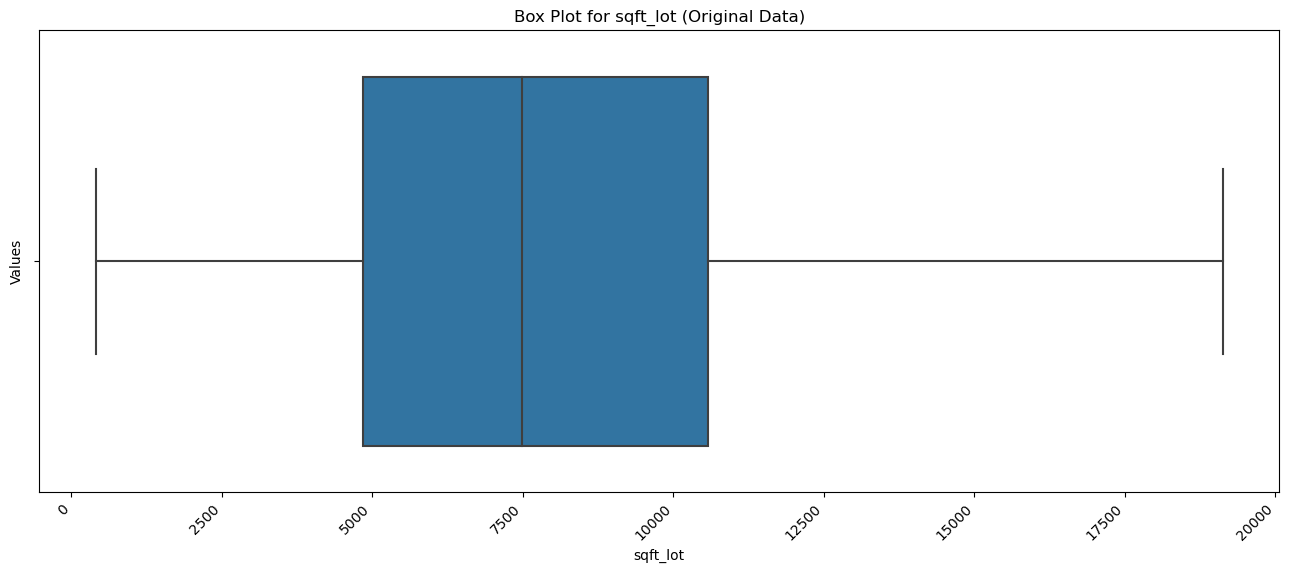

In [11]:
# Create a box plot for sqft_lot with actual values on the x-axis using the original DataFrame 
plt.figure(figsize=(16, 6))
sns.boxplot(x='sqft_lot', data=df_cleaned, width=0.8, showfliers=False)
plt.title('Box Plot for sqft_lot (Original Data)')
plt.xticks(rotation=45, ha='right')  
plt.xlabel('sqft_lot')
plt.ylabel('Values')

plt.show()



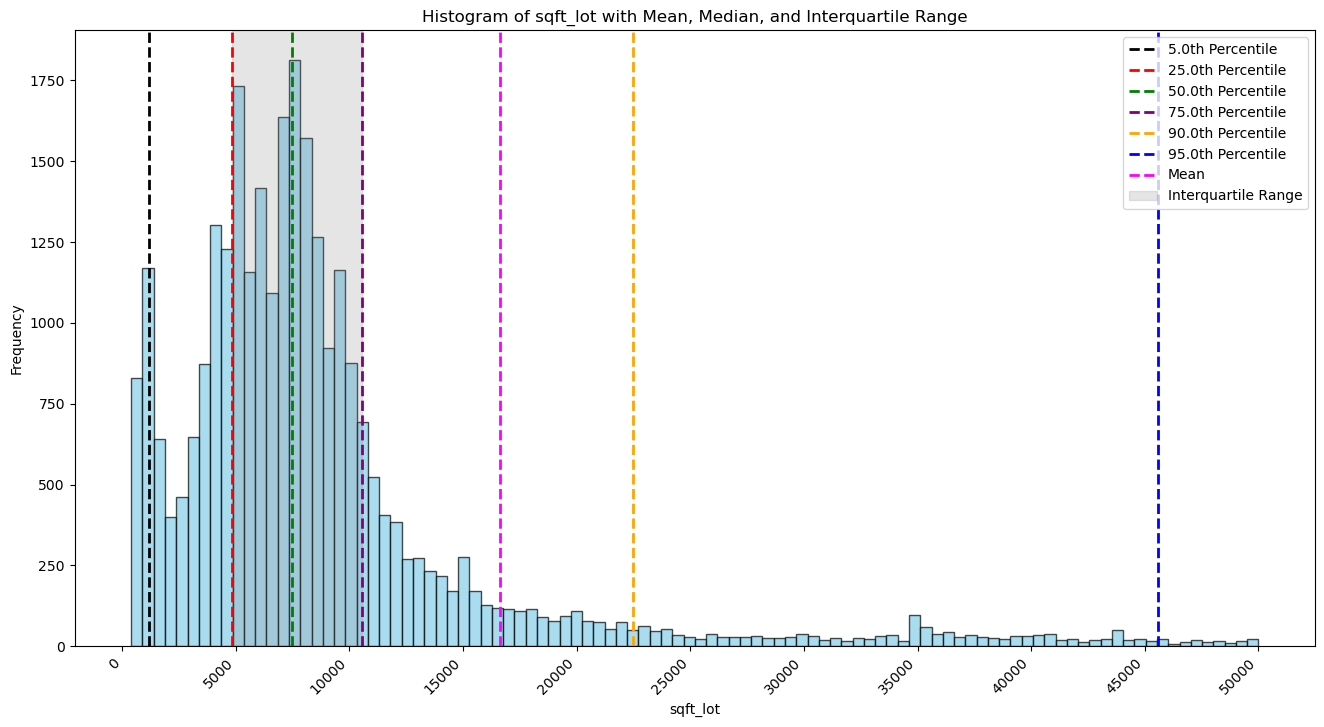

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate mean, median, and interquartile range
mean_sqft_lot = df_cleaned['sqft_lot'].mean()
median_sqft_lot = df_cleaned['sqft_lot'].median()
q1_sqft_lot = df_cleaned['sqft_lot'].quantile(0.25)
q3_sqft_lot = df_cleaned['sqft_lot'].quantile(0.75)
iqr_sqft_lot = q3_sqft_lot - q1_sqft_lot

# Plot histogram with mean, median, and interquartile range
plt.figure(figsize=(16, 8))
plt.hist(df_cleaned['sqft_lot'], bins=100, range=(400, 50000), color='skyblue', edgecolor='black', alpha=0.7)

# Plot percentiles
percentiles = [0.05, 0.25, 0.5, 0.75, 0.90, 0.95]
percentile_colors = ['black', 'red', 'green', 'purple', 'orange', 'blue']
for percentile, color in zip(percentiles, percentile_colors):
    plt.axvline(df_cleaned['sqft_lot'].quantile(percentile), color=color, linestyle='dashed', linewidth=2, label=f'{percentile*100}th Percentile')

# Plot interquartile range
plt.axvspan(q1_sqft_lot, q3_sqft_lot, color='gray', alpha=0.2, label='Interquartile Range')

# Plot mean
plt.axvline(mean_sqft_lot, color='magenta', linestyle='dashed', linewidth=2, label='Mean')

plt.title('Histogram of sqft_lot with Mean, Median, and Interquartile Range')
plt.xlabel('sqft_lot')
plt.ylabel('Frequency')
plt.legend()

# Specify tick locations
plt.xticks(np.arange(0, 55000, 5000))

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()



### Reason for outlier boundaries for sqft_lot

he graph represents a visualization of a highly right-skewed distribution. Notably, the median is approximately 7500 sqft, while the mean is closer to 1700 sqft. This disparity indicates the presence of extreme outliers on the higher end of the distribution, pulling the mean towards higher values.

To address this issue, corrective measures were implemented. Firstly, more values were removed from the higher end of the distribution by setting the percentile for outliers to 90%. By excluding the top 10% of the highest values, the influence of extreme outliers on the mean was mitigated. Additionally, a lower limit of 3000 sqft was set to further constrain the data range, potentially reducing the impact of outliers on the analysis.

Overall, these adjustments were aimed at rectifying the skewness of the distribution and minimizing the distortion caused by outliers, thereby enhancing the reliability of the analysis.

In [13]:
# Remove outliers for sqft_lot based on 3000 and 90th percentile
lower_limit = 3000
upper_limit = df_cleaned['sqft_lot'].quantile(0.90)

df_cleaned = df_cleaned[(df_cleaned['sqft_lot'] >= lower_limit) & (df_cleaned['sqft_lot'] <= upper_limit)]


In [14]:
# Print summary statistics of the original DataFrame for sqft_lot
print("df_cleaned Summary for Sqft_lot:")
print(df_cleaned['sqft_lot'].describe())




df_cleaned Summary for Sqft_lot:
count    23510.000000
mean      8217.559422
std       3758.237407
min       3000.000000
25%       5439.250000
50%       7520.500000
75%       9775.000000
max      22500.000000
Name: sqft_lot, dtype: float64


#### #2 Sqft_above

The Pandas library was used to analyze the top 10 and bottom 10 values of `sqft_above`. This step was taken to understand the range and potential extremities of the data in comparison to the rest of the columns' data.


In [15]:
# Print summary statistics of the DataFrame
print("df_cleaned Summary for Sqft_above:")
print(df_cleaned['sqft_above'].describe())

#Viewing the bottom and top 10 values for sqft_above
bottom_10_sqft_above_values = df_cleaned['sqft_above'].nsmallest(10)
print(bottom_10_sqft_above_values)
top_10_sqft_above_values = df_cleaned['sqft_above'].nlargest(10)
print(top_10_sqft_above_values)




df_cleaned Summary for Sqft_above:
count    23510.000000
mean      1820.965674
std        830.875446
min        260.000000
25%       1200.000000
50%       1594.500000
75%       2300.000000
max       8882.000000
Name: sqft_above, dtype: float64
8694     260
8391     290
23622    290
11989    310
13015    320
29356    340
22693    350
23250    360
8468     370
7871     380
Name: sqft_above, dtype: int64
20817    8882
708      7627
29865    7400
22681    7240
5350     6850
7429     6590
18706    6530
1350     6510
19301    6490
14947    6380
Name: sqft_above, dtype: int64


### Sqft_above Outlier Box-Plot

A box plot was used to visualize the distribution of all values for sqft_above. The box plot consists of a blue square with a median line down the middle, representing the median value of sqft_above, approximately 1700. The bottom edge of the blue square corresponds to the first quartile (Q1) of sqft_lot, ending around 1250, while the top edge represents the third quartile (Q3), ending around 2250. Additionally, there are two lines extending from both sides of the box, known as whiskers. The lower whisker extends to around 250, indicating the lowest non-outlier value, while the upper whisker extends to approximately 4000, representing the maximum value within the whisker range. Values beyond the whiskers are considered outliers.

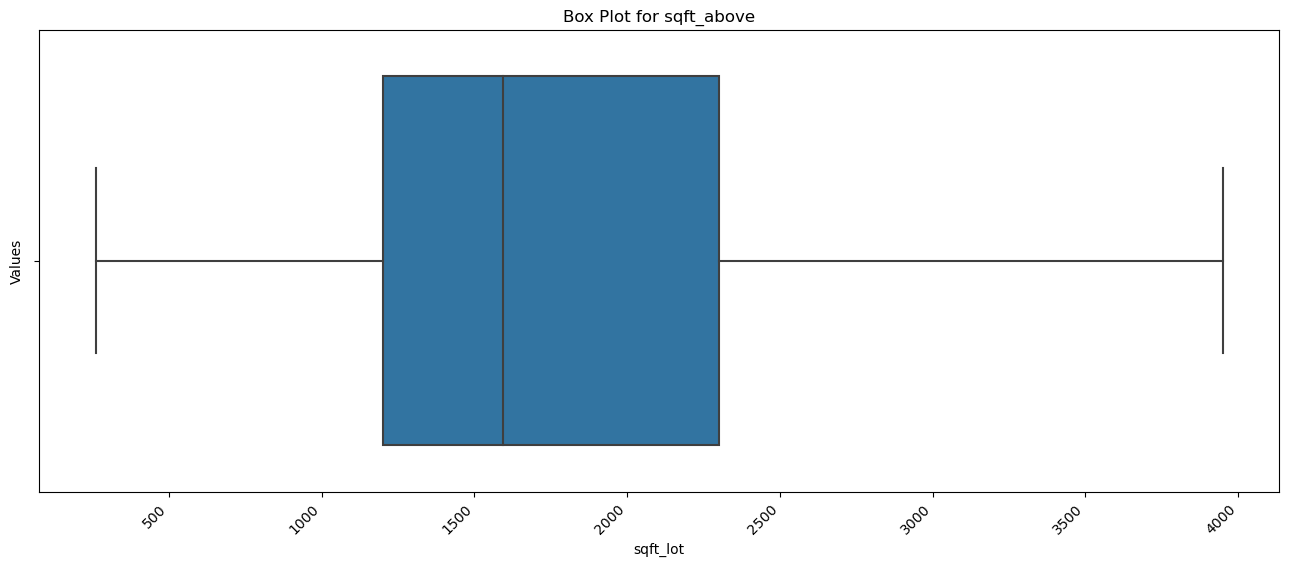

In [16]:
# Create a box plot for sqft_above with actual values on the x-axis using the DataFrame
plt.figure(figsize=(16, 6))
sns.boxplot(x='sqft_above', data=df_cleaned, width=0.8, showfliers=False)
plt.title('Box Plot for sqft_above')
plt.xticks(rotation=45, ha='right')
 
plt.xlabel('sqft_lot')
plt.ylabel('Values')
plt.show()


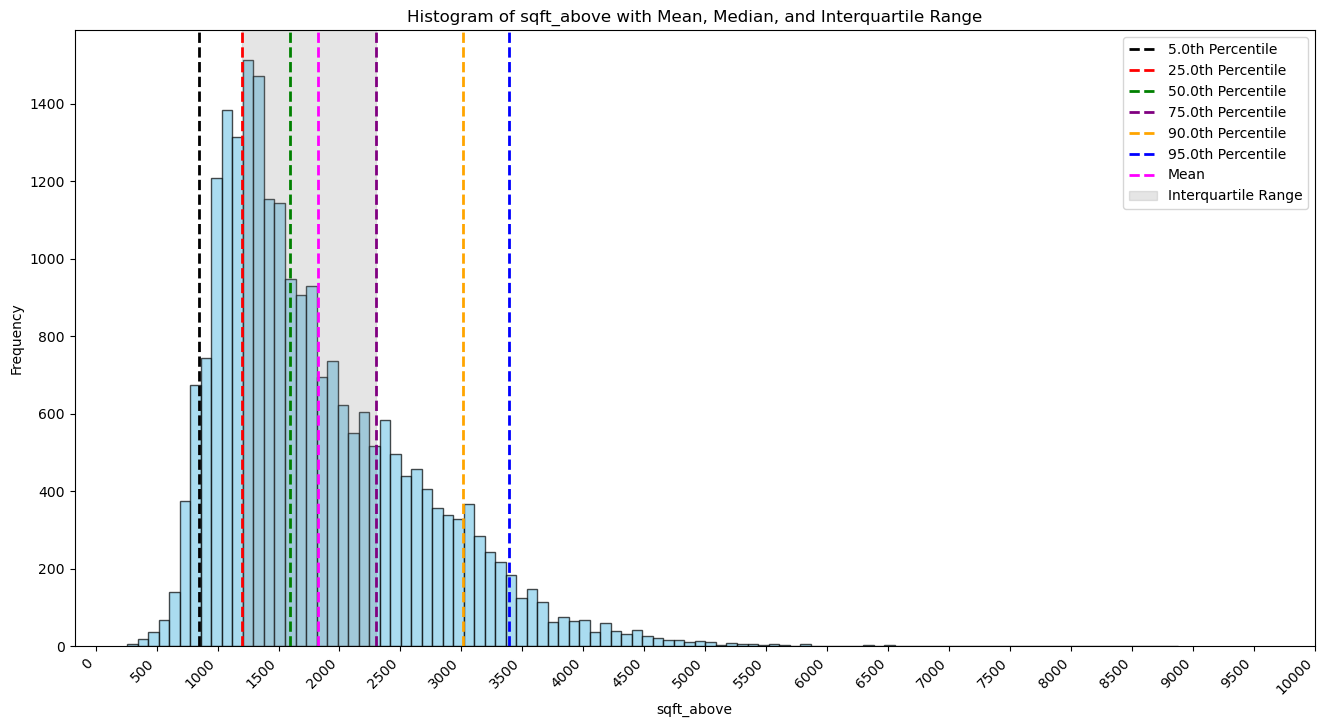

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate mean, median, and interquartile range
mean_sqft_above = df_cleaned['sqft_above'].mean()
median_sqft_above = df_cleaned['sqft_above'].median()
q1_sqft_above = df_cleaned['sqft_above'].quantile(0.25)
q3_sqft_above = df_cleaned['sqft_above'].quantile(0.75)
iqr_sqft_above = q3_sqft_above - q1_sqft_above

# Plot histogram with mean, median, and interquartile range
plt.figure(figsize=(16, 8))
plt.hist(df_cleaned['sqft_above'], bins=100, color='skyblue', edgecolor='black', alpha=0.7)

# Plot percentiles
percentiles = [0.05, 0.25, 0.5, 0.75, 0.90, 0.95]
percentile_colors = ['black', 'red', 'green', 'purple', 'orange', 'blue']
for percentile, color in zip(percentiles, percentile_colors):
    plt.axvline(df_cleaned['sqft_above'].quantile(percentile), color=color, linestyle='dashed', linewidth=2, label=f'{percentile*100}th Percentile')

# Plot interquartile range
plt.axvspan(q1_sqft_above, q3_sqft_above, color='gray', alpha=0.2, label='Interquartile Range')

# Plot mean
plt.axvline(mean_sqft_above, color='magenta', linestyle='dashed', linewidth=2, label='Mean')
# Set more ticks on the x-axis
# Set x-axis ticks from 0 to 10,000 with increments of 500
plt.xticks(np.arange(0, 10001, 500))



plt.title('Histogram of sqft_above with Mean, Median, and Interquartile Range')
plt.xlabel('sqft_above')
plt.ylabel('Frequency')
plt.legend()

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


### Reason for outlier boundaries for sqft_above
The data distribution for sqft_above exhibits a relatively small skew. Both the mean and median values are close to each other, indicating a balanced distribution around the center. Consequently, to identify outliers in this distribution, the 5th and 95th percentiles were chosen as outlier boundaries.

By utilizing the 5th and 95th percentiles as outlier boundaries, extreme values can be effectively identified while considering the relatively uniform spread of data around the central tendency of the sqft_above variable.

In [18]:
# Remove outliers for sqft_above
lower_limit_sqft_above = 800
upper_limit_sqft_above = 3500

df_cleaned = df_cleaned[(df_cleaned['sqft_above'] >= lower_limit_sqft_above) & (df_cleaned['sqft_above'] <= upper_limit_sqft_above)]


In [19]:

# Print summary statistics of the filtered DataFrame
print("(sqft_above) Summary:")
print(df_cleaned['sqft_above'].describe())


(sqft_above) Summary:
count    21766.000000
mean      1759.886796
std        671.592075
min        800.000000
25%       1220.000000
50%       1580.000000
75%       2220.000000
max       3500.000000
Name: sqft_above, dtype: float64


#### #3 Sqft_basement

The Pandas library was employed to analyze the top 10 and bottom 10 values of the sqft_basement variable. This initial step aimed to gain insights into the range and potential extremities of the data relative to other columns in the dataset. However, further analysis was warranted due to the prevalence of zero values in sqft_basement.

It's crucial to note that many homes may not have basements, resulting in a significant number of zero values. As such, these zero values do not necessarily represent outliers but rather reflect the absence of basements in certain properties. Thus, additional scrutiny is required to distinguish genuine outliers from homes without basements and ensure the accuracy of subsequent analyses involving sqft_basement. 

In [20]:
# Print summary statistics of the original DataFrame
print("Original DataFrame Summary:")
print(df_cleaned['sqft_basement'].describe())

# Display the bottom 10 values for sqft_lot
bottom_10_sqft_basement = df_cleaned['sqft_basement'].value_counts().sort_index().head(10)
print(bottom_10_sqft_basement)

top_10_sqft_basement = df_cleaned['sqft_basement'].value_counts().sort_index().tail(10)
print(top_10_sqft_basement)
# Filter the DataFrame to exclude rows with outliers


Original DataFrame Summary:
count    21766.000000
mean       499.431177
std        584.002334
min          0.000000
25%          0.000000
50%          0.000000
75%       1010.000000
max       3910.000000
Name: sqft_basement, dtype: float64
0      11428
70         1
80         7
100        7
110        1
120        9
130        3
140        7
150        6
160        5
Name: sqft_basement, dtype: int64
3000    1
3090    1
3110    1
3180    1
3220    1
3500    1
3590    1
3640    1
3710    1
3910    1
Name: sqft_basement, dtype: int64


### Removal of Zero Values for Deeper Analysis
In an effort to conduct a thorough analysis of the data, zero values in the sqft_basement variable were systematically removed. This deliberate action aimed to enhance the depth of analysis specifically concerning properties with basements.

By excluding zero values, the analysis could focus more precisely on properties with existing basements, allowing for a nuanced exploration of how basements impacts the overall 'price' of houses.

In [21]:


# Filter out 0 values in the 'sqft_basement' column
non_zero_sqft_basement = df_cleaned[df_cleaned['sqft_basement'] > 0]['sqft_basement']

# Display the smallest and largest 10 unique non-zero values
smallest_10_non_zero_sqft_basement = np.sort(np.unique(non_zero_sqft_basement))[:10]
largest_10_non_zero_sqft_basement = np.sort(np.unique(non_zero_sqft_basement))[::-1][:10]

print("Smallest 10 unique non-zero sqft_basement values:")
print(smallest_10_non_zero_sqft_basement)

print("\nLargest 10 unique non-zero sqft_basement values:")
print(largest_10_non_zero_sqft_basement)



Smallest 10 unique non-zero sqft_basement values:
[ 70  80 100 110 120 130 140 150 160 170]

Largest 10 unique non-zero sqft_basement values:
[3910 3710 3640 3590 3500 3220 3180 3110 3090 3000]


#### Searching for outliers in sqft_basement without removing houses that do not have a basement.

In [22]:
# Create a DataFrame without 0 values in 'sqft_basement' for summary statistics
df_no_zeros = df_cleaned.query('sqft_basement > 0')

# Display summary statistics for 'sqft_basement' without 0 values
summary_no_zeros = df_no_zeros['sqft_basement'].describe()

# Print the summary statistics
print(summary_no_zeros)


count    10338.000000
mean      1051.520507
std        370.842916
min         70.000000
25%        822.500000
50%       1030.000000
75%       1250.000000
max       3910.000000
Name: sqft_basement, dtype: float64


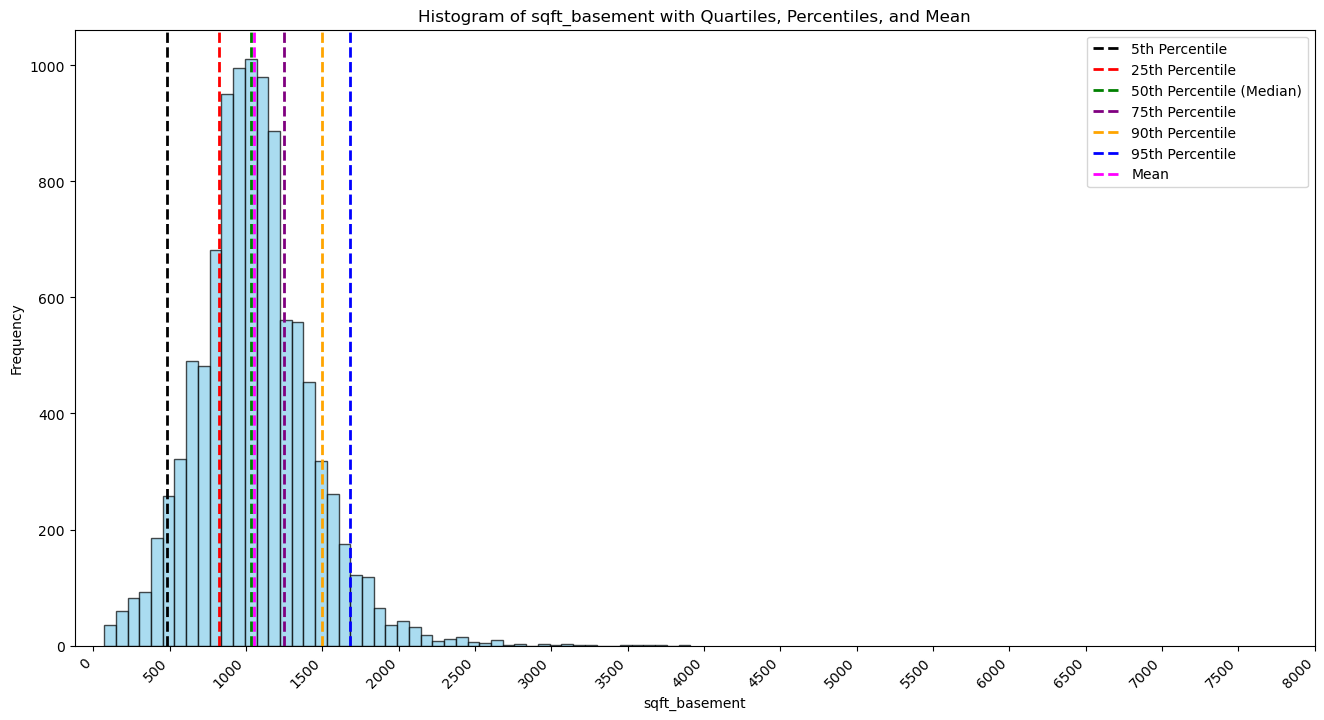

In [23]:
import numpy as np

# Calculate mean, median, and interquartile range
mean_sqft_basement = df_no_zeros['sqft_basement'].mean()

# Create a histogram for sqft_basement with quartiles, percentiles, and mean
plt.figure(figsize=(16, 8))  # Adjust the figure size
plt.hist(df_no_zeros['sqft_basement'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(df_no_zeros['sqft_basement'].quantile(0.05), color='black', linestyle='dashed', linewidth=2, label='5th Percentile')
plt.axvline(df_no_zeros['sqft_basement'].quantile(0.25), color='red', linestyle='dashed', linewidth=2, label='25th Percentile')
plt.axvline(df_no_zeros['sqft_basement'].quantile(0.5), color='green', linestyle='dashed', linewidth=2, label='50th Percentile (Median)')
plt.axvline(df_no_zeros['sqft_basement'].quantile(0.75), color='purple', linestyle='dashed', linewidth=2, label='75th Percentile')
plt.axvline(df_no_zeros['sqft_basement'].quantile(0.90), color='orange', linestyle='dashed', linewidth=2, label='90th Percentile')
plt.axvline(df_no_zeros['sqft_basement'].quantile(0.95), color='blue', linestyle='dashed', linewidth=2, label='95th Percentile')

# Plot mean
plt.axvline(mean_sqft_basement, color='magenta', linestyle='dashed', linewidth=2, label='Mean')

plt.title('Histogram of sqft_basement with Quartiles, Percentiles, and Mean')
plt.xlabel('sqft_basement')
plt.ylabel('Frequency')
plt.legend()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
tick_positions = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 8000]
plt.xticks(tick_positions, rotation=45, ha='right')
plt.show()



### Reason for outlier boundaries for sqft_basement
The data distribution for sqft_basement exhibits a relatively small skew. Both the mean and median values are close to each other, indicating a balanced distribution around the center. Consequently, to identify outliers in this distribution, the 5th and 95th percentiles were chosen as outlier boundaries.

By utilizing the 5th and 95th percentiles as outlier boundaries, extreme values can be effectively identified while considering the relatively uniform spread of data around the central tendency of the sqft_above variable.

In [24]:
# Define lower and upper limits for 'sqft_basement' outliers
lower_limit_sqft_basement = 400
upper_limit_sqft_basement = 1700

# Remove outliers for 'sqft_basement' excluding 0 values
df_cleaned = df_cleaned[
    ((df_cleaned['sqft_basement'] >= lower_limit_sqft_basement) & (df_cleaned['sqft_basement'] <= upper_limit_sqft_basement)) |
    (df_cleaned['sqft_basement'] == 0)
]

# Display summary statistics for 'sqft_basement' in the filtered DataFrame
summary_df_cleaned = df_cleaned['sqft_basement'].describe()
print(summary_df_cleaned)




count    21001.000000
mean       470.127565
std        548.514017
min          0.000000
25%          0.000000
50%          0.000000
75%        990.000000
max       1700.000000
Name: sqft_basement, dtype: float64


In [25]:
# Display the bottom 10 values for sqft_basement
bottom_10_sqft_basement = df_cleaned['sqft_basement'].value_counts().sort_index().head(10)
print(bottom_10_sqft_basement)

0      11428
400       27
410       13
416        1
420       24
430       37
440       24
450       23
452        1
460       26
Name: sqft_basement, dtype: int64


#### #4 Sqft_garage

The Pandas library was employed to analyze the top 10 and bottom 10 values of the 'sqft_garage' variable. This initial step aimed to gain insights into the range and potential extremities of the data relative to other columns in the dataset. However, further analysis was warranted due to the prevalence of zero values in 'sqft_garage'.

It's crucial to note that many homes may not have garages, resulting in a significant number of zero values. As such, these zero values do not necessarily represent outliers but rather reflect the absence of garages in certain properties. Thus, additional scrutiny is required to distinguish genuine outliers from homes without garages and ensure the accuracy of subsequent analyses involving 'sqft_garage'.

### Removal of Zero Values for Deeper Analysis
In an effort to conduct a thorough analysis of the data, zero values in the 'sqft_garage' variable were systematically removed. This deliberate action aimed to enhance the depth of analysis specifically concerning properties with garages.

By excluding zero values, the analysis could focus more precisely on properties with existing garages, allowing for a nuanced exploration of how garages impacts the overall 'price' of houses.

In [26]:
# Print summary statistics of the original DataFrame
print("Original DataFrame Summary:")
print(df_cleaned['sqft_garage'].describe())

# Display the bottom 10 values for sqft_lot
bottom_10_sqft_garage = df_cleaned['sqft_garage'].value_counts().sort_index().head(10)
print(bottom_10_sqft_garage)

top_10_sqft_garage = df_cleaned['sqft_garage'].value_counts().sort_index().tail(10)
print(top_10_sqft_garage)
# Filter the DataFrame to exclude rows with outliers


Original DataFrame Summary:
count    21001.000000
mean       333.296557
std        249.055006
min          0.000000
25%          0.000000
50%        420.000000
75%        500.000000
max       2240.000000
Name: sqft_garage, dtype: float64
0      6161
40        1
70        2
80        5
90        2
100       2
110       5
120       4
130       6
140       9
Name: sqft_garage, dtype: int64
1320    1
1430    2
1470    1
1490    1
1500    1
1560    1
1660    1
1670    1
1788    1
2240    1
Name: sqft_garage, dtype: int64


In [27]:


# Filter out 0 values in the 'sqft_garage' column
non_zero_sqft_garage = df_cleaned[df_cleaned['sqft_garage'] > 0]['sqft_garage']

# Display the smallest and largest 10 unique non-zero values
smallest_10_non_zero_sqft_garage = np.sort(np.unique(non_zero_sqft_garage))[:10]
largest_10_non_zero_sqft_garage = np.sort(np.unique(non_zero_sqft_garage))[::-1][:10]

print("Smallest 10 unique non-zero sqft_garage values:")
print(smallest_10_non_zero_sqft_garage)

print("\nLargest 10 unique non-zero sqft_garage values:")
print(largest_10_non_zero_sqft_garage)


Smallest 10 unique non-zero sqft_garage values:
[ 40  70  80  90 100 110 120 130 140 145]

Largest 10 unique non-zero sqft_garage values:
[2240 1788 1670 1660 1560 1500 1490 1470 1430 1320]


#### Searching for outliers in sqft_garage without removing houses that do not have a garage.

In [28]:
# Create a DataFrame without 0 values in 'sqft_garage' for summary statistics
df_no_zerosg = df_cleaned.query('sqft_garage > 0')

# Display summary statistics for 'sqft_garage' without 0 values
summary_no_zerosg = df_no_zerosg['sqft_garage'].describe()

# Print the summary statistics
print(summary_no_zerosg)


count    14840.000000
mean       471.668531
std        150.039474
min         40.000000
25%        400.000000
50%        460.000000
75%        540.000000
max       2240.000000
Name: sqft_garage, dtype: float64


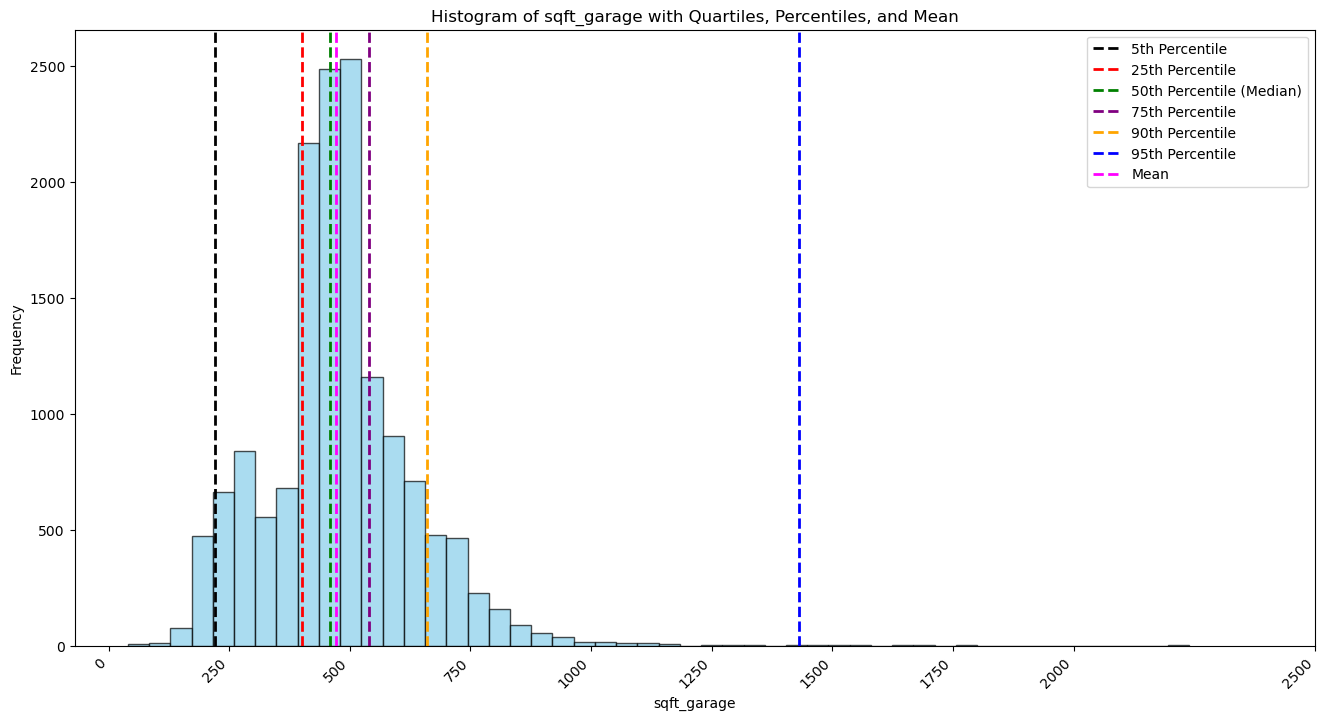

In [29]:
import numpy as np

# Calculate mean, median, and interquartile range
mean_sqft_garage = df_no_zerosg['sqft_garage'].mean()

# Create a histogram for sqft_basement with quartiles, percentiles, and mean
plt.figure(figsize=(16, 8))  # Adjust the figure size
plt.hist(df_no_zerosg['sqft_garage'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(df_no_zerosg['sqft_garage'].quantile(0.05), color='black', linestyle='dashed', linewidth=2, label='5th Percentile')
plt.axvline(df_no_zerosg['sqft_garage'].quantile(0.25), color='red', linestyle='dashed', linewidth=2, label='25th Percentile')
plt.axvline(df_no_zerosg['sqft_garage'].quantile(0.5), color='green', linestyle='dashed', linewidth=2, label='50th Percentile (Median)')
plt.axvline(df_no_zerosg['sqft_garage'].quantile(0.75), color='purple', linestyle='dashed', linewidth=2, label='75th Percentile')
plt.axvline(df_no_zerosg['sqft_garage'].quantile(0.90), color='orange', linestyle='dashed', linewidth=2, label='90th Percentile')
plt.axvline(df_no_zerosg['sqft_basement'].quantile(0.95), color='blue', linestyle='dashed', linewidth=2, label='95th Percentile')

# Plot mean
plt.axvline(mean_sqft_garage, color='magenta', linestyle='dashed', linewidth=2, label='Mean')

plt.title('Histogram of sqft_garage with Quartiles, Percentiles, and Mean')
plt.xlabel('sqft_garage')
plt.ylabel('Frequency')
plt.legend()
plt.xticks(rotation=45, ha='right') 
tick_positions = [0, 250, 500, 750, 1000, 1250, 1500, 1750, 2000, 2500]
plt.xticks(tick_positions, rotation=45, ha='right')
plt.show()

plt.show()



### Reason for outlier boundaries for sqft_garage
The distribution of data for sqft_garage displays a relatively modest skew, with the mean and median values closely aligned, indicating a balanced distribution around the center. To identify outliers within this distribution, two boundary values were selected:

The lower boundary was set at 200, approximately close to the 5th percentile, to capture potential lower outliers.
For the upper boundary, 800 was chosen. While this value exceeds the 90th percentile, it falls short of the 95th percentile. Given the substantial gap between the 90th and 95th percentiles, a value closer to the 90th percentile was deemed suitable for identifying upper outliers.
By employing these percentile-based boundaries, extreme values can be accurately pinpointed while accommodating the consistent spread of data around the central tendency of the sqft_garage variable.



In [30]:

# Define lower and upper limits for 'sqft_garage' outliers
lower_limit_sqft_garage = 200
upper_limit_sqft_garage = 800

# Remove outliers for 'sqft_garage' excluding 0 values
df_cleaned = df_cleaned[
    ((df_cleaned['sqft_garage'] >= lower_limit_sqft_garage) & (df_cleaned['sqft_garage'] <= upper_limit_sqft_garage)) |
    (df_cleaned['sqft_garage'] == 0)
]

# Display summary statistics for 'sqft_garage' in the filtered DataFrame
summary_df_cleaned = df_cleaned['sqft_garage'].describe()
print(summary_df_cleaned)



count    20445.000000
mean       325.173881
std        238.888245
min          0.000000
25%          0.000000
50%        410.000000
75%        500.000000
max        800.000000
Name: sqft_garage, dtype: float64


#### #5 Sqft_patio

The Pandas library was employed to analyze the top 10 and bottom 10 values of the 'sqft_patio' variable. This initial step aimed to gain insights into the range and potential extremities of the data relative to other columns in the dataset. However, further analysis was warranted due to the prevalence of zero values in 'sqft_patio'.

It's crucial to note that many homes may not have patios, resulting in a significant number of zero values. As such, these zero values do not necessarily represent outliers but rather reflect the absence of patios in certain properties. Thus, additional scrutiny is required to distinguish genuine outliers from homes without patios and ensure the accuracy of subsequent analyses involving 'sqft_patio'.

### Removal of Zero Values for Deeper Analysis
In an effort to conduct a thorough analysis of the data, zero values in the 'sqft_patio' variable were systematically removed. This deliberate action aimed to enhance the depth of analysis specifically concerning properties with patios.

By excluding zero values, the analysis could focus more precisely on properties with existing patios, allowing for a nuanced exploration of how patio impacts the overall 'price' of houses.

In [31]:
# Print summary statistics of the original DataFrame
print("Original DataFrame Summary:")
print(df_cleaned['sqft_patio'].describe())

# Display the bottom 10 values for sqft_lot
bottom_10_sqft_patio = df_cleaned['sqft_patio'].value_counts().sort_index().head(10)
print(bottom_10_sqft_patio)

top_10_sqft_patio = df_cleaned['sqft_patio'].value_counts().sort_index().tail(10)
print(top_10_sqft_patio)
# Filter the DataFrame to exclude rows with outliers

Original DataFrame Summary:
count    20445.000000
mean       186.957936
std        203.837150
min          0.000000
25%         40.000000
50%        130.000000
75%        280.000000
max       2210.000000
Name: sqft_patio, dtype: float64
0     4892
10       9
12       1
15       4
18       1
20      57
22       1
24       3
25       3
28       1
Name: sqft_patio, dtype: int64
1610    1
1640    1
1686    1
1690    1
1700    1
1750    1
1810    1
2000    1
2030    1
2210    1
Name: sqft_patio, dtype: int64


#### Searching for outliers in sqft_patio without removing houses that do not have a patio.

In [32]:
# Create a DataFrame without 0 values in 'sqft_patio' for summary statistics
df_no_zerosp = df_cleaned.query('sqft_patio > 0')

# Display summary statistics for 'sqft_patio' without 0 values
summary_no_zerosp = df_no_zerosp['sqft_patio'].describe()

# Print the summary statistics
print(summary_no_zerosp)


count    15553.000000
mean       245.763197
std        200.415128
min         10.000000
25%        100.000000
50%        190.000000
75%        330.000000
max       2210.000000
Name: sqft_patio, dtype: float64


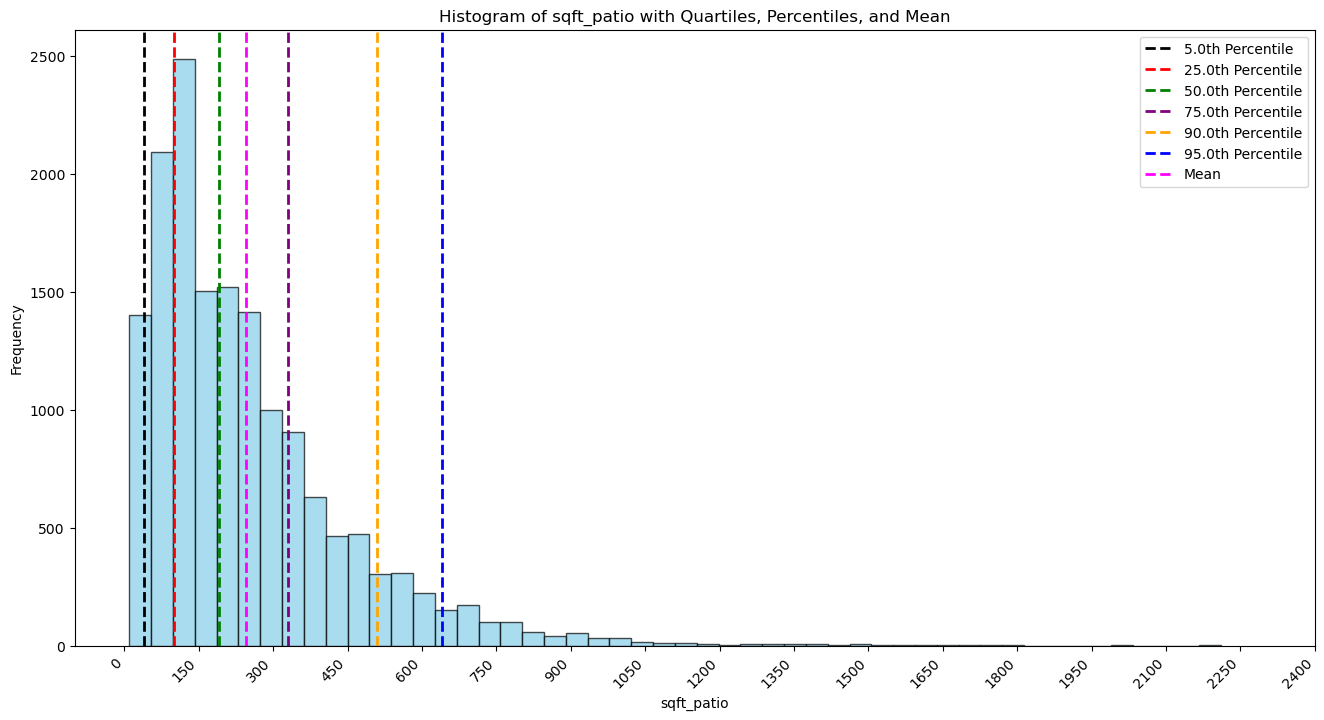

In [33]:
# Calculate mean for sqft_patio
mean_sqft_patio = df_no_zerosp['sqft_patio'].mean()

# Create a histogram for sqft_patio with quartiles, percentiles, and mean
plt.figure(figsize=(16, 8))  # Adjust the figure size
plt.hist(df_no_zerosp['sqft_patio'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)

# Plot quartiles and percentiles
percentiles = [0.05, 0.25, 0.5, 0.75, 0.90, 0.95]
percentile_colors = ['black', 'red', 'green', 'purple', 'orange', 'blue']
for percentile, color in zip(percentiles, percentile_colors):
    plt.axvline(df_no_zerosp['sqft_patio'].quantile(percentile), color=color, linestyle='dashed', linewidth=2, label=f'{percentile*100}th Percentile')

# Plot mean
plt.axvline(mean_sqft_patio, color='magenta', linestyle='dashed', linewidth=2, label='Mean')

plt.title('Histogram of sqft_patio with Quartiles, Percentiles, and Mean')
plt.xlabel('sqft_patio')
plt.ylabel('Frequency')
plt.legend()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
tick_positions = [0, 150, 300, 450, 600, 750, 900, 1050, 1200, 1350, 1500, 1650, 1800, 1950, 2100, 2250, 2400]
plt.xticks(tick_positions, rotation=45, ha='right')
plt.show()


### Reason for outlier boundaries for sqft_patio
TThe distribution of data for sqft_patio exhibits a relatively modest skew, with the mean and median values closely aligned, indicating a balanced distribution around the center. To establish outlier boundaries for this distribution, two key values were selected:

Lower Boundary (40): This boundary was chosen for its proximity to the 25th percentile, signifying a reasonable expectation for the minimum size of a patio. The selection of this threshold was informed by research into similar datasets or relevant literature, providing insight into the expected minimum value for such a useable patio would be.

Upper Boundary (700): The selection of 700 as the upper boundary was based on its proximity to the 95th percentile. This value captures potential extreme values while aligning with the distribution characteristics of the data.

By employing percentile-based boundaries, extreme values can be accurately identified, taking into account both the central tendency and the spread of data within the sqft_patio variable.

In [34]:
# Define lower and upper limits for 'sqft_patio' outliers
lower_limit_sqft_patio = 40
upper_limit_sqft_patio = 700

# Remove outliers for 'sqft_patio' excluding 0 values
df_cleaned = df_cleaned[
    ((df_cleaned['sqft_patio'] >= lower_limit_sqft_patio) & (df_cleaned['sqft_patio'] <= upper_limit_sqft_patio)) |
    (df_cleaned['sqft_patio'] == 0)
]

# Display summary statistics for 'sqft_patio' in the filtered DataFrame
summary_df_cleaned = df_cleaned['sqft_patio'].describe()
print(summary_df_cleaned)





count    19704.000000
mean       169.137434
std        165.283508
min          0.000000
25%         40.000000
50%        130.000000
75%        260.000000
max        700.000000
Name: sqft_patio, dtype: float64


#### Creating a box plot to visualize sqft_patio data after removing outliers.

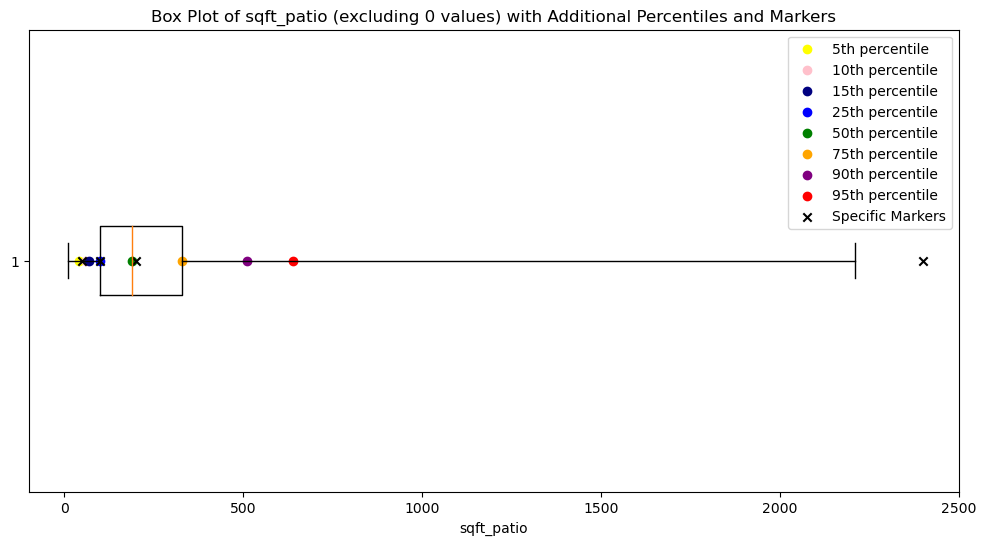

In [35]:

# Create a box plot for 'sqft_patio' without 0 values with additional percentiles
percentiles = [5, 10, 15, 25, 50, 75, 90, 95]

plt.figure(figsize=(12, 6))
boxplot = plt.boxplot(df_no_zerosp['sqft_patio'], vert=False, whis=(0, 100))

# Calculate and plot custom percentiles with different colors
colors = ['yellow', 'pink', 'navy', 'blue', 'green', 'orange', 'purple', 'red']
percentile_values = np.percentile(df_no_zerosp['sqft_patio'], percentiles)

for i, (percentile, color) in enumerate(zip(percentiles, colors)):
    plt.scatter(percentile_values[i], 1, marker='o', color=color, label=f'{percentile}th percentile')

# Set x-axis limits
plt.xlim(-100, 2500)

# Add specific markers for 50, 100, 200-2400
plt.scatter([50, 100, 200, 2400], [1, 1, 1, 1], marker='x', color='black', label='Specific Markers')

plt.title('Box Plot of sqft_patio (excluding 0 values) with Additional Percentiles and Markers')
plt.xlabel('sqft_patio')
plt.legend()
plt.show()


# Searching for outliers for bedrooms, bathrooms, sqft_living and floors.

## Box-Plot Analysis
Four separate box plots were utilized to examine the distribution of values for each variable. These box plots provide insights into the central tendency, spread, and presence of outliers within the data.

### 'Bedrooms'
The distribution of bedrooms exhibits a median value of 3 and a mean value of 3.5. The box plot reveals numerous values beyond the upper whisker, primarily on the higher end beyond 5 bedrooms. This suggests a skew towards larger properties, potentially indicating higher-end properties in the dataset.

### 'Bathrooms'
The variable 'Bathrooms' demonstrates a mean value of approximately 2.5, closely aligned with the median. The box plot displays a considerable number of values beyond the upper whisker, indicating a prevalence of properties with a higher number of bathrooms. This observation could be indicative of larger or more luxurious homes within the dataset.

### 'Sqft_living'
With both a mean and median around 2000 square feet, 'Sqft_living' showcases a relatively symmetrical distribution. However, the box plot reveals outliers on both ends of the distribution, suggesting the presence of smaller and larger properties beyond the typical range. This indicates the dataset encompasses a diverse range of property sizes.

### 'Floors'
The distribution of 'Floors' features a median value of 1 and a mean close to 1.5. Similar to other variables, the box plot illustrates a skew towards properties with a higher number of floors, as evidenced by outliers beyond the upper whisker. This skew suggests a prevalence of multi-story buildings or properties with additional levels.

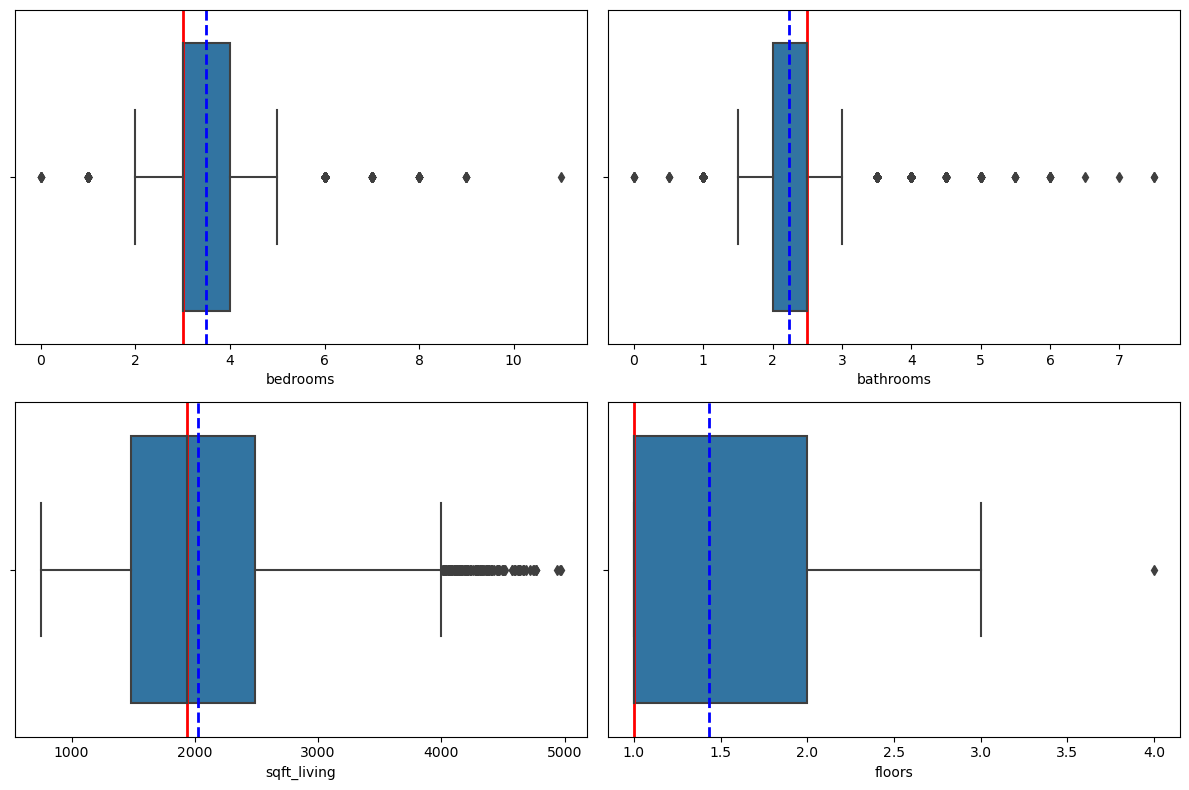

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

variables_to_plot = ['bedrooms', 'bathrooms', 'sqft_living', 'floors']

# Set the figure size
plt.figure(figsize=(12, 8))

# Create individual box plots for each variable
for i, variable in enumerate(variables_to_plot, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=variable, data=df_cleaned)
    
    # Add median line
    median_value = df_cleaned[variable].median()
    plt.axvline(median_value, color='red', linestyle='-', linewidth=2)
    
    # Add mean line
    mean_value = df_cleaned[variable].mean()
    plt.axvline(mean_value, color='blue', linestyle='--', linewidth=2)

# Adjust layout for better readability
plt.tight_layout()

# Show the plots
plt.show()



### #6.'sqft_living'

In [37]:
bottom_10_sqft_living = df_cleaned.nsmallest(10, 'sqft_living')
print(bottom_10_sqft_living[['sqft_living']])



       sqft_living
2987           750
18094          750
370            800
1219           800
1795           800
2199           800
3175           800
4254           800
5383           800
6870           800


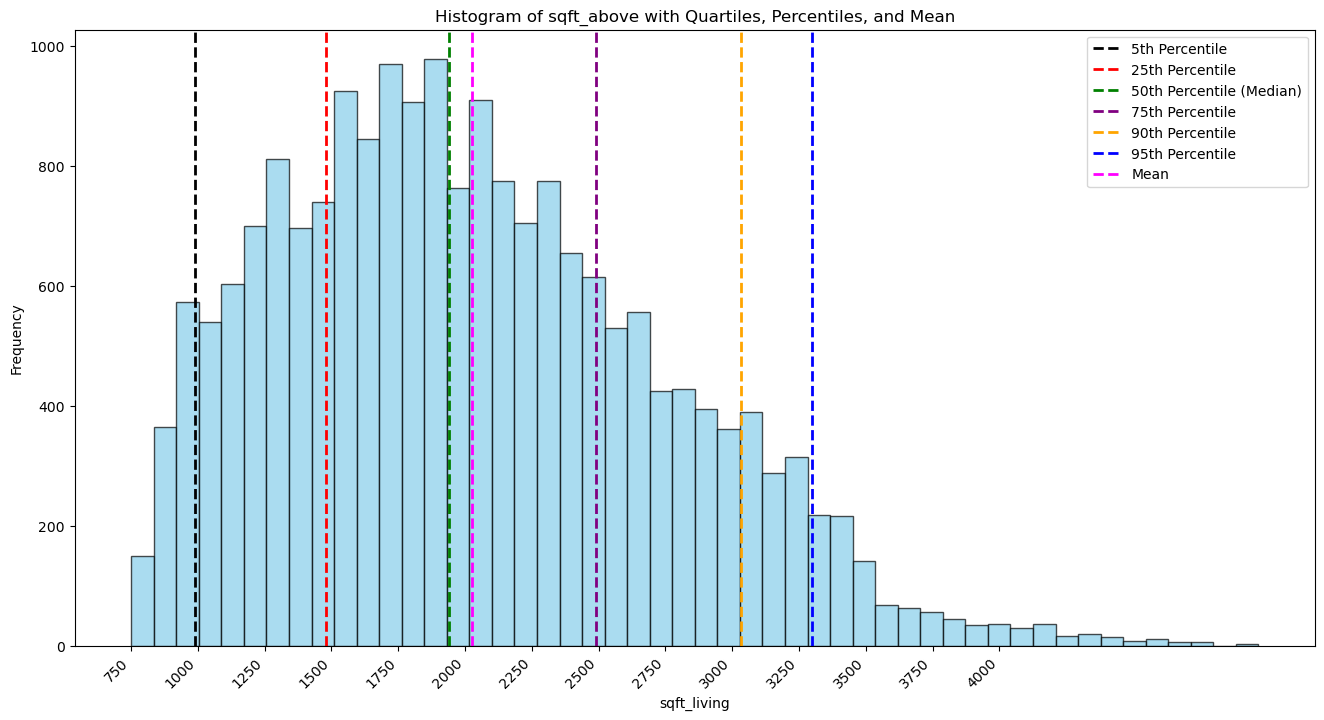

In [38]:
# Calculate the mean of 'sqft_living'
mean_sqft_living = df_cleaned['sqft_living'].mean()

# Create a histogram for sqft_living with quartiles and percentiles
plt.figure(figsize=(16, 8))  # Adjust the figure size
plt.hist(df_cleaned['sqft_living'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(df_cleaned['sqft_living'].quantile(0.05), color='black', linestyle='dashed', linewidth=2, label='5th Percentile')
plt.axvline(df_cleaned['sqft_living'].quantile(0.25), color='red', linestyle='dashed', linewidth=2, label='25th Percentile')
plt.axvline(df_cleaned['sqft_living'].quantile(0.5), color='green', linestyle='dashed', linewidth=2, label='50th Percentile (Median)')
plt.axvline(df_cleaned['sqft_living'].quantile(0.75), color='purple', linestyle='dashed', linewidth=2, label='75th Percentile')
plt.axvline(df_cleaned['sqft_living'].quantile(0.90), color='orange', linestyle='dashed', linewidth=2, label='90th Percentile')
plt.axvline(df_cleaned['sqft_living'].quantile(0.95), color='blue', linestyle='dashed', linewidth=2, label='95th Percentile')

# Plot the mean as a vertical line
plt.axvline(mean_sqft_living, color='magenta', linestyle='dashed', linewidth=2, label='Mean')

plt.title('Histogram of sqft_above with Quartiles, Percentiles, and Mean')
plt.xlabel('sqft_living')
plt.ylabel('Frequency')

plt.legend()
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
tick_positions = [750, 1000, 1250, 1500, 1750, 2000, 2250, 2500, 2750, 3000, 3250, 3500, 3750, 4000]
plt.xticks(tick_positions, rotation=45, ha='right')
plt.show()


### Reason for outlier boundaries for sqft_living
TThe distribution of data for sqft_living exhibits a relatively modest skew, with the mean and median values closely aligned, indicating a balanced distribution around the center. To establish outlier boundaries for this distribution, two key values were selected:

Lower Boundary (900): This boundary was chosen for its proximity to the 5th percentile.

Upper Boundary (3250): The selection of 3250 as the upper boundary was based on its proximity to the 95th percentile. 

By employing percentile-based boundaries, extreme values can be accurately identified, taking into account both the central tendency and the spread of data within the sqft_living variable.

In [39]:
# Remove outliers for sqft_living
lower_limit_sqft_living = 900
upper_limit_sqft_living = 3250

df_cleaned = df_cleaned[(df_cleaned['sqft_living'] >= lower_limit_sqft_living) & (df_cleaned['sqft_living'] <= upper_limit_sqft_living)]
# Display summary statistics for 'sqft_living' in the filtered DataFrame
summary_df_cleaned = df_cleaned['sqft_living'].describe()
print(summary_df_cleaned)



count    18185.000000
mean      1951.924608
std        597.896611
min        900.000000
25%       1480.000000
50%       1900.000000
75%       2390.000000
max       3250.000000
Name: sqft_living, dtype: float64


### #7 'bedrooms'
To find appropriate outliers, further steps were investigated. Any home that did not have one bedroom was removed due to expectations of a household. This was the only outlier added for bedrooms for this model.



In [40]:
# Display the bottom 10 values for bedrooms
bottom_10_bedrooms = df_cleaned.sort_values(by='bedrooms').head(10)
print(bottom_10_bedrooms[['bedrooms']])

       bedrooms
1310          0
7545          0
8338          0
11471         0
15950         1
11009         1
6014          1
6540          1
2338          1
7158          1


In [41]:
#Display unique values to verify the changes
print(df_cleaned['bedrooms'].unique())

[ 4  5  6  2  3  1  7  0  9  8 11]


In [42]:
#Remove homes with less than 1 bedroom
df_cleaned = df_cleaned[df_cleaned['bedrooms'] != 0]
#Display unique values to verify the changes
print(df_cleaned['bedrooms'].unique())
summary_df_cleaned = df_cleaned['bedrooms'].describe()
print(summary_df_cleaned)

[ 4  5  6  2  3  1  7  9  8 11]
count    18181.000000
mean         3.462406
std          0.824993
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         11.000000
Name: bedrooms, dtype: float64


### #8 'bathrooms'

To find appropriate outliers, further steps were investigated. Any home that did not have one bathroom was removed due to expectations of a household. This was the only outlier added for bathroom for this model.


In [43]:
#Display unique values to verify the changes
print(df_cleaned['bathrooms'].unique())

[1.  2.5 2.  1.5 3.  3.5 5.5 5.  4.  6.  4.5 0.5 0.  6.5]


In [44]:
df_cleaned = df_cleaned[(df_cleaned['bathrooms'] != 0) & (df_cleaned['bathrooms'] != 0.5)]
# Display unique values to verify the changes
print(df_cleaned['bathrooms'].unique())


[1.  2.5 2.  1.5 3.  3.5 5.5 5.  4.  6.  4.5 6.5]


### #9 'floors'

No outliers were added to floors.

In [45]:
#Display unique values of floors
print(df_cleaned['floors'].unique())

[1.  2.  1.5 2.5 3.  4. ]


In [46]:
#descriptive statistics
df_cleaned.describe()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,condition_Average,condition_Fair,condition_Good,condition_Poor,condition_Very Good,heat_source_Electricity,heat_source_Electricity/Solar,heat_source_Gas,heat_source_Gas/Solar,heat_source_Oil,heat_source_Oil/Solar,heat_source_Other,renovation_status_No Renovation,renovation_status_Renovation,grade_10 Very Good,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_2 Substandard,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better,nuisance_NO,nuisance_YES,sewer_system_PRIVATE,sewer_system_PRIVATE RESTRICTED,sewer_system_PUBLIC,sewer_system_PUBLIC RESTRICTED
count,1.817900e+04,1.817900e+04,18179.000000,18179.000000,18179.000000,18179.000000,18179.000000,18179.000000,18179.000000,18179.000000,18179.000000,18179.000000,18179.000000,18179.000000,18179.000000,18179.000000,18179.000000,18179.000000,18179.000000,18179.000000,18179.000000,18179.000000,18179.000000,18179.000000,18179.000000,18179.000000,18179.000000,18179.000000,18179.000000,18179.000000,18179.000000,18179.000000,18179.0,18179.0,18179.0,18179.000000,18179.000000,18179.000000,18179.000000,18179.000000,18179.000000,18179.000000,18179.000000,18179.000000,18179.0,18179.000000,18179.000000
mean,4.697443e+09,9.522794e+05,3.462402,2.190164,1951.997305,8008.962154,1.406430,1681.214973,445.149293,321.242808,164.292040,1969.874801,88.164751,47.507423,-122.101991,0.563672,0.006216,0.304032,0.001485,0.124594,0.162330,0.001320,0.718851,0.002365,0.114583,0.000220,0.000330,0.955883,0.044117,0.013257,0.000550,0.000055,0.0,0.0,0.0,0.000055,0.005611,0.092744,0.499532,0.305792,0.082403,0.847516,0.152484,0.087904,0.0,0.912041,0.000055
std,2.870268e+09,5.074923e+05,0.825022,0.706936,597.900264,3518.306257,0.476499,597.916383,534.827339,235.739614,162.749602,29.538696,410.417798,0.517311,2.068842,0.495943,0.078598,0.460009,0.038511,0.330267,0.368764,0.036312,0.449572,0.048579,0.318527,0.014832,0.018165,0.205360,0.205360,0.114377,0.023448,0.007417,0.0,0.0,0.0,0.007417,0.074697,0.290082,0.500014,0.460755,0.274985,0.359499,0.359499,0.283162,0.0,0.283243,0.007417
min,1.000094e+06,2.855900e+04,1.000000,1.000000,900.000000,3000.000000,1.000000,800.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,25.914694,-147.337806,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,2.215901e+09,6.150000e+05,3.000000,2.000000,1480.000000,5409.000000,1.000000,1210.000000,0.000000,0.000000,0.000000,1951.000000,0.000000,47.386190,-122.323675,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000
50%,4.039301e+09,8.200000e+05,3.000000,2.500000,1900.000000,7500.000000,1.000000,1520.000000,0.000000,400.000000,120.000000,1969.000000,0.000000,47.535670,-122.230575,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000
75%,7.402200e+09,1.190000e+06,4.000000,2.500000,2390.000000,9600.000000,2.000000,2070.000000,960.000000,490.000000,250.000000,1992.000000,0.000000,47.672152,-122.144608,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000
max,9.904000e+09,7.000000e+06,11.000000,6.500000,32

# Removal of Unnecessary Columns 

This model removes variables that are beyond homeowners' control, such as address, latitude, longitude, date, year built, year renovated, greenbelt, view, and waterfront. By eliminating these factors, homeowners can better discern the variables that directly influence property value."

In [47]:
# List of columns to remove
columns_to_remove = ['address','lat', 'long','date','yr_built', 'yr_renovated', 'greenbelt', 'view','waterfront']

# Drop the columns from the DataFrame
df_cleaned = df_cleaned.drop(columns=columns_to_remove)

# Display the first few rows of the resulting DataFrame
print(df_cleaned.head())

           id     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  7399300360  675000.0         4        1.0         1180      7140     1.0   
1  8910500230  920000.0         5        2.5         2770      6703     1.0   
2  1180000275  311000.0         6        2.0         2880      6156     1.0   
5  2807100156  625000.0         2        1.0         1190      5688     1.0   
7  7137850210  820000.0         3        2.5         2214      3506     2.0   

   sqft_above  sqft_basement  sqft_garage  sqft_patio  condition_Average  \
0        1180              0            0          40                  0   
1        1570           1570            0         240                  1   
2        1580           1580            0           0                  1   
5        1190              0          300           0                  1   
7        2214              0          440         206                  1   

   condition_Fair  condition_Good  condition_Poor  condition_Very Go

# Using StatsModels for Multiple Linear Regression
## Model 1

In [48]:
# Price is the target variable
target_variable = 'price'

# Create predictors
predictors = df_cleaned.drop([target_variable], axis=1)

# Create model intercept
predictors_int = sm.add_constant(predictors)

# Fit multiple linear regression model to data
model = sm.OLS(df_cleaned[target_variable], predictors_int).fit()

# Print model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                     324.2
Date:                Wed, 14 Feb 2024   Prob (F-statistic):               0.00
Time:                        21:43:12   Log-Likelihood:            -2.6051e+05
No. Observations:               18179   AIC:                         5.211e+05
Df Residuals:                   18146   BIC:                         5.213e+05
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

## Results from the Multiple Linear Regression Model
### R-Squared:
The R-Squared for this model is 0.364, indicating that there is a moderate fit for the data. Approximately 36.4% of the variance in the target variable (price) can be explained by the independent variables included in the model. 

### Adjusted R-Squared:
In this context, an adjusted R-squared value of 0.364 suggests that approximately 36.4% of the variance in the price of properties can be explained by the independent variables included in the model, while also considering the complexity of the model.

### F-Statistic:
The F-statistic is a measurement of the regression models overall signifincane. The value of 342.2 with a p-value of <.05 indicates that a predictor variable is significantly related to the target variable. 

### Coefficients:
The coefficients in a regression model represent the estimated change in the dependent variable ('price') for a one-unit change in the corresponding independent variable, while holding all other independent variables constant.

#### Bedrooms: 
Each additional bedroom is associated with a decrease in price of $31,910. 

#### Bathrooms: 
Each additional bathroom is associated with an increase in price of $42,360.

#### Sqft_living: 
With each additional square foot of living space, the estimated price increases by $55.14.

#### Sqft_lot: 
A one-unit increase in square footage of the lot is associated with a $5.67.

#### Floors: 
Each additional floor is associated with an estimated decrease in price of $26,050.

#### Sqft_above: 
For each additional square foot above ground level, the estimated price increases by $148.15.

#### Sqft_basement: 
With each additional square foot of basement area, the estimated price increases by $162.16.

#### Sqft_garage: 
Holding all other variables constant, each additional square foot of garage space is associated with a decrease in price of $331.41.

#### Sqft_patio: 
Each additional square foot of patio space is associated with an estimated increase in price of $63.11.

#### Significance Tests:
The p-values associated with each coefficient test the null hypothesis that the coefficient is equal to zero. P-values less than 0.05 indicate that the corresponding coefficient is statistically significant at the 95% confidence level. In this model, most of the coefficients have p-values less than 0.05, suggesting that they are statistically significant predictors of price. However, some coefficients, such as 'heat_source_Electricity' and 'heat_source_Gas', have p-values greater than 0.05, indicating that they are not statistically significant predictors in this model.

#### Residuals Analysis:
The residuals analysis examines the model's errors, including the omnibus test for normality, skewness, kurtosis, and the Durbin-Watson statistic for autocorrelation. These diagnostics help assess the assumptions underlying the linear regression model and identify potential issues such as non-normality or autocorrelation in the residuals.

#### Model Fit:
Overall, this multiple linear regression model provides valuable insights into the relationship between various predictor variables and the price of properties. However, it's important to note that the model's explanatory power is limited, as indicated by the moderate R-squared value. Further refinement and exploration may be necessary to improve the model's predictive accuracy.








## Mean Absoulte Error(MAE) and Root Mean Squared Error (RSME)

The MAE is a metric that tests the accuracy of a regression model. It measures the absolute difference between the predicted and actual values.

The RSME is a metric that asses the goodness of fit of a regression model by examining the errors of residuals. Residuals are the diffrences between observed values and perdicted values of the model.

In this case the MAE has a value of 281,150.90 indicating that thie model has a square error of 281,150.90 dollars. The RMSE has a value of 404,783.26. This idncates that the model has a root mean square error of $ 404,783.26. 

The MAE value of 281,150.90 indicates that, on average, the model's predictions deviate from the actual prices by approximately  281,150.90 dollars. Similarly, the RMSE value of $ 404,783.26 signifies the typical magnitude of errors in the model's predictions, providing insight into the overall accuracy and variability of the model's performance

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Make predictions using the model
predictions = model.predict(predictors_int)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(df_cleaned[target_variable], predictions)
print("Mean Absolute Error (MAE):", mae)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(df_cleaned[target_variable], predictions, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 281150.89808470133
Root Mean Squared Error (RMSE): 404783.2604119283


In [50]:
# view model coefficients
model.params


const                              4.059459e+05
id                                -1.600777e-06
bedrooms                          -3.191461e+04
bathrooms                          4.236094e+04
sqft_living                        5.514123e+01
sqft_lot                           5.674564e+00
floors                            -2.604885e+04
sqft_above                         1.481531e+02
sqft_basement                      1.621603e+02
sqft_garage                       -3.314119e+02
sqft_patio                         6.310949e+01
condition_Average                  6.524517e+04
condition_Fair                     8.345532e+04
condition_Good                     1.541604e+05
condition_Poor                    -1.340697e+05
condition_Very Good                2.371546e+05
heat_source_Electricity           -7.257066e+04
heat_source_Electricity/Solar      8.659778e+03
heat_source_Gas                   -3.860511e+04
heat_source_Gas/Solar              1.073643e+05
heat_source_Oil                   -5.032

# Creation of Tornado Chart for Model 1
#### Visual representation of the impact of each coefficent on the dependt variable (price)

Utilizing StatsModels, a Multiple Linear Regression model was constructed to explore the relationship between various predictor variables and the target variable, which was set to 'Price', enabling the ability to analyze the relationship between multiple independent variables and a single dependent variable.

The initial model accounted for approximately 36% of the variance in 'Price', suggesting a moderate level of explanatory power. There were many p-values associated with the coefficients that were statistically significant predictors (p < 0.05), indicating variables that have a more significant effect on 'Price'.

The coefficients in the model represent the estimated change in 'Price' for a one-unit change in the respective predictor variable. Interpretation of these coefficients provide insights into the direction and magnitude of the relationship between predictors and 'Price'.

After creating the initial model, a Tornado chart was generated through Matplotlib to illustrate the influence of each coefficient on the house price. The chart reveals that an increase in the value of the variable 'grade_11 Excellent' has the most substantial positive effect on the price, indicating that houses with this grade experience a considerable price increase. Conversely, the presence of 'grade_4 Low' has the most pronounced negative impact on the price, suggesting that houses with this grade exhibit a substantial decrease in value. This visual representation underscores the importance of certain factors in determining house prices and provides valuable insights for homeowners.

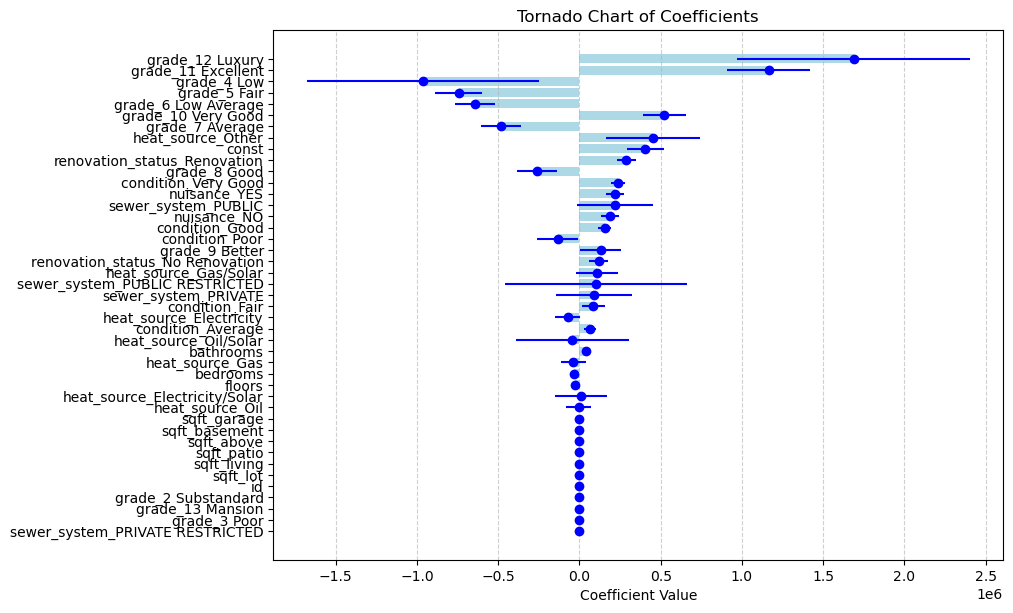

In [51]:

# Extract the coefficients and their standard errors from the regression summary
coefficients = model.params
standard_errors = model.bse

# Calculate the lower and upper bounds for each coefficient
lower_bound = coefficients - 1.96 * standard_errors
upper_bound = coefficients + 1.96 * standard_errors

# Sort the coefficients based on their impact on the dependent variable
sorted_indices = np.argsort(np.abs(coefficients))

# Create a tornado chart
plt.figure(figsize=(10, 6))
plt.barh(range(len(coefficients)), coefficients[sorted_indices], color='lightblue')
plt.errorbar(coefficients[sorted_indices], range(len(coefficients)),
             xerr=1.96 * standard_errors[sorted_indices], fmt='o', color='blue', label='95% CI')

plt.yticks(range(len(coefficients)), coefficients.index[sorted_indices])
plt.xlabel('Coefficient Value')
plt.title('Tornado Chart of Coefficients')
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Adjust spacing between the y-axis labels
plt.tight_layout(pad=0.25)
plt.show()


## Model 2: Utilizing Significance for Impactful Insights

In an endeavor to construct a more influential and statistically robust model, Model 2 was crafted exclusively using significant data (p < 0.05) derived from the initial model. Despite these efforts, the second model's performance mirrored that of the first, accounting for 36% of the variance in housing prices.

Insights from the Tornado Chart
Visualizing the impact of each coefficient on house prices via the tornado chart reaffirmed some findings from Model 1. Notably, variables such as 'grade_11' and 'grade_12' demonstrated considerable positive effects on price, while 'grade_4' and 'grade_5' showcased pronounced adverse impacts on price outcomes.

Contrasting Model Characteristics
A noteworthy distinction between the two models lies in the Tornado charts' composition. Model 2 features fewer coefficients, as non-significant variables were excluded (p > 0.05). Despite this refinement, both models offer comparable insights into the determinants of house prices.



In [52]:
# Filter coefficients based on p-values
significant_vars = model.params[model.pvalues < 0.05]

# Display coefficients of significant variables
print(significant_vars)


const                              4.059459e+05
bedrooms                          -3.191461e+04
bathrooms                          4.236094e+04
sqft_living                        5.514123e+01
sqft_lot                           5.674564e+00
floors                            -2.604885e+04
sqft_above                         1.481531e+02
sqft_basement                      1.621603e+02
sqft_garage                       -3.314119e+02
sqft_patio                         6.310949e+01
condition_Average                  6.524517e+04
condition_Fair                     8.345532e+04
condition_Good                     1.541604e+05
condition_Poor                    -1.340697e+05
condition_Very Good                2.371546e+05
heat_source_Other                  4.510657e+05
renovation_status_No Renovation    1.183090e+05
renovation_status_Renovation       2.876368e+05
grade_10 Very Good                 5.216168e+05
grade_11 Excellent                 1.164672e+06
grade_12 Luxury                    1.687

## Results from the Multiple Linear Regression Model 2
### R-Squared:
The R-Squared for this model is 0.358, indicating that there is a moderate fit for the data. Approximately 36% of the variance in the target variable (price) can be explained by the independent variables included in the model. 

### Adjusted R-Squared:
In this context, an adjusted R-squared value of 0.357 suggests that approximately 36% of the variance in the price of properties can be explained by the independent variables included in the model, while also considering the complexity of the model.

### F-Statistic:
The F-statistic is a measurement of the regression models overall signifincane. The value of 421.4 with a p-value of <.05 indicates that a predictor variable is significantly related to the target variable. 

#### Bedrooms: 
Each additional bedroom is associated with a decrease in price of $30,360. 

#### Bathrooms: 
Each additional bathroom is associated with an increase in price of $39,100.

#### Sqft_living: 
With each additional square foot of living space, the estimated price increases by $49.37.

#### Sqft_lot: 
A one-unit increase in square footage of the lot is associated with a $1.50.

#### Floors: 
Each additional floor is associated with an estimated decrease in price of $27,270.

#### Sqft_above: 
For each additional square foot above ground level, the estimated price increases by $160.00.

#### Sqft_basement: 
With each additional square foot of basement area, the estimated price increases by $177.02.

#### Sqft_garage: 
Holding all other variables constant, each additional square foot of garage space is associated with a decrease in price of $335.60.

#### Sqft_patio: 
Each additional square foot of patio space is associated with an estimated increase in price of $53.40.

#### Grade_11 Excellent and Grade_12 Luxury:

Properties with these grades exhibit significant positive impacts on price, with coefficients indicating price increases of approximately 1,184,000 and $1,712,000, respectively.

#### Grade_4 Low and Grade_5 Fair 
Properties with this grades are associated with a significant decreases in price, with a coefficient indicating a price decrease of approximately $965,200 and $$758,800.


#### Significance Tests:
The p-values associated with each coefficient test the null hypothesis that the coefficient is equal to zero. P-values less than 0.05 indicate that the corresponding coefficient is statistically significant at the 95% confidence level. In this model, most of the coefficients have p-values less than 0.05, suggesting that they are statistically significant predictors of price. However, some coefficients, such as 'sqft_lot' and 'grade_2 Substandard', have p-values greater than 0.05, indicating that they are not statistically significant predictors in this model.


In [53]:
# Ensure 'const' is in the index of significant_vars
if 'const' not in significant_vars.index:
    significant_vars.loc['const'] = 0  

# List of significant variable names (including 'const')
significant_vars_names = significant_vars.index.tolist()

# Check if 'const' is in df_cleaned columns
if 'const' not in df_cleaned.columns:
    # If not, add 'const' to the DataFrame
    df_cleaned['const'] = 1

# Create predictors using only statistically significant variables
significant_vars_data = df_cleaned[significant_vars_names]

# Fit multiple linear regression model to data using only significant variables
model_significant = sm.OLS(df_cleaned[target_variable], significant_vars_data).fit()

# Print model summary
print(model_significant.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     421.4
Date:                Wed, 14 Feb 2024   Prob (F-statistic):               0.00
Time:                        21:43:14   Log-Likelihood:            -2.6059e+05
No. Observations:               18179   AIC:                         5.212e+05
Df Residuals:                   18154   BIC:                         5.214e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

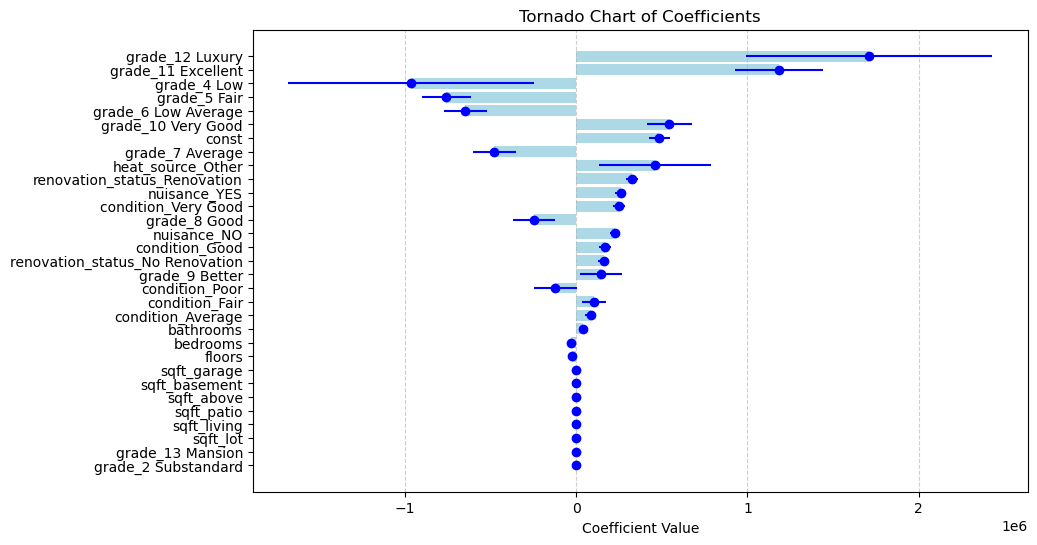

In [54]:
# Extract the coefficients and their standard errors from the regression summary
coefficients = model_significant.params
standard_errors = model_significant.bse

# Calculate the lower and upper bounds for each coefficient
lower_bound = coefficients - 1.96 * standard_errors
upper_bound = coefficients + 1.96 * standard_errors

# Sort the coefficients based on their impact on the dependent variable
sorted_indices = np.argsort(np.abs(coefficients))

# Create a tornado chart
plt.figure(figsize=(10, 6))
plt.barh(range(len(coefficients)), coefficients[sorted_indices], color='lightblue')
plt.errorbar(coefficients[sorted_indices], range(len(coefficients)),
             xerr=1.96 * standard_errors[sorted_indices], fmt='o', color='blue', label='95% CI')

plt.yticks(range(len(coefficients)), coefficients.index[sorted_indices])
plt.xlabel('Coefficient Value')
plt.title('Tornado Chart of Coefficients')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

plt.show()


In [55]:
# return the standard error for 
# all coefficients in the equation
model_significant.bse

const                              3.099989e+04
bedrooms                           4.602048e+03
bathrooms                          6.675734e+03
sqft_living                        1.549326e+01
sqft_lot                           9.373435e-01
floors                             1.028086e+04
sqft_above                         1.642534e+01
sqft_basement                      1.053402e+01
sqft_garage                        1.592243e+01
sqft_patio                         1.978059e+01
condition_Average                  1.757619e+04
condition_Fair                     3.510275e+04
condition_Good                     1.775980e+04
condition_Poor                     6.487869e+04
condition_Very Good                1.859033e+04
heat_source_Other                  1.665204e+05
renovation_status_No Renovation    1.651365e+04
renovation_status_Renovation       1.795632e+04
grade_10 Very Good                 6.713677e+04
grade_11 Excellent                 1.305179e+05
grade_12 Luxury                    3.669

## Mean Absolute Error (MAE)
This metric tests the accuracy of a regression model. 
It measures the absolute difference between the predicted and actual values. 

In [56]:
predicted_price = model_significant.predict(significant_vars_data)
mae = mean_absolute_error(df_cleaned['price'], predicted_price)

print(f'Mean Absolute Error (MAE): {mae}')



Mean Absolute Error (MAE): 282363.324617406


## Root Mean Squared Error for Residual (RMSE)
This metric asses the goodness of fit of a regression model by examining the errors of residuals. 
Residuals are the diffrences between observed values and predicted values of the model.

In [57]:
rmse_residuals = np.sqrt(model_significant.mse_resid)

# View Root Mean Squared Error for residuals
print(f'Root Mean Squared Error for Residuals: {rmse_residuals}')


Root Mean Squared Error for Residuals: 406960.4719130245


## Model 1 vs Model 2
Comparing the MAE and RMSE values between Model 1 and Model 2, we see that both models have similar error metrics. Model 2 has slightly higher MAE and RMSE values compared to Model 1, indicating that Model 1 may have slightly better predictive performance. However, the differences in error metrics between the two models are relatively small, suggesting that both models perform similarly in predicting house prices.

## Homoscedasticity
To evaluate the second model's performance, a homoscedasticity test was conducted using the Seaborn and Matplotlib libraries. Homoscedasticity refers to the assumption that the variance of the residuals is constant across all levels of the independent variable.

The plot below illustrates that the majority of the scatter plot is centered around the constant (0). This observation indicates that the assumption of homoscedasticity is met. Viewing the chart provides a clear visualization demonstrating that the variance of the residuals is consistent across all levels of the independent variable.

Assessing whether the assumption of homoscedasticity is met is essential because if a model violates this assumption, it may indicate biased parameter estimates.

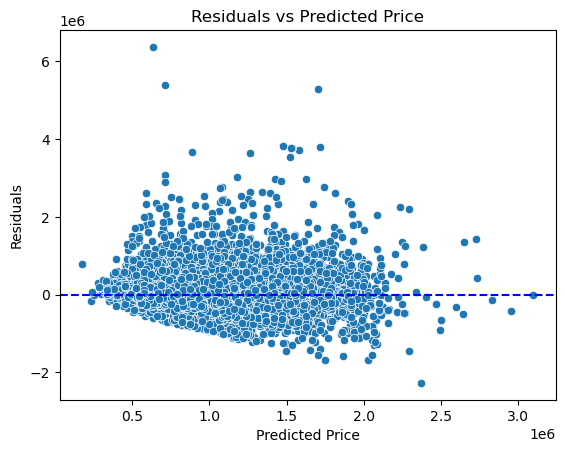

In [58]:
#Checking for Homoscedasticity

y_pred = model_significant.predict(significant_vars_data)  
residuals = df_cleaned['price'] - y_pred  # Calculate residuals

# Create a DataFrame with predicted values and residuals
residuals_df = pd.DataFrame({'Predicted Price': y_pred, 'Residuals': residuals})

# Plot residuals against predicted values
p = sns.scatterplot(x='Predicted Price', y='Residuals', data=residuals_df)
plt.axhline(y=0, color='blue', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Price')
plt.show()


#### The chart remains close to constant (0) indicating homoscedasticity

## Goldfield-Quandt test'
To evaluate the second model's performance, a test for heteroscedasticity was performed using the Statsmodels library. This test, known as the Goldfeld-Quandt test, assesses heteroscedasticity in the residuals of the second model. When the variance of the model's residuals is not constant across all different levels of the independent variable, heteroscedasticity is present. The Goldfeld-Quandt test displays two values, the F-statistic and the p-value.

Since this model had a p-value greater than 0.05, we fail to reject the null hypothesis. The F-statistic of 0.99 suggests that there is less evidence against the null hypothesis of homoscedasticity. This indicates that the variance of the errors is relatively consistent across the different coefficients. Therefore, we can assume that this model does not exhibit heteroscedasticity.

In [59]:

# Goldfield-Quandt test'
# Checks for heteroscedasticity in the residuals

test = sms.het_goldfeldquandt(residuals, predictors_int)
name = ['F statistic', 'p-value']

# Display the results
list(zip(name, test))



[('F statistic', 0.9172124640363855), ('p-value', 0.9999803467415885)]

# Visualization of Residuals from Model

Using Scipy.stats, Matplotlib, and Seaborn libraries, a histogram was created to visualize the residuals of the second model. The purpose of this histogram was to assess whether the residuals follow a normal distribution, an important assumption for statistical models. The chart below demonstrates that this model's residuals do indeed follow a normal distribution.

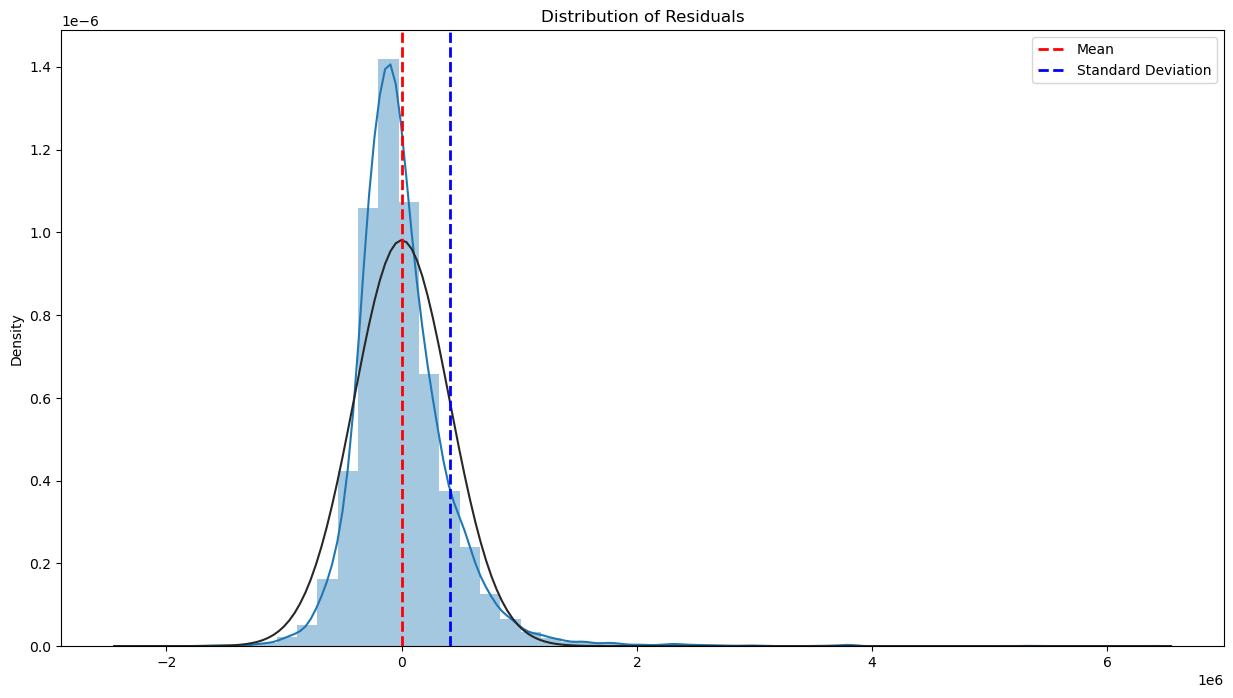

In [60]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

residuals = df_cleaned['price'] - y_pred  

# Set a larger figure size
plt.figure(figsize=(15, 8))

# Plot the distribution of residuals
p = sns.distplot(residuals, fit=norm, kde=True)
p = plt.title('Distribution of Residuals')

#  Add a line to represent a normal distribution
plt.axvline(residuals.mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(residuals.std(), color='blue', linestyle='dashed', linewidth=2, label='Standard Deviation')

# Show legend
plt.legend()

# Show the plot
plt.show()


This histogram displays the distribution of residuals. The Y-axis represents the frequency of residuals, and the X-axis represents the values of the residuals. The tails extend past ±2 standard deviations, but the bulk of the distribution falls within this range. The red line falls on the value 0, representing the mean of the residuals, indicating that, on average, the residuals are centered around 0. The blue line represents the standard deviation of the residuals. While the fitted normal distribution has a lower curve than the model's residual curve, a majority of the data falls within the normal distribution curve. The visualization demonstrates that the residuals are approximately normally distributed.

To further investigate the normality of the residuals of the second model, a Q-Q plot was created using the Spicy.stats library. A Q-Q plot displays the quantities of residuals against the quantities of a normal distribution.

((array([-3.95587021, -3.73852923, -3.61955085, ...,  3.61955085,
          3.73852923,  3.95587021]),
  array([-2272080.91484873, -1683175.05238037, -1671084.5215412 , ...,
          5297675.47206389,  5386305.64889914,  6369082.30993314])),
 (381506.5829696876, 1.0723711557794583e-07, 0.93790352186697))

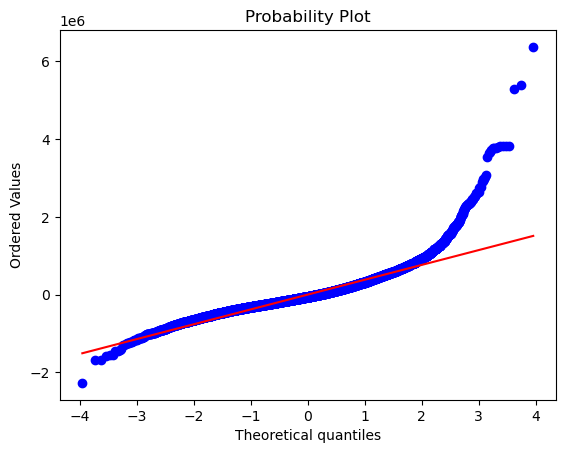

In [61]:
import numpy as np 
import pylab 
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=pylab)

In the plot above, the blue line represents the model's residual line, while the red line indicates the expected normal distribution. The blue and red lines closely align in the central region where the bulk of the data falls. However, towards the tails of the distribution (±2 on the x-axis and ±1 on the y-axis), the blue line deviates slightly from the normal distribution. This deviation suggests a slight departure from normality, potentially caused by outliers in the data, which warrants further investigation. Nevertheless, the Q-Q plot indicates that this model generally exhibits a normal distribution of residuals.

# Creating a third model

In the third model, the exclusion of certain categories mirrored the approach in the first model, where 'address', 'date', 'lat', 'long', 'yr_built', 'yr_renovated', 'greenbelt', 'view', and 'waterfront' were omitted.

The second step was the conversion of categorical variables into dummy variables, employing the same technique as before for 'condition', 'heat_source', 'renovation_status', 'grade', 'nuisance', and 'sewer_system'.

The strategy for numerical variables involved focusing on the 5th and 95th percentiles of 'price', 'bedrooms', 'bathrooms', and 'floors'. This method aimed to minimize the influence of extreme outliers while preserving a significant portion of the dataset.

When handling square footage ('sqft') variables, the approach was to preserve more values to prevent substantial data loss. Instead of removing the 5th and 95th percentiles, the focus was on the 2nd and 98th percentiles to accommodate extreme low and high values, respectively. This approach ensured that the full spectrum of variation in 'sqft' variables was captured while still addressing potential outliers at the distribution's extremes.

The decision to prioritize the removal of extreme values for bedrooms, bathrooms, and floors was driven by their comparatively smaller value ranges, which exerted a more pronounced impact on price data. Similarly, focusing on the 95th percentile for price enabled the filtering out of the most extreme price outliers while retaining a significant portion of the dataset for analysis.

The integration of Matplotlib and Seaborn significantly facilitated the decision-making process. These visualization tools allowed for comprehensive exploration of the data, and swifter outlier removal. Using histograms allowed for insights into the data's patterns and irregularities, guiding the outlier removal strategy effectively. 

In [62]:
import pandas as pd
import numpy as np

# Define the DataFrame df

# List of columns to remove
columns_to_remove = ['address', 'date', 'lat', 'long', 'date', 'yr_built', 'yr_renovated', 'greenbelt', 'view', 'waterfront']

# Convert categorical variables to dummy variables
df_cleaned3 = pd.get_dummies(df, columns=['condition', 'heat_source', 'renovation_status', 'grade', 'nuisance', 'sewer_system'])

# Remove columns specified in columns_to_remove
df_cleaned3.drop(columns=columns_to_remove, inplace=True)

# Display the shape of the filtered DataFrame
print("Shape of filtered DataFrame:", df_cleaned3.shape)

Shape of filtered DataFrame: (30155, 44)


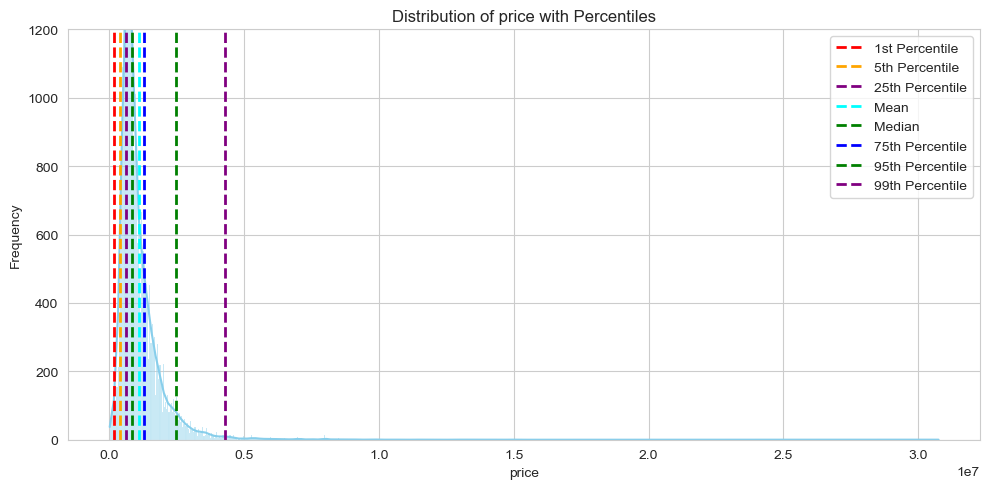

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to plot the distribution with percentiles
def plot_with_percentiles(data, column):
    sns.set_style("whitegrid")  # Set the style to whitegrid for better visibility of percentiles
    plt.figure(figsize=(10, 5))  # Adjust figure size
    sns.histplot(data[column], kde=True, color='skyblue')
    plt.axvline(data[column].quantile(0.01), color='red', linestyle='dashed', linewidth=2, label='1st Percentile')
    plt.axvline(data[column].quantile(0.05), color='orange', linestyle='dashed', linewidth=2, label='5th Percentile')
    plt.axvline(data[column].quantile(0.25), color='purple', linestyle='dashed', linewidth=2, label='25th Percentile')
    plt.axvline(data[column].mean(), color='cyan', linestyle='dashed', linewidth=2, label='Mean')
    plt.axvline(data[column].median(), color='green', linestyle='dashed', linewidth=2, label='Median')
    plt.axvline(data[column].quantile(0.75), color='blue', linestyle='dashed', linewidth=2, label='75th Percentile')
    plt.axvline(data[column].quantile(0.95), color='green', linestyle='dashed', linewidth=2, label='95th Percentile')
    plt.axvline(data[column].quantile(0.99), color='purple', linestyle='dashed', linewidth=2, label='99th Percentile')
    plt.title(f'Distribution of {column} with Percentiles')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.ylim(0, 1200)  # Set the y-axis limit for 'price'
    plt.legend()
    plt.tight_layout()  # Adjust layout to reduce whitespace
    plt.show()

# Plot the distribution of 'price' with percentiles
plot_with_percentiles(df_cleaned3, 'price')


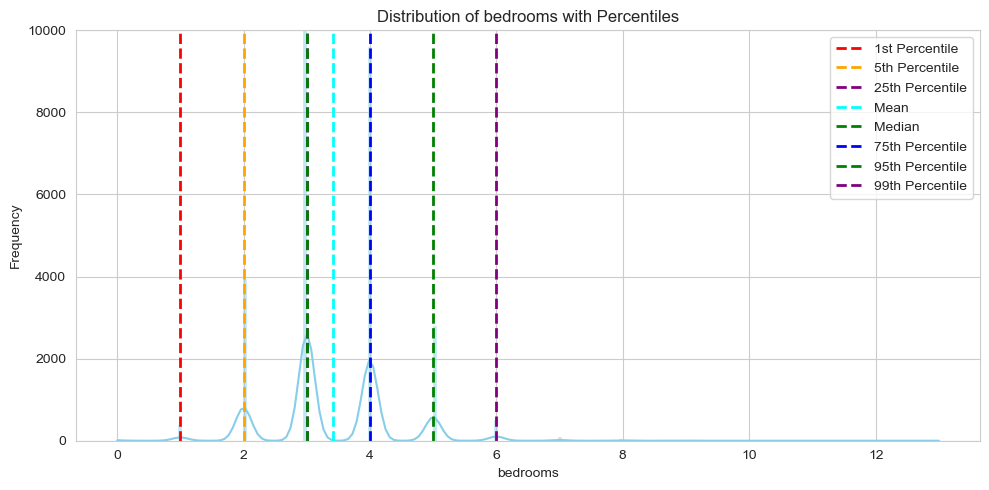

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to plot the distribution with percentiles
def plot_with_percentiles(data, column):
    sns.set_style("whitegrid")  # Set the style to whitegrid for better visibility of percentiles
    plt.figure(figsize=(10, 5))  # Adjust figure size
    sns.histplot(data[column], kde=True, color='skyblue')
    plt.axvline(data[column].quantile(0.01), color='red', linestyle='dashed', linewidth=2, label='1st Percentile')
    plt.axvline(data[column].quantile(0.05), color='orange', linestyle='dashed', linewidth=2, label='5th Percentile')
    plt.axvline(data[column].quantile(0.25), color='purple', linestyle='dashed', linewidth=2, label='25th Percentile')
    plt.axvline(data[column].mean(), color='cyan', linestyle='dashed', linewidth=2, label='Mean')
    plt.axvline(data[column].median(), color='green', linestyle='dashed', linewidth=2, label='Median')
    plt.axvline(data[column].quantile(0.75), color='blue', linestyle='dashed', linewidth=2, label='75th Percentile')
    plt.axvline(data[column].quantile(0.95), color='green', linestyle='dashed', linewidth=2, label='95th Percentile')
    plt.axvline(data[column].quantile(0.99), color='purple', linestyle='dashed', linewidth=2, label='99th Percentile')
    plt.title(f'Distribution of {column} with Percentiles')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.ylim(0, 10000)  # Set the y-axis limit for 'bedrooms'
    plt.legend()
    plt.tight_layout()  # Adjust layout to reduce whitespace
    plt.show()

# Plot the distribution of 'bedrooms' with percentiles
plot_with_percentiles(df_cleaned3, 'bedrooms')


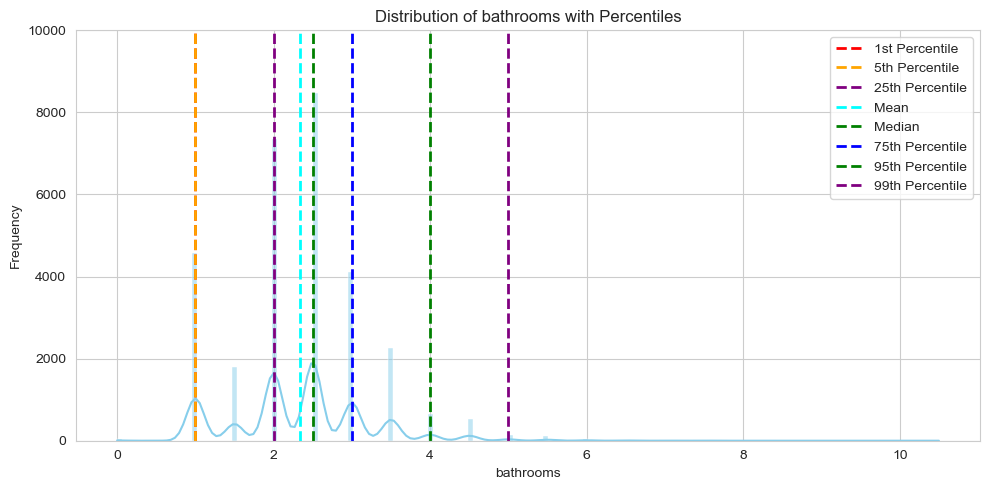

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to plot the distribution with percentiles
def plot_with_percentiles(data, column):
    sns.set_style("whitegrid")  # Set the style to whitegrid for better visibility of percentiles
    plt.figure(figsize=(10, 5))  # Adjust figure size
    sns.histplot(data[column], kde=True, color='skyblue')
    plt.axvline(data[column].quantile(0.01), color='red', linestyle='dashed', linewidth=2, label='1st Percentile')
    plt.axvline(data[column].quantile(0.05), color='orange', linestyle='dashed', linewidth=2, label='5th Percentile')
    plt.axvline(data[column].quantile(0.25), color='purple', linestyle='dashed', linewidth=2, label='25th Percentile')
    plt.axvline(data[column].mean(), color='cyan', linestyle='dashed', linewidth=2, label='Mean')
    plt.axvline(data[column].median(), color='green', linestyle='dashed', linewidth=2, label='Median')
    plt.axvline(data[column].quantile(0.75), color='blue', linestyle='dashed', linewidth=2, label='75th Percentile')
    plt.axvline(data[column].quantile(0.95), color='green', linestyle='dashed', linewidth=2, label='95th Percentile')
    plt.axvline(data[column].quantile(0.99), color='purple', linestyle='dashed', linewidth=2, label='99th Percentile')
    plt.title(f'Distribution of {column} with Percentiles')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.ylim(0, 10000)  # Set the y-axis limit for 'bathrooms'
    plt.legend()
    plt.tight_layout()  # Adjust layout to reduce whitespace
    plt.show()

# Plot the distribution of 'bathrooms' with percentiles
plot_with_percentiles(df_cleaned3, 'bathrooms')


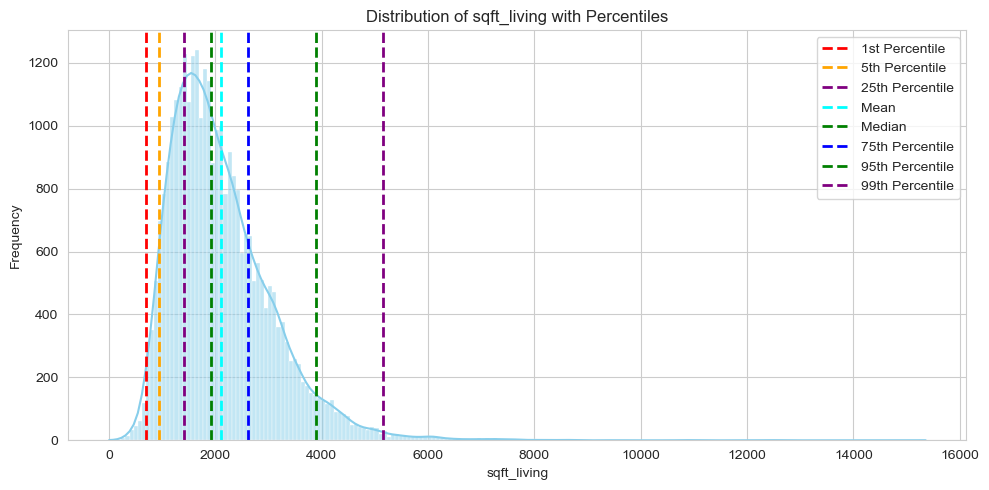

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to plot the distribution with percentiles
def plot_with_percentiles(data, column):
    sns.set_style("whitegrid")  # Set the style to whitegrid for better visibility of percentiles
    plt.figure(figsize=(10, 5))  # Adjust figure size
    sns.histplot(data[column], kde=True, color='skyblue')
    plt.axvline(data[column].quantile(0.01), color='red', linestyle='dashed', linewidth=2, label='1st Percentile')
    plt.axvline(data[column].quantile(0.05), color='orange', linestyle='dashed', linewidth=2, label='5th Percentile')
    plt.axvline(data[column].quantile(0.25), color='purple', linestyle='dashed', linewidth=2, label='25th Percentile')
    plt.axvline(data[column].mean(), color='cyan', linestyle='dashed', linewidth=2, label='Mean')
    plt.axvline(data[column].median(), color='green', linestyle='dashed', linewidth=2, label='Median')
    plt.axvline(data[column].quantile(0.75), color='blue', linestyle='dashed', linewidth=2, label='75th Percentile')
    plt.axvline(data[column].quantile(0.95), color='green', linestyle='dashed', linewidth=2, label='95th Percentile')
    plt.axvline(data[column].quantile(0.99), color='purple', linestyle='dashed', linewidth=2, label='99th Percentile')
    plt.title(f'Distribution of {column} with Percentiles')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    plt.legend()
    plt.tight_layout()  # Adjust layout to reduce whitespace
    plt.show()

# Plot the distribution of 'sqft_living' with percentiles
plot_with_percentiles(df_cleaned3, 'sqft_living')


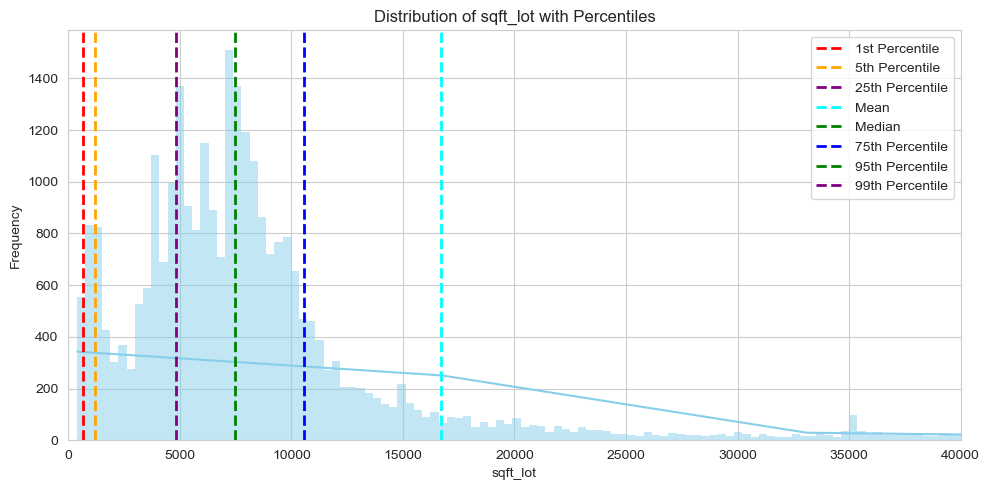

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to plot the distribution with percentiles
def plot_with_percentiles(data, column):
    sns.set_style("whitegrid")  # Set the style to whitegrid for better visibility of percentiles
    plt.figure(figsize=(10, 5))  # Adjust figure size
    sns.histplot(data[column], kde=True, color='skyblue')
    plt.axvline(data[column].quantile(0.01), color='red', linestyle='dashed', linewidth=2, label='1st Percentile')
    plt.axvline(data[column].quantile(0.05), color='orange', linestyle='dashed', linewidth=2, label='5th Percentile')
    plt.axvline(data[column].quantile(0.25), color='purple', linestyle='dashed', linewidth=2, label='25th Percentile')
    plt.axvline(data[column].mean(), color='cyan', linestyle='dashed', linewidth=2, label='Mean')
    plt.axvline(data[column].median(), color='green', linestyle='dashed', linewidth=2, label='Median')
    plt.axvline(data[column].quantile(0.75), color='blue', linestyle='dashed', linewidth=2, label='75th Percentile')
    plt.axvline(data[column].quantile(0.95), color='green', linestyle='dashed', linewidth=2, label='95th Percentile')
    plt.axvline(data[column].quantile(0.99), color='purple', linestyle='dashed', linewidth=2, label='99th Percentile')
    plt.title(f'Distribution of {column} with Percentiles')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xlim(0, 40000)  # Set the x-axis limit for 'sqft_lot'
    plt.legend()
    plt.tight_layout()  # Adjust layout to reduce whitespace
    plt.show()

# Plot the distribution of 'sqft_lot' with percentiles
plot_with_percentiles(df_cleaned3, 'sqft_lot')


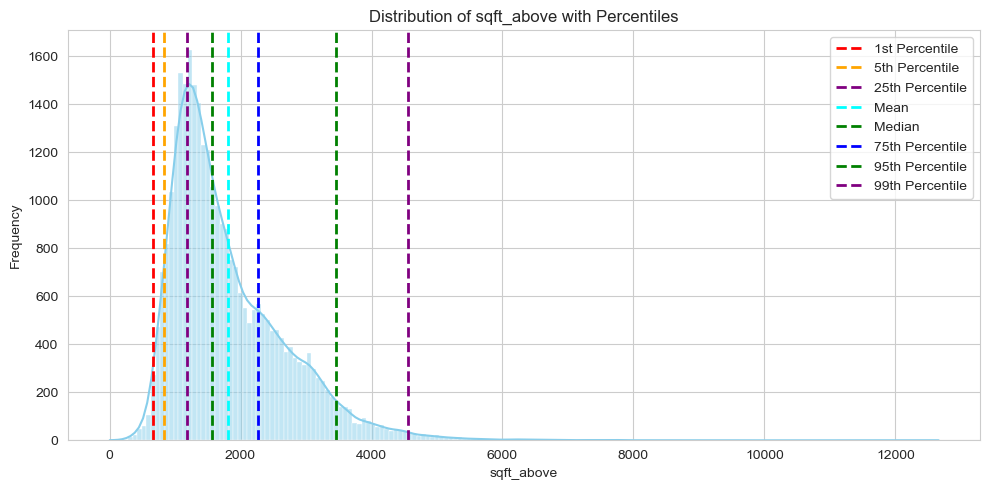

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to plot the distribution with percentiles
def plot_with_percentiles(data, column):
    sns.set_style("whitegrid")  # Set the style to whitegrid for better visibility of percentiles
    plt.figure(figsize=(10, 5))  # Adjust figure size
    sns.histplot(data[column], kde=True, color='skyblue')
    plt.axvline(data[column].quantile(0.01), color='red', linestyle='dashed', linewidth=2, label='1st Percentile')
    plt.axvline(data[column].quantile(0.05), color='orange', linestyle='dashed', linewidth=2, label='5th Percentile')
    plt.axvline(data[column].quantile(0.25), color='purple', linestyle='dashed', linewidth=2, label='25th Percentile')
    plt.axvline(data[column].mean(), color='cyan', linestyle='dashed', linewidth=2, label='Mean')
    plt.axvline(data[column].median(), color='green', linestyle='dashed', linewidth=2, label='Median')
    plt.axvline(data[column].quantile(0.75), color='blue', linestyle='dashed', linewidth=2, label='75th Percentile')
    plt.axvline(data[column].quantile(0.95), color='green', linestyle='dashed', linewidth=2, label='95th Percentile')
    plt.axvline(data[column].quantile(0.99), color='purple', linestyle='dashed', linewidth=2, label='99th Percentile')
    plt.title(f'Distribution of {column} with Percentiles')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()
    plt.tight_layout()  # Adjust layout to reduce whitespace
    plt.show()

# Plot the distribution of 'sqft_above' with percentiles
plot_with_percentiles(df_cleaned3, 'sqft_above')


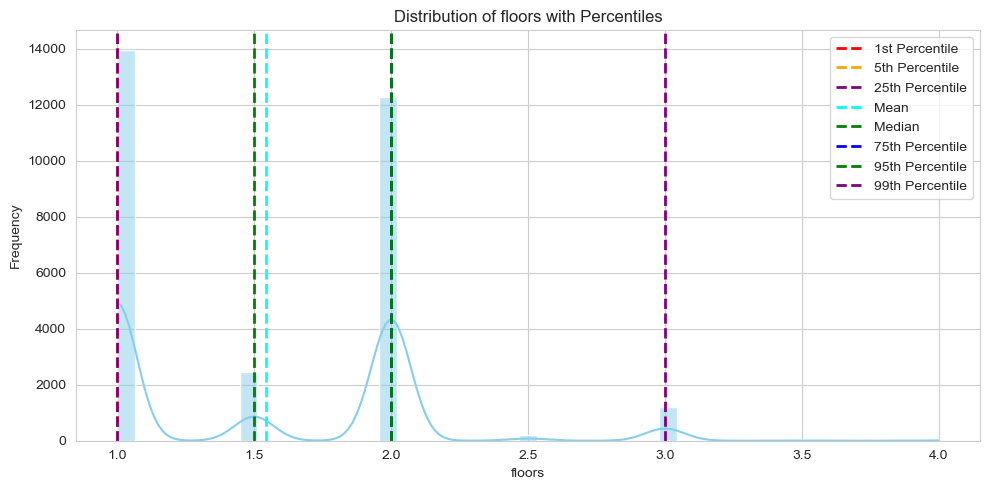

In [69]:
# Plot the distribution of 'floors' with percentiles
plot_with_percentiles(df_cleaned3, 'floors')


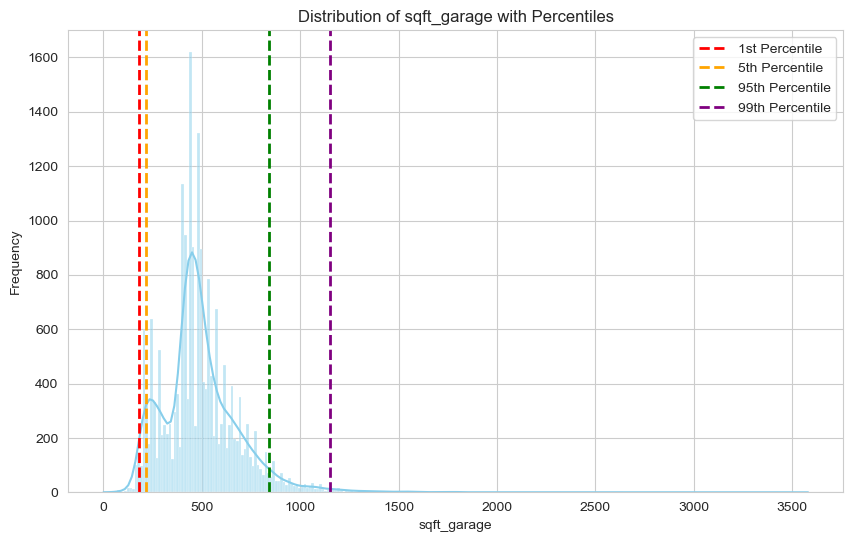

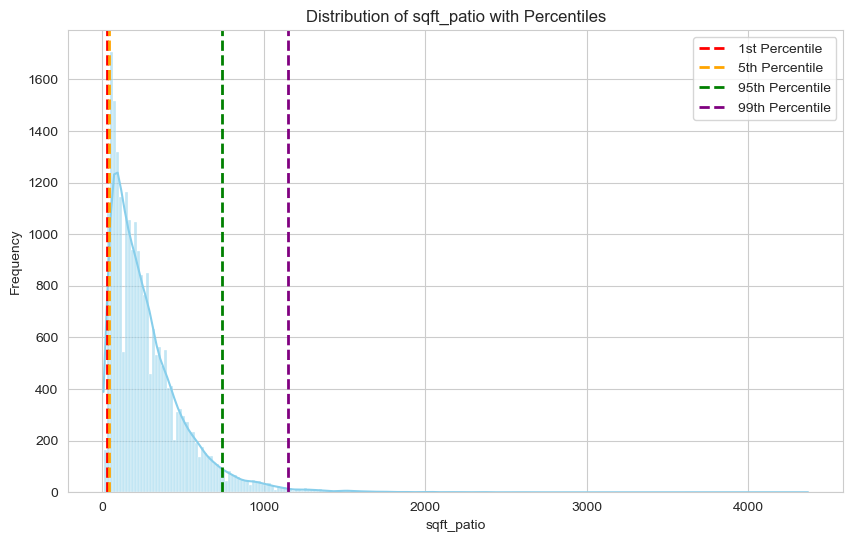

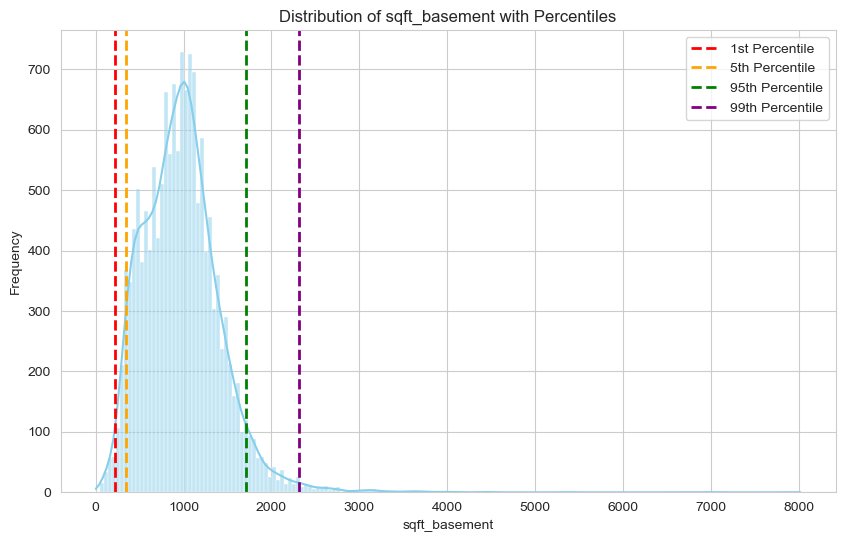

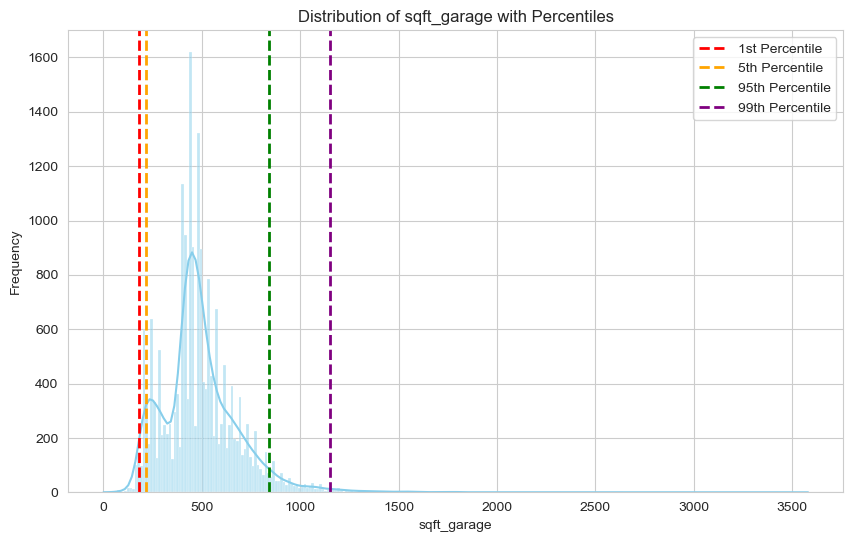

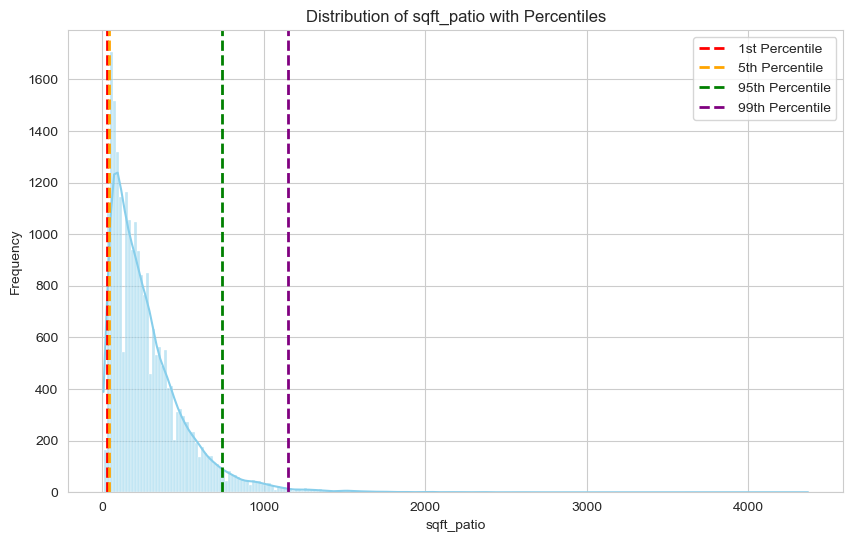

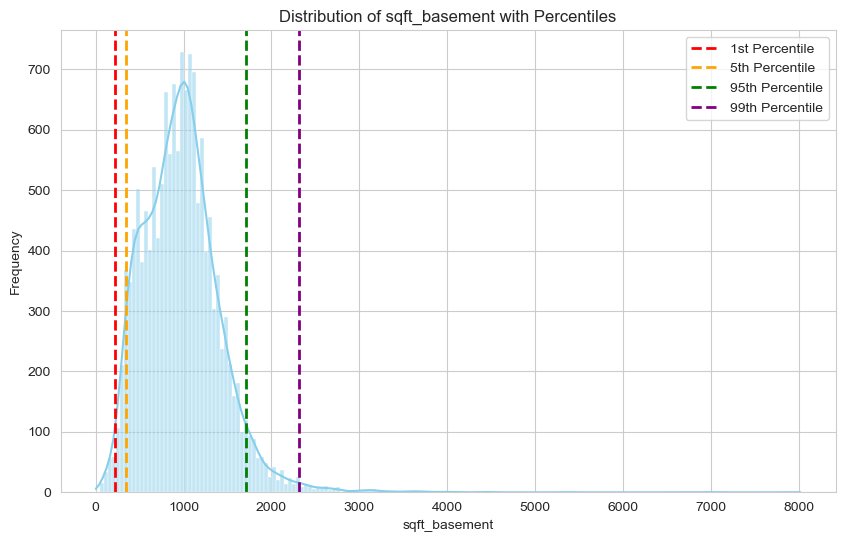

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to plot the distribution with percentiles
def plot_with_percentiles(data, column):
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column], kde=True, color='skyblue')
    plt.axvline(data[column].quantile(0.01), color='red', linestyle='dashed', linewidth=2, label='1st Percentile')
    plt.axvline(data[column].quantile(0.05), color='orange', linestyle='dashed', linewidth=2, label='5th Percentile')
    plt.axvline(data[column].quantile(0.95), color='green', linestyle='dashed', linewidth=2, label='95th Percentile')
    plt.axvline(data[column].quantile(0.99), color='purple', linestyle='dashed', linewidth=2, label='99th Percentile')
    plt.title(f'Distribution of {column} with Percentiles')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

# Plot the distribution of each variable with percentiles
for column in ['sqft_garage', 'sqft_patio', 'sqft_basement']:
    # Filter out the 0 values
    filtered_data = df_cleaned3[df_cleaned3[column] != 0]
    plot_with_percentiles(filtered_data, column)
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to plot the distribution with percentiles
def plot_with_percentiles(data, column):
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column], kde=True, color='skyblue')
    plt.axvline(data[column].quantile(0.01), color='red', linestyle='dashed', linewidth=2, label='1st Percentile')
    plt.axvline(data[column].quantile(0.05), color='orange', linestyle='dashed', linewidth=2, label='5th Percentile')
    plt.axvline(data[column].quantile(0.95), color='green', linestyle='dashed', linewidth=2, label='95th Percentile')
    plt.axvline(data[column].quantile(0.99), color='purple', linestyle='dashed', linewidth=2, label='99th Percentile')
    plt.title(f'Distribution of {column} with Percentiles')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

# Plot the distribution of each variable with percentiles
for column in ['sqft_garage', 'sqft_patio', 'sqft_basement']:
    # Filter out the 0 values
    filtered_data = df_cleaned3[df_cleaned3[column] != 0]
    plot_with_percentiles(filtered_data, column)


In [71]:


# Filter the 'price' column to keep only the values between the 5th and 99th percentiles
price_percentile_05 = df_cleaned3['price'].quantile(0.05)
price_percentile_95 = df_cleaned3['price'].quantile(0.95)
price_mask = (df_cleaned3['price'] >= price_percentile_05) & (df_cleaned3['price'] <= price_percentile_95)
df_cleaned3 = df_cleaned3[price_mask]
print("Unique values of 'price' before filtering:", df_cleaned3['price'].unique())

# Filter the 'bedrooms' column to keep only the values between the 5th and 95th percentiles
bedrooms_percentile_05 = df_cleaned3['bedrooms'].quantile(0.05)
bedrooms_percentile_95 = df_cleaned3['bedrooms'].quantile(0.95)
bedrooms_mask = (df_cleaned3['bedrooms'] >= bedrooms_percentile_05) & (df_cleaned3['bedrooms'] <= bedrooms_percentile_95)
df_cleaned3 = df_cleaned3[bedrooms_mask]
print("Unique values of 'bedrooms' before filtering:", df_cleaned3['bedrooms'].unique())

# Filter the 'bathrooms' column to keep only the values between the 5th and 95th percentiles
bathrooms_percentile_05 = df_cleaned3['bathrooms'].quantile(0.05)
bathrooms_percentile_95 = df_cleaned3['bathrooms'].quantile(0.95)
bathrooms_mask = (df_cleaned3['bathrooms'] >= bedrooms_percentile_05) & (df_cleaned3['bathrooms'] <= bathrooms_percentile_95)
df_cleaned3 = df_cleaned3[bathrooms_mask]
print("Unique values of 'bathrooms' before filtering:", df_cleaned3['bathrooms'].unique())

# Filter the 'floors' column to keep only the values between the 5th and 95th percentiles
floors_percentile_05 = df_cleaned3['floors'].quantile(0.05)
floors_percentile_95 = df_cleaned3['floors'].quantile(0.95)
floors_mask = (df_cleaned3['floors'] >= floors_percentile_05) & (df_cleaned3['floors'] <= floors_percentile_95)
df_cleaned3 = df_cleaned3[floors_mask]
print("Unique values of 'floors' before filtering:", df_cleaned3['floors'].unique())

# Display the shape of the filtered DataFrame
print("Shape of filtered DataFrame after filtering floors:", df_cleaned3.shape)

# Print unique values of the 'sqft_living' column in df_cleaned3 before filtering
print("Unique values of 'sqft_living' before filtering:", df_cleaned3['sqft_living'].unique())

# Find the 2nd and 98th percentile for the 'sqft_living' column
percentile_02_sqft_living = df_cleaned3['sqft_living'].quantile(0.02)
percentile_98_sqft_living = df_cleaned3['sqft_living'].quantile(0.98)

# Update the mask to exclude values outside the 3rd and 97th percentiles for 'sqft_living'
mask_sqft_living = (df_cleaned3['sqft_living'] >= percentile_02_sqft_living) & (df_cleaned3['sqft_living'] <= percentile_98_sqft_living)

# Filter the DataFrame based on the mask for 'sqft_living'
df_cleaned3 = df_cleaned3[mask_sqft_living]

# Print the shape of the DataFrame after filtering the 'sqft_living' column
print("Shape of DataFrame after filtering 'sqft_living':", df_cleaned3.shape)

# Find the 2nd and 98th percentile for the 'sqft_lot' column
percentile_02_sqft_lot = df_cleaned3['sqft_lot'].quantile(0.02)
percentile_98_sqft_lot = df_cleaned3['sqft_lot'].quantile(0.98)

# Filter the DataFrame to keep only the values between the 2nd and 98th percentiles for 'sqft_lot'
df_cleaned3 = df_cleaned3[(df_cleaned3['sqft_lot'] >= percentile_02_sqft_lot) & (df_cleaned3['sqft_lot'] <= percentile_98_sqft_lot)]

# Find the 2nd and 98th percentile for the 'sqft_garage' column
percentile_02_sqft_garage = df_cleaned3['sqft_garage'].quantile(0.02)
percentile_98_sqft_garage = df_cleaned3['sqft_garage'].quantile(0.98)

# Filter the DataFrame to keep only the values between the 2nd and 98th percentiles for 'sqft_garage'
df_cleaned3['sqft_garage'] = np.where((df_cleaned3['sqft_garage'] >= percentile_02_sqft_garage) & (df_cleaned3['sqft_garage'] <= percentile_98_sqft_garage),
                                       df_cleaned3['sqft_garage'],  # Keep original values
                                       0)  # Replace values outside percentile range with 0

# Find the 2nd and 98th percentile for the 'sqft_patio' column
percentile_02_sqft_patio = df_cleaned3['sqft_patio'].quantile(0.02)
percentile_98_sqft_patio = df_cleaned3['sqft_patio'].quantile(0.98)

# Filter the DataFrame to keep only the values between the 3rd and 97th percentiles for 'sqft_patio'
df_cleaned3['sqft_patio'] = np.where((df_cleaned3['sqft_patio'] >= percentile_02_sqft_patio) & (df_cleaned3['sqft_patio'] <= percentile_98_sqft_patio),
                                     df_cleaned3['sqft_patio'],  # Keep original values
                                     0)  # Replace values outside percentile range with 0

# Find the 2nd and 98th percentile for the 'sqft_basement' column
percentile_02_sqft_basement = df_cleaned3['sqft_basement'].quantile(0.02)
percentile_98_sqft_basement = df_cleaned3['sqft_basement'].quantile(0.98)

# Filter the DataFrame to keep only the values between the 2nd and 98th percentiles for 'sqft_basement'
df_cleaned3['sqft_basement'] = np.where((df_cleaned3['sqft_basement'] >= percentile_02_sqft_basement) & (df_cleaned3['sqft_basement'] <= percentile_98_sqft_basement),
                                         df_cleaned3['sqft_basement'],  # Keep original values
                                         0)  # Replace values outside percentile range with 0

# Print the shape of the DataFrame after removing outliers from the 'sqft_lot' column
print("Shape of DataFrame after removing outliers from 'sqft_lot':", df_cleaned3.shape)

# Find the 2nd and 98th percentile for the 'sqft_above' column

percentile_02_sqft_above = df_cleaned3['sqft_above'].quantile(0.02)
percentile_98_sqft_above = df_cleaned3['sqft_above'].quantile(0.98)

# Filter the DataFrame to keep only the values between the 2nd and 98th percentiles for 'sqft_above'
df_cleaned3 = df_cleaned3[(df_cleaned3['sqft_above'] >= percentile_02_sqft_above) & (df_cleaned3['sqft_above'] <= percentile_98_sqft_above)]

# Print the shape of the DataFrame after removing outliers from the 'sqft_above' column
print("Shape of DataFrame after removing outliers from 'sqft_above':", df_cleaned3.shape)



Unique values of 'price' before filtering: [ 675000.  920000.  775000. ... 1384375. 2435000.  656500.]
Unique values of 'bedrooms' before filtering: [4 5 3 2]
Unique values of 'bathrooms' before filtering: [2.5 3.  2.  3.5]
Unique values of 'floors' before filtering: [1.  2.  3.  1.5 2.5]
Shape of filtered DataFrame after filtering floors: (20418, 44)
Unique values of 'sqft_living' before filtering: [2770 2160 1120 2080 2214 2340 2980 2130 1280 3170 2408 1980 2420 1670
 1000 1640 1590 3400 1820 2020 2700 2390 1570 1530 1350 3640 2300 2640
 5200 1830 1790 2150 1920 3030 3450 1240 2170 1880 1630 1890 1220 1210
 3890 1150 3470 3080 3360 1720 3210 1660 1130 3120 2520 2030 1490 1715
 2190 1650 1510 1740 3220 3040 2070 1260 3171 2110 1960 2470 1360 3340
 1400 1560 1330 2430 2290 1850 2350 1290 3320 2570 2760 3250 1940 3090
 1730 2910  960 2060 2370 1680 2990 2180 1500 1700 1860 2530 3150 1910
 3420 1440 1470 2220 2500 1480 1310 1600 2200 1160 2230 1380 2000 2120
 2410 2050 1180 1840 1320 154

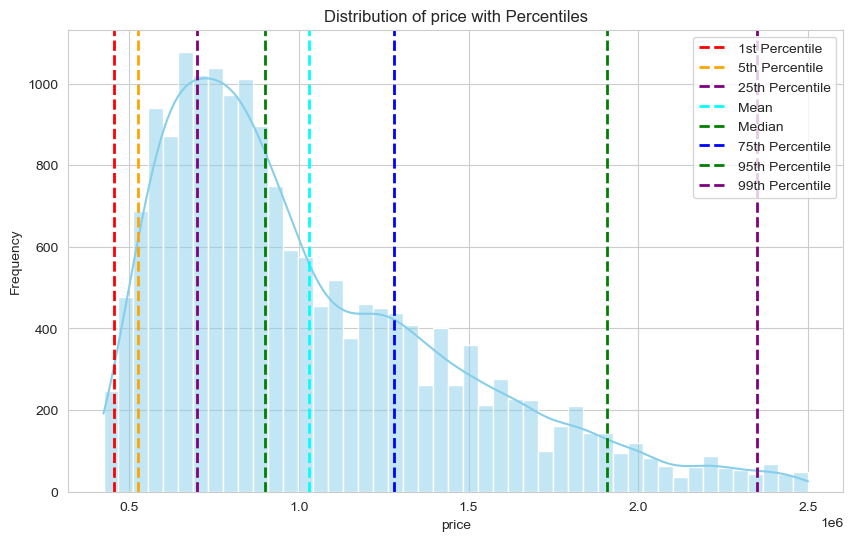

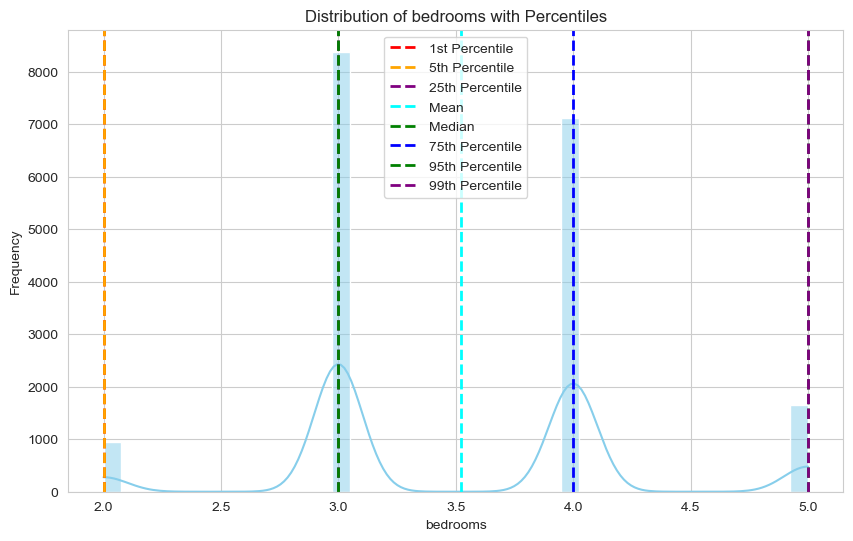

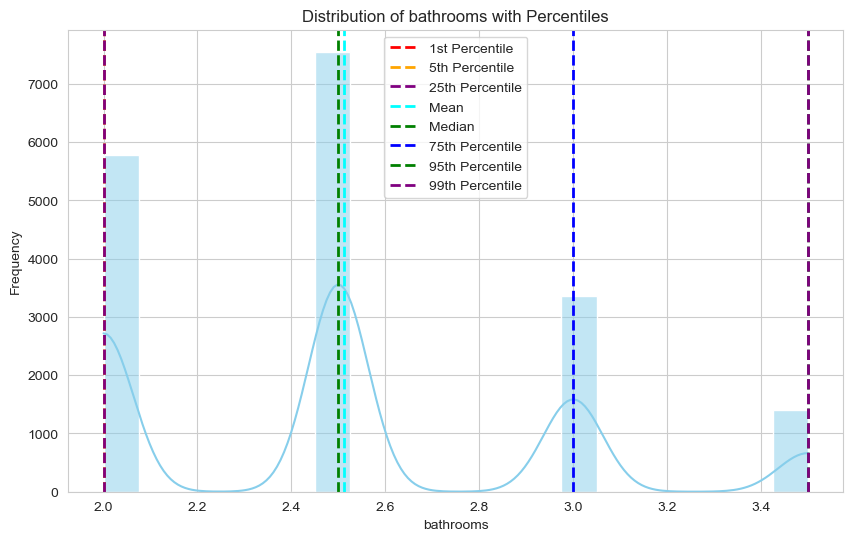

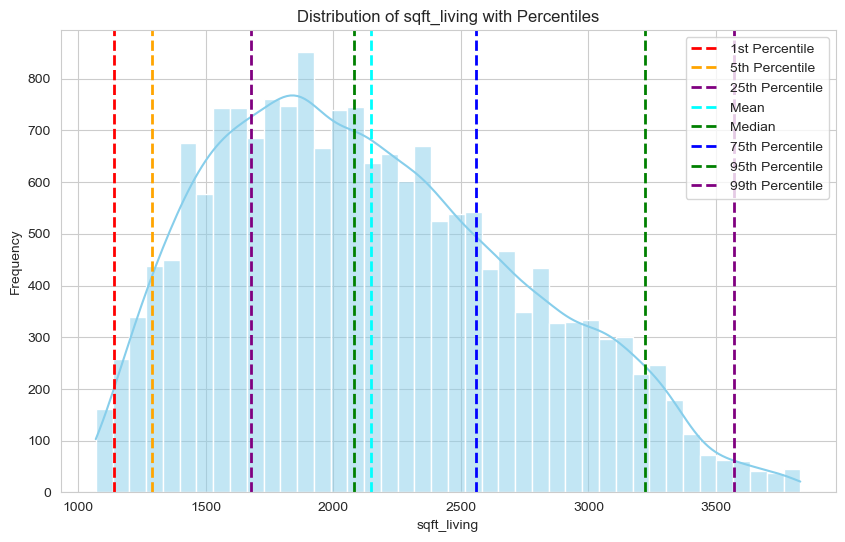

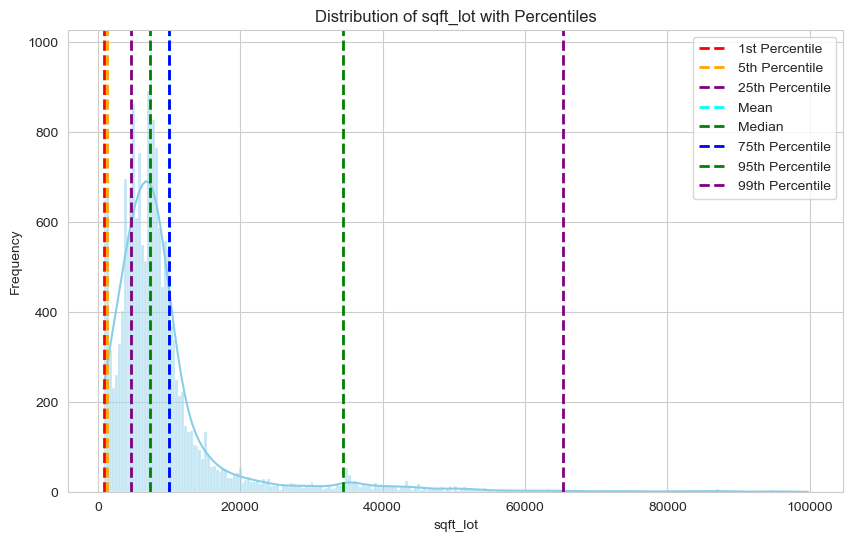

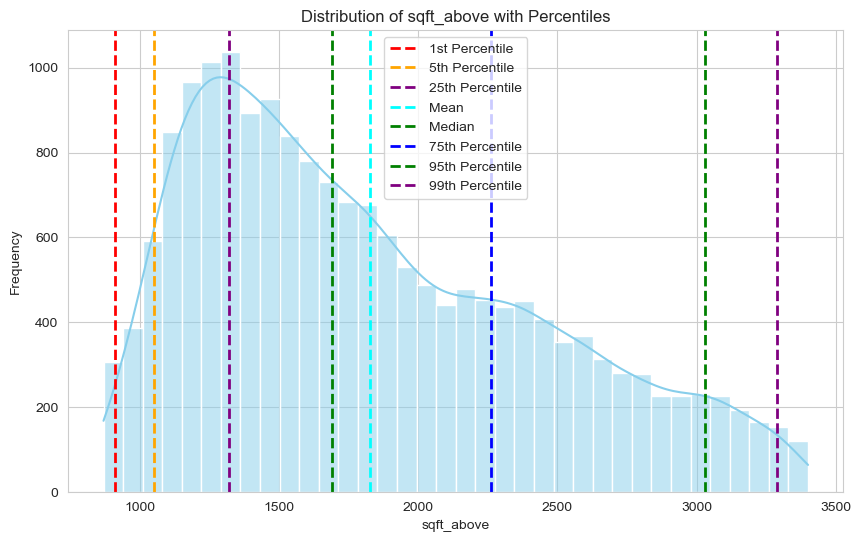

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to plot the distribution with percentiles
def plot_with_percentiles(data, column):
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column], kde=True, color='skyblue')
    plt.axvline(data[column].quantile(0.01), color='red', linestyle='dashed', linewidth=2, label='1st Percentile')
    plt.axvline(data[column].quantile(0.05), color='orange', linestyle='dashed', linewidth=2, label='5th Percentile')
    plt.axvline(data[column].quantile(0.25), color='purple', linestyle='dashed', linewidth=2, label='25th Percentile')
    plt.axvline(data[column].mean(), color='cyan', linestyle='dashed', linewidth=2, label='Mean')
    plt.axvline(data[column].median(), color='green', linestyle='dashed', linewidth=2, label='Median')
    plt.axvline(data[column].quantile(0.75), color='blue', linestyle='dashed', linewidth=2, label='75th Percentile')
    plt.axvline(data[column].quantile(0.95), color='green', linestyle='dashed', linewidth=2, label='95th Percentile')
    plt.axvline(data[column].quantile(0.99), color='purple', linestyle='dashed', linewidth=2, label='99th Percentile')
    plt.title(f'Distribution of {column} with Percentiles')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

# List of columns to visualize
columns_to_visualize = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above']

# Plot the distribution of each variable with percentiles
for column in columns_to_visualize:
    plot_with_percentiles(df_cleaned3, column)


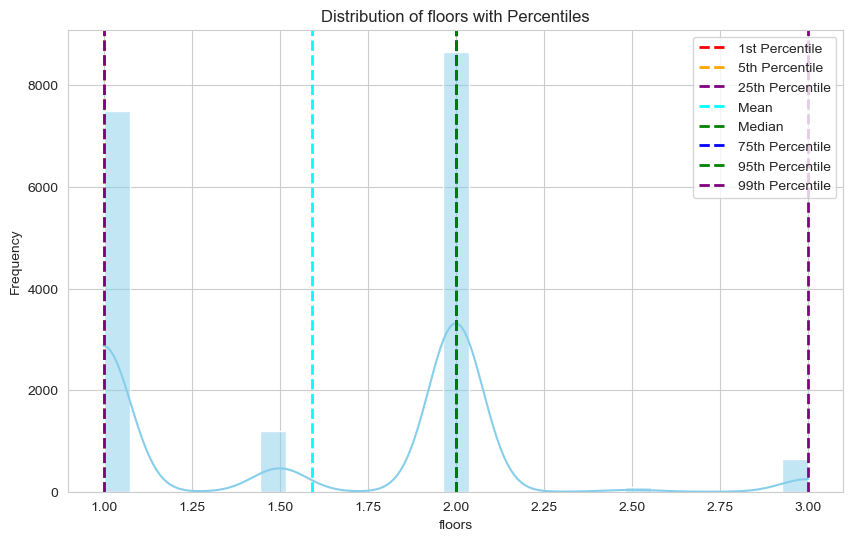

In [73]:
# Plot the distribution of 'floors' with percentiles
plot_with_percentiles(df_cleaned3, 'floors')


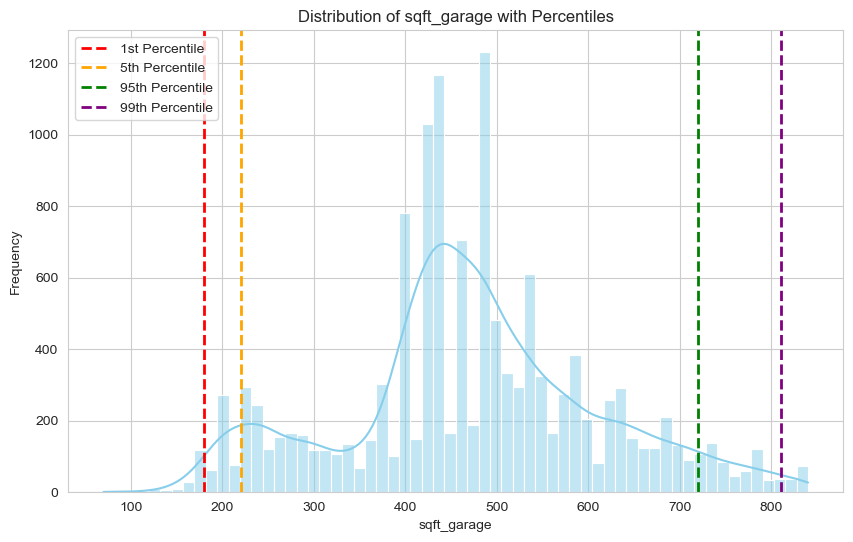

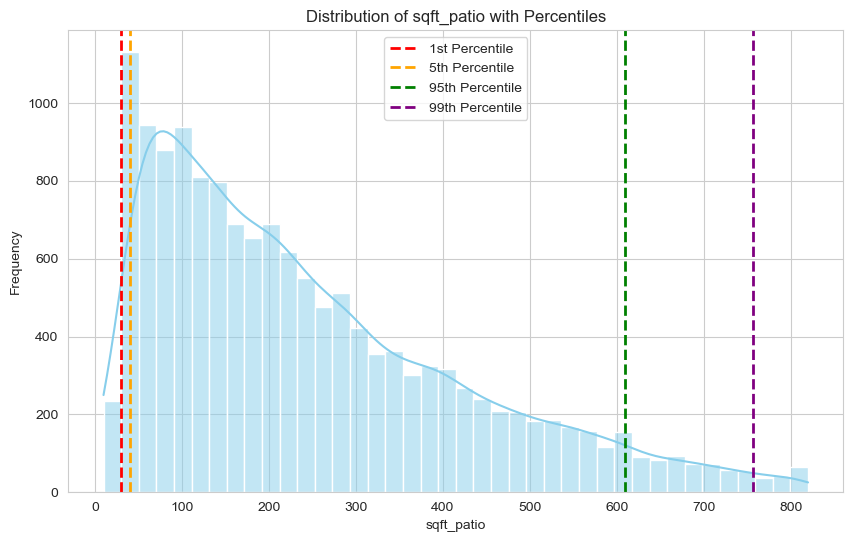

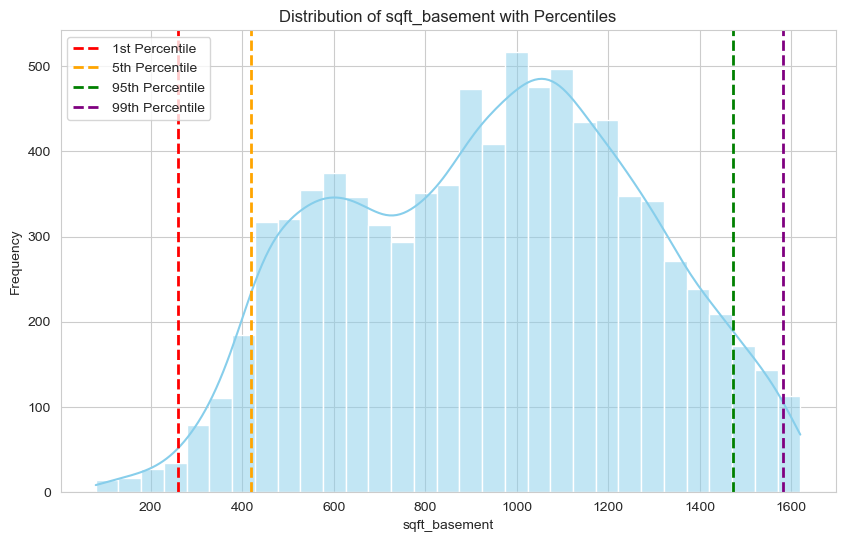

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to plot the distribution with percentiles
def plot_with_percentiles(data, column):
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column], kde=True, color='skyblue')
    plt.axvline(data[column].quantile(0.01), color='red', linestyle='dashed', linewidth=2, label='1st Percentile')
    plt.axvline(data[column].quantile(0.05), color='orange', linestyle='dashed', linewidth=2, label='5th Percentile')
    plt.axvline(data[column].quantile(0.95), color='green', linestyle='dashed', linewidth=2, label='95th Percentile')
    plt.axvline(data[column].quantile(0.99), color='purple', linestyle='dashed', linewidth=2, label='99th Percentile')
    plt.title(f'Distribution of {column} with Percentiles')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

# Plot the distribution of each variable with percentiles
for column in ['sqft_garage', 'sqft_patio', 'sqft_basement']:
    # Filter out the 0 values
    filtered_data = df_cleaned3[df_cleaned3[column] != 0]
    plot_with_percentiles(filtered_data, column)


## Results from the Multiple Linear Regression Model 3
### R-Squared:
The R-Squared for this model is 0.390, indicating that there is a moderate fit for the data. Approximately 39% of the variance in the target variable (price) can be explained by the independent variables included in the model. 

### Adjusted R-Squared:
In this context, an adjusted R-squared value of 0.388 suggests that approximately 39% of the variance in the price of properties can be explained by the independent variables included in the model, while also considering the complexity of the model.

### F-Statistic:
The F-statistic is a measurement of the regression models overall signifincane. The value of 339.1 with a p-value of <.05 indicates that a predictor variable is significantly related to the target variable. 

#### Bedrooms: 
Each additional bedroom is associated with a decrease in price of $19,560. 

#### Bathrooms: 
Each additional bathroom is associated with an increase in price of $22,320.

#### Sqft_living: 
With each additional square foot of living space, the estimated price increases by $156.17.

#### Sqft_lot: 
A one-unit increase in square footage of the lot is associated with a $1.89.

#### Floors: 
Each additional floor is associated with an estimated decrease in price of $42,310.

#### Sqft_above: 
For each additional square foot above ground level, the estimated price increases by $78.09.

#### Sqft_basement: 
With each additional square foot of basement area, the estimated price increases by $102.54.

#### Sqft_garage: 
Each additional square foot of garage space is associated with a decrease in price of $179.14.

#### Sqft_patio: 
Each additional square foot of patio space is associated with an estimated increase in price of $61.35.

#### Grade_11 Excellent and Grade_12 Luxury:

Properties with these grades exhibit significant positive impacts on price, with coefficients indicating price increases of approximately 390,600 and $686,700, respectively.

#### Grade_5 Fair and Grade_6 Low Average: 
Properties with these grades are associated with significant decreases in price, with coefficients indicating price decreases of approximately 564,800 and $476,600, respectively.


#### Significance Tests:
The p-values associated with each coefficient test the null hypothesis that the coefficient is equal to zero. P-values less than 0.05 indicate that the corresponding coefficient is statistically significant at the 95% confidence level. In this model, most of the coefficients have p-values less than 0.05, suggesting that they are statistically significant predictors of price. However, some coefficients, such as 'condition_Average' and 'heat_source_Electricity', have p-values greater than 0.05, indicating that they are not statistically significant predictors in this model.



In [75]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Define the dependent variable y
y = df_cleaned3['price']

# Add a constant term to the independent variables for the intercept
X = sm.add_constant(df_cleaned3.drop(columns=['price']))  # Drop the dependent variable

# Fit the OLS model
model3 = sm.OLS(y, X).fit()

# Print the model summary
print(model3.summary())



                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     339.1
Date:                Wed, 14 Feb 2024   Prob (F-statistic):               0.00
Time:                        21:44:05   Log-Likelihood:            -2.5625e+05
No. Observations:               18101   AIC:                         5.126e+05
Df Residuals:                   18066   BIC:                         5.129e+05
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

# Creation of Tornado Chart for Model 3
#### Visual representation of the impact of each coefficent on the dependt variable (price)

After creating the initial model, a Tornado chart was generated through Matplotlib to illustrate the influence of each coefficient on the house price. The chart reveals that an increase in the value of the variable 'grade_12 Luxury' has the most substantial positive effect on the price, indicating that houses with this grade experience a considerable price increase. Conversely, the presence of 'grade_5 Fair' has the most pronounced negative impact on the price, suggesting that houses with this grade exhibit a substantial decrease in value. This visual representation underscores the importance of certain factors in determining house prices and provides valuable insights for homeowners.

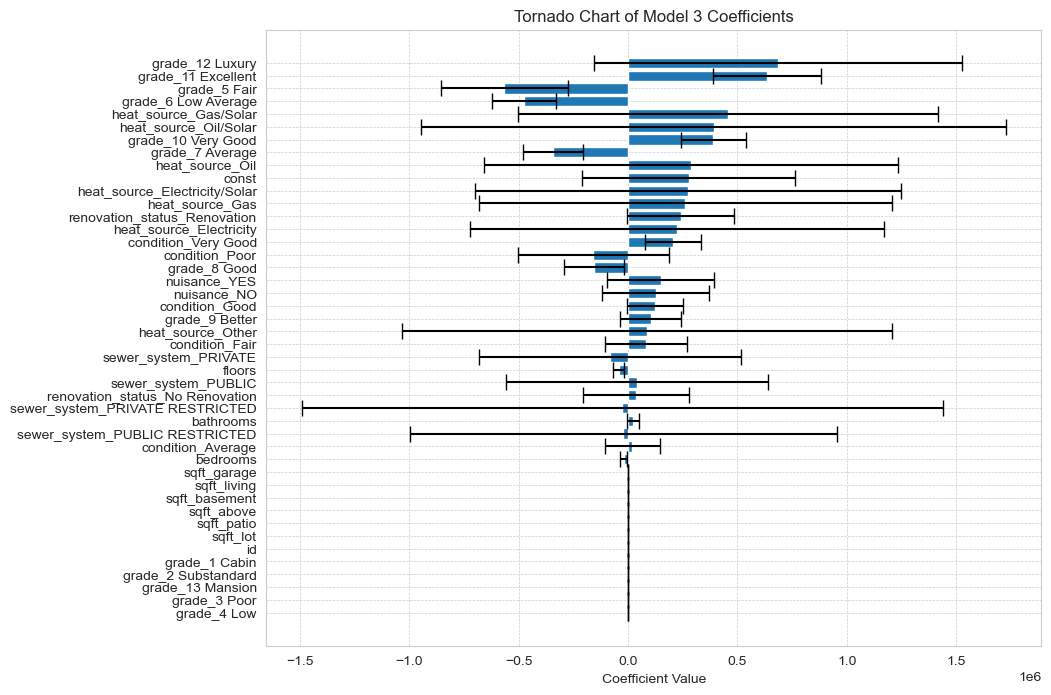

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Extracting coefficients and their standard errors
coefficients = model3.params
standard_errors = model3.bse

# Calculating the range of values for each coefficient
lower_bound = coefficients - 1.96 * standard_errors
upper_bound = coefficients + 1.96 * standard_errors
range_of_values = upper_bound - lower_bound

# Combining coefficients, standard errors, and ranges into a DataFrame
coefficients_df = pd.DataFrame({'Coefficient': coefficients,
                                'Standard Error': standard_errors,
                                'Range': range_of_values})

# Sorting coefficients by their absolute values in descending order
sorted_coefficients_df = coefficients_df.reindex(coefficients_df['Coefficient'].abs().sort_values(ascending=True).index)

# Plotting the tornado chart
plt.figure(figsize=(10, 8))
plt.barh(sorted_coefficients_df.index, sorted_coefficients_df['Coefficient'],
         xerr=sorted_coefficients_df['Range'], capsize=6)
plt.xlabel('Coefficient Value')
plt.title('Tornado Chart of Model 3 Coefficients')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()




Mean Absolute Error (MAE) and Roomt Mean Squared Error (RMSE) for Model 


In [77]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Make predictions using the model
predictions = model3.predict(X)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y, predictions)
print("Mean Absolute Error (MAE):", mae)

# Calculate Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y, predictions, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 265003.31851198315
Root Mean Squared Error (RMSE): 340441.3454459002


# Creating model 4 significant values only p <.05

In [78]:
# Filter coefficients based on p-values
significant_vars3 = model3.params[model3.pvalues < 0.05]

# Display coefficients of significant variables
print(significant_vars3)

const                           277591.360463
bedrooms                        -19556.173339
bathrooms                        22317.839540
sqft_living                        156.170237
sqft_lot                             1.892281
floors                          -42309.404074
sqft_above                          78.089152
sqft_basement                      102.541902
sqft_garage                       -179.143487
sqft_patio                          61.347542
condition_Good                  124185.875769
condition_Very Good             207409.350455
renovation_status_Renovation    240834.810492
grade_10 Very Good              390568.761377
grade_11 Excellent              635271.432317
grade_12 Luxury                 686676.211108
grade_5 Fair                   -564815.027048
grade_6 Low Average            -476637.723617
grade_7 Average                -341451.559239
grade_8 Good                   -155688.416515
grade_9 Better                  103667.630627
nuisance_NO                     12

## Results from the Multiple Linear Regression Model 4
### R-Squared:
The R-Squared for this model is 0.382, indicating that there is a moderate fit for the data. Approximately 38% of the variance in the target variable (price) can be explained by the independent variables included in the model. 

### Adjusted R-Squared:
In this context, an adjusted R-squared value of 0.381 suggests that approximately 38% of the variance in the price of properties can be explained by the independent variables included in the model, while also considering the complexity of the model.

### F-Statistic:
The F-statistic is a measurement of the regression models overall signifincane. The value of 658.80 with a p-value of <.05 indicates that a predictor variable is significantly related to the target variable. 

#### Bedrooms: 
Each additional bedroom is associated with a decrease in price of $15,930. 

#### Bathrooms: 
Each additional bathroom is associated with an increase in price of $19,740.

#### Sqft_living: 
With each additional square foot of living space, the estimated price increases by $158.72.

#### Sqft_lot: 
A one-unit increase in square footage of the lot is associated with a decrease in price of $0.48.

#### Floors: 
Each additional floor is associated with an estimated decrease in price of $46,700.

#### Sqft_above: 
For each additional square foot above ground level, the estimated price increases by $85.76.

#### Sqft_basement: 
With each additional square foot of basement area, the estimated price increases by $108.72.

#### Sqft_garage: 
Each additional square foot of garage space is associated with a decrease in price of $177.77.

#### Sqft_patio: 
Each additional square foot of patio space is associated with an estimated increase in price of $44.32.

#### Grade_11 Excellent and Grade_12 Luxury:

Properties with these grades exhibit significant positive impacts on price, with coefficients indicating price increases of approximately 634,900 and $830,200, respectively.

#### Grade_5 Fair and Grade_6 Low Average: 
Properties with these grades are associated with significant decreases in price, with coefficients indicating price decreases of approximately 556,300 and $472,000, respectively.


#### Significance Tests:
The p-values associated with each coefficient test the null hypothesis that the coefficient is equal to zero. P-values less than 0.05 indicate that the corresponding coefficient is statistically significant at the 95% confidence level. In this model, all of the coefficients have p-values less than 0.05, suggesting that they are statistically significant predictors of price.

In [79]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Define the dependent variable y
y = df_cleaned3['price']

# Add a constant term to the independent variables for the intercept
X = sm.add_constant(df_cleaned3.drop(columns=['price']))  # Drop the dependent variable

# Fit the OLS model
model3 = sm.OLS(y, X).fit()

# Filter coefficients based on p-values
significant_vars3 = model3.pvalues[model3.pvalues < 0.05].index

# Select only significant variables for model4
X_filtered = X[significant_vars3]

# Fit the OLS model with only significant variables
model4 = sm.OLS(y, X_filtered).fit()

# Print the model summary
print(model4.summary())





                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.381
Method:                 Least Squares   F-statistic:                     558.8
Date:                Wed, 14 Feb 2024   Prob (F-statistic):               0.00
Time:                        21:44:06   Log-Likelihood:            -2.5637e+05
No. Observations:               18101   AIC:                         5.128e+05
Df Residuals:                   18080   BIC:                         5.129e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

# Creation of Tornado Chart for Model 4
#### Visual representation of the impact of each coefficent on the dependt variable (price)

After creating the forth model, a Tornado chart was generated through Matplotlib to illustrate the influence of each coefficient on the house price. The chart reveals that an increase in the value of the variable 'grade_12 Luxury' has the most substantial positive effect on the price, indicating that houses with this grade experience a considerable price increase. Conversely, the presence of 'grade_5 Fair' has the most pronounced negative impact on the price, suggesting that houses with this grade exhibit a substantial decrease in value. This tornado chart mirrors Model 3's chart.

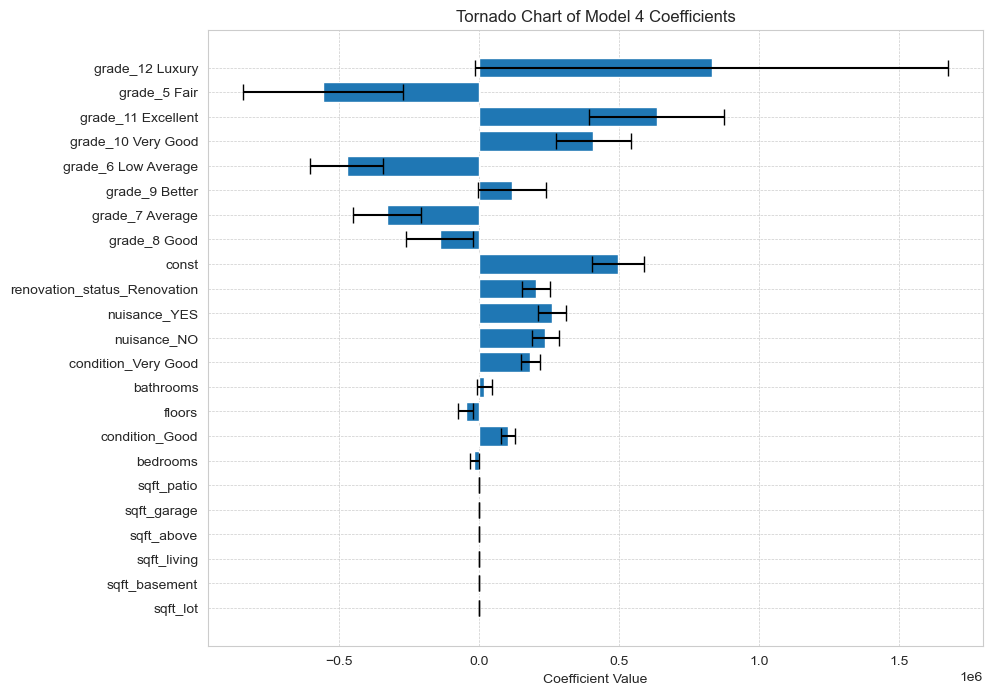

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Extracting coefficients and their standard errors
coefficients = model4.params
standard_errors = model4.bse

# Calculating the range of values for each coefficient
lower_bound = coefficients - 1.96 * standard_errors
upper_bound = coefficients + 1.96 * standard_errors
range_of_values = upper_bound - lower_bound

# Sorting coefficients by their absolute values
sorted_indices = range_of_values.abs().sort_values().index
sorted_coefficients = coefficients[sorted_indices]
sorted_range_of_values = range_of_values[sorted_indices]

# Plotting the tornado chart
plt.figure(figsize=(10, 8))
plt.barh(sorted_coefficients.index, sorted_coefficients, xerr=sorted_range_of_values, capsize=6)
plt.xlabel('Coefficient Value')
plt.title('Tornado Chart of Model 4 Coefficients')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


## Homoscedasticity
To evaluate the forth model's performance, a homoscedasticity test was conducted using the Seaborn and Matplotlib libraries. Homoscedasticity refers to the assumption that the variance of the residuals is constant across all levels of the independent variable.

The plot below illustrates that the majority of the scatter plot is centered around the constant (0). This observation indicates that the assumption of homoscedasticity is met. Viewing the chart provides a clear visualization demonstrating that the variance of the residuals is consistent across all levels of the independent variable.

Assessing whether the assumption of homoscedasticity is met is essential because if a model violates this assumption, it may indicate biased parameter estimates.

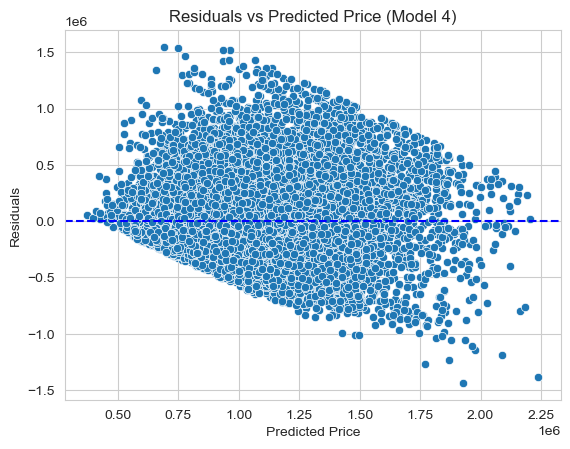

In [81]:
# Predictions using significant variables 
X_filtered_with_const = sm.add_constant(X_filtered)  # Add constant to the filtered X
y_pred_model4 = model4.predict(X_filtered_with_const)

# Residuals calculation for model4
residuals_model4 = df_cleaned3['price'] - y_pred_model4

# Create a DataFrame with predicted values and residuals for model4
residuals_df_model4 = pd.DataFrame({'Predicted Price': y_pred_model4, 'Residuals': residuals_model4})

# Plot residuals against predicted values for model4
p = sns.scatterplot(x='Predicted Price', y='Residuals', data=residuals_df_model4)
plt.axhline(y=0, color='blue', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Price (Model 4)')
plt.show()


## Mean Absolute Error (MAE)
This metric tests the accuracy of a regression model. 
It measures the absolute difference between the predicted and actual values. 

## Root Mean Squared Error for Residual (RMSE)
This metric asses the goodness of fit of a regression model by examining the errors of residuals. 
Residuals are the diffrences between observed values and predicted values of the model.


In [82]:
# Calculate Mean Absolute Error (MAE) for model4
mae_model4 = mean_absolute_error(df_cleaned3['price'], y_pred_model4)
print("Mean Absolute Error (MAE) for Model 4:", mae_model4)

# Calculate Root Mean Squared Error (RMSE) for model4
rmse_model4 = mean_squared_error(df_cleaned3['price'], y_pred_model4, squared=False)
print("Root Mean Squared Error (RMSE) for Model 4:", rmse_model4)


Mean Absolute Error (MAE) for Model 4: 266610.5248997811
Root Mean Squared Error (RMSE) for Model 4: 342533.59256202966


## Goldfield-Quandt test'
To evaluate the forth model's performance, a test for heteroscedasticity was performed using the Statsmodels library. This test, known as the Goldfeld-Quandt test, assesses heteroscedasticity in the residuals of the second model. When the variance of the model's residuals is not constant across all different levels of the independent variable, heteroscedasticity is present. The Goldfeld-Quandt test displays two values, the F-statistic and the p-value.

Since this model had a p-value greater than 0.05, we fail to reject the null hypothesis. The F-statistic of 0.99 suggests that there is less evidence against the null hypothesis of homoscedasticity. This indicates that the variance of the errors is relatively consistent across the different coefficients. Therefore, we can assume that this model does not exhibit heteroscedasticity.

In [83]:

import statsmodels.stats.api as sms

# Extract significant variables for model4
significant_vars4 = model4.params[model4.pvalues < 0.05].index.drop('const')

# Select only significant variables for model4
X_filtered_significant = X[significant_vars4]

# Perform Goldfeld-Quandt test
gq_test_statistic, gq_test_pvalue, gq_test_distribution = sms.het_goldfeldquandt(y=residuals_model4, x=X_filtered_significant)

print("Goldfeld-Quandt test statistic:", gq_test_statistic)
print("Goldfeld-Quandt test p-value:", gq_test_pvalue)
print("Goldfeld-Quandt test distribution:", gq_test_distribution)





Goldfeld-Quandt test statistic: 0.9866680860103909
Goldfeld-Quandt test p-value: 0.7381592322417916
Goldfeld-Quandt test distribution: increasing


This histogram displays the distribution of residuals. The Y-axis represents the frequency of residuals, and the X-axis represents the values of the residuals. The tails extend past ±2 standard deviations, but the bulk of the distribution falls within this range. The red line falls on the value 0, representing the mean of the residuals, indicating that, on average, the residuals are centered around 0. The blue line represents the standard deviation of the residuals. While the fitted normal distribution has a lower curve than the model's residual curve, a majority of the data falls within the normal distribution curve. The visualization demonstrates that the residuals are approximately normally distributed.

To further investigate the normality of the residuals of the second model, a Q-Q plot was created using the Spicy.stats library. A Q-Q plot displays the quantities of residuals against the quantities of a normal distribution.

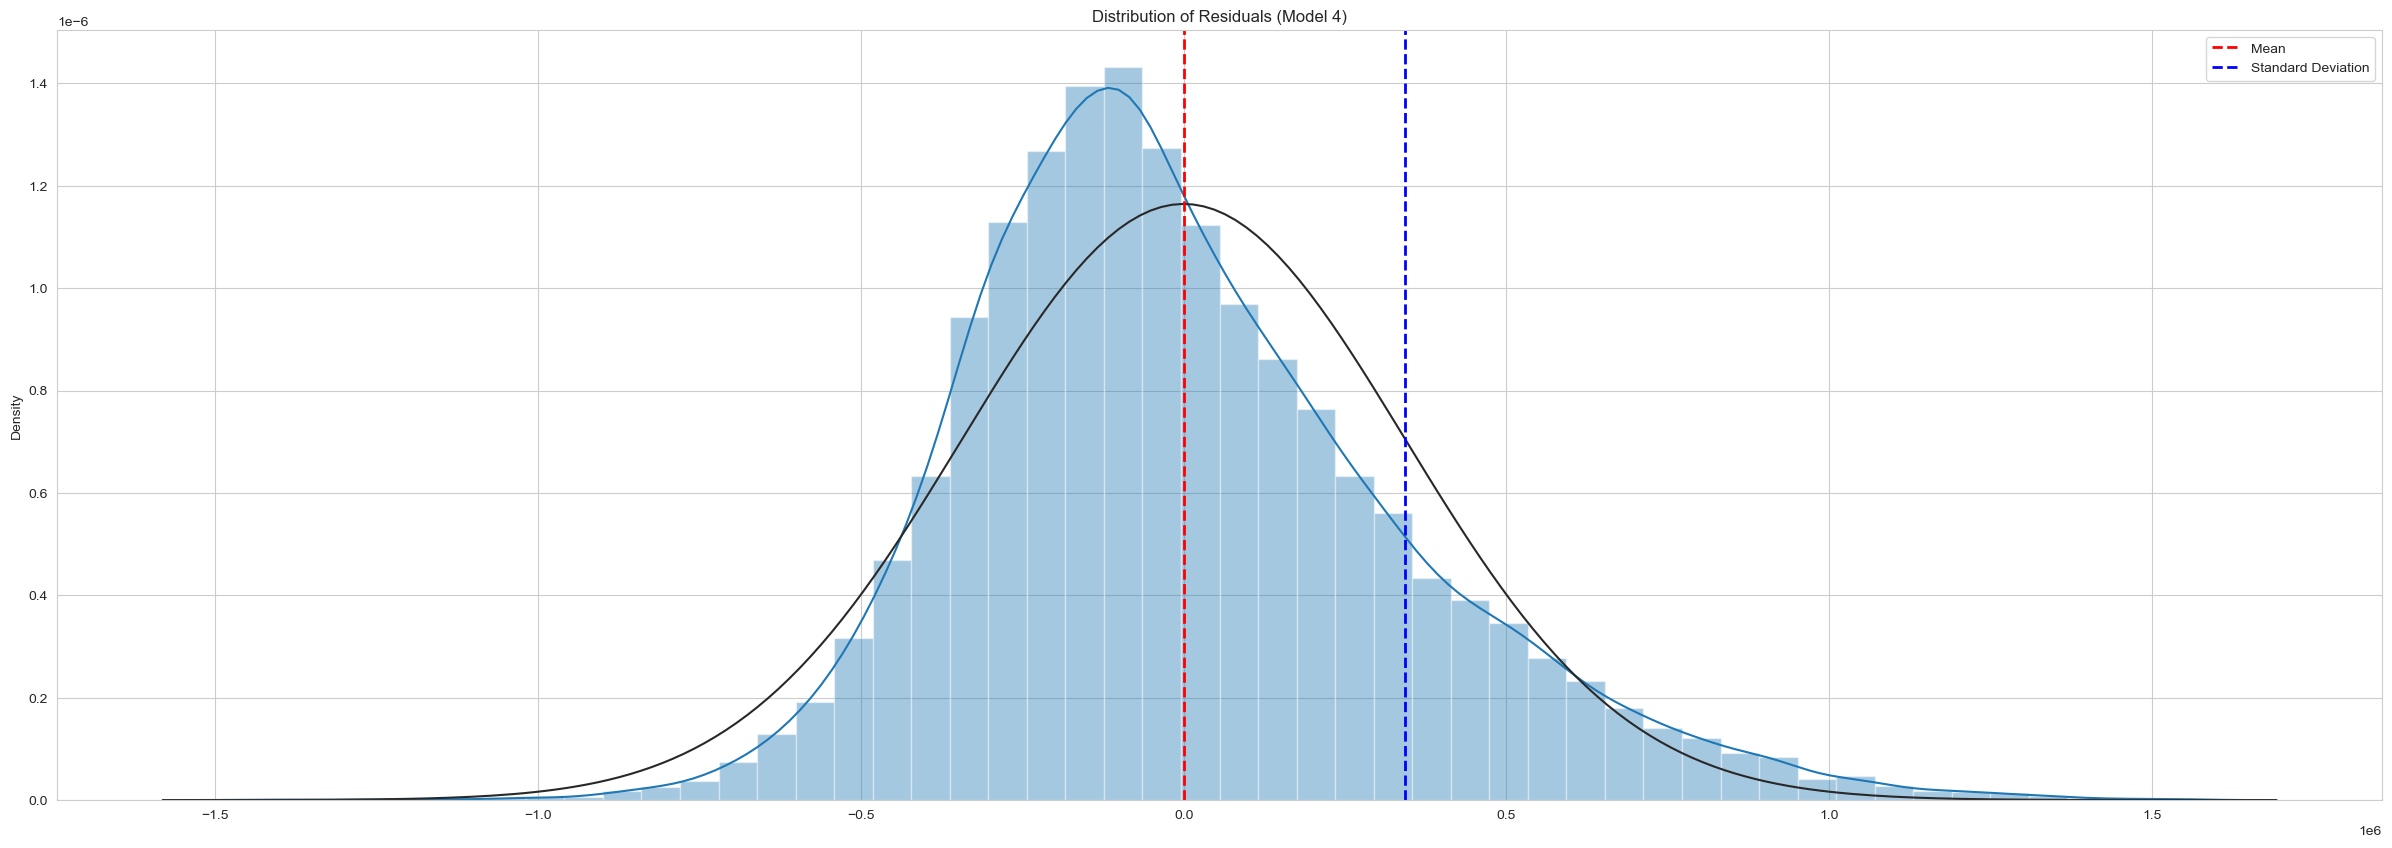

In [84]:
from scipy.stats import norm

# Residuals calculation for model4
residuals_model4 = df_cleaned3['price'] - y_pred_model4

# Set a larger figure size
plt.figure(figsize=(30, 10))

# Plot the distribution of residuals for model4
p = sns.distplot(residuals_model4, fit=norm, kde=True)
p = plt.title('Distribution of Residuals (Model 4)')

# Add a line to represent a normal distribution
plt.axvline(residuals_model4.mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(residuals_model4.std(), color='blue', linestyle='dashed', linewidth=2, label='Standard Deviation')

# Show legend
plt.legend()

# Show the plot
plt.show()


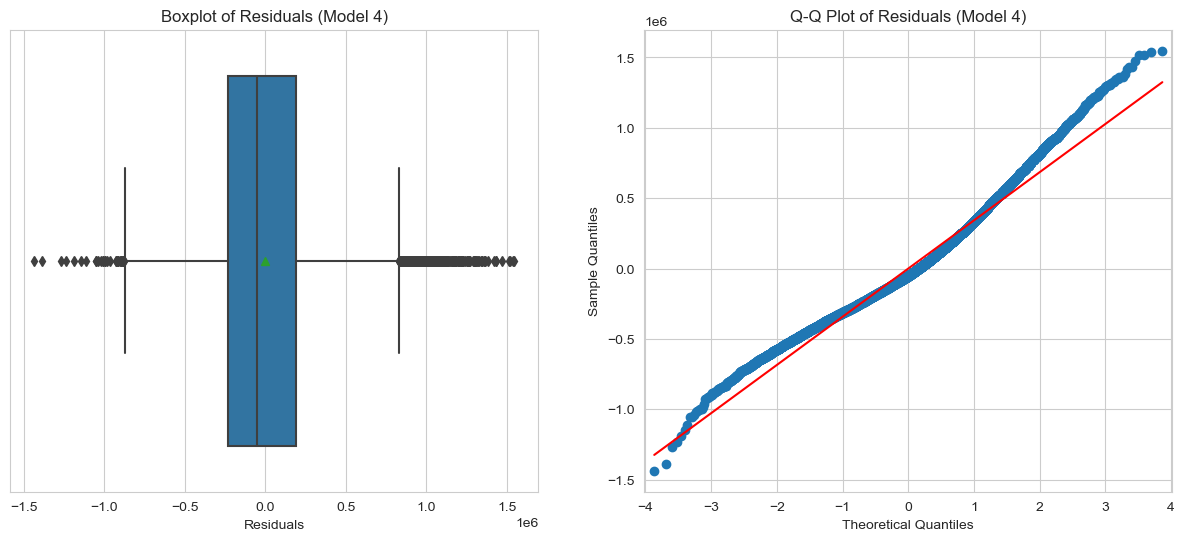

In [85]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Convert residuals_model4 to a DataFrame or a Series
residuals_df = pd.DataFrame(residuals_model4, columns=['Residuals'])

# Set up the subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Boxplot of residuals for model4
sns.boxplot(data=residuals_df, x='Residuals', showmeans=True, ax=axes[0])
axes[0].set_title('Boxplot of Residuals (Model 4)')

# Q-Q plot of residuals for model4
sm.qqplot(residuals_model4, line='s', ax=axes[1])
axes[1].set_title('Q-Q Plot of Residuals (Model 4)')

# Show the plots
plt.show()



In the plot above, the blue line represents the model's residual distribution, while the red line indicates the expected normal distribution. The blue and red lines closely align in the central region where the bulk of the data falls. Unlike the first three models, this Q-Q plot closely follows the red line across the entire range, suggesting that this model is more accurate in predicting quantiles.

## Durbin-Watson Statistic
The Durbin-Watson statistic is a measure of autocorrelation in the residuals of a regression analysis. It ranges from 0 to 4, with a value close to 2 indicating no autocorrelation.

The value of 2.015, suggests there is little autocorrelation present in Model 4's residuals. The residuals are independent of each other, indicating the assumption for the validity of the linear regression is met. 



In [86]:
from statsmodels.stats.stattools import durbin_watson

# Residuals calculation for model4
residuals_model4 = df_cleaned3['price'] - y_pred_model4

# Calculate the Durbin-Watson statistic for model4
dw_statistic_model4 = durbin_watson(residuals_model4)
print("Durbin-Watson Statistic (Model 4):", dw_statistic_model4)


Durbin-Watson Statistic (Model 4): 2.015405450154984


In [87]:
# Get the coefficients for the grade categories from the regression model4
grade_coefficients_model4 = model4.params.filter(like='grade_')

# Calculate the average price for each grade category using the coefficients from model4
avg_price_by_grade_model4 = {}
for grade_category in grade_coefficients_model4.index:
    avg_price_by_grade_model4[grade_category] = df_cleaned3[df_cleaned3[grade_category] == 1]['price'].mean()

# Print the average price for each grade category for model4
print("Average price by grade for Model 4:")
for grade, avg_price in avg_price_by_grade_model4.items():
    print(f"{grade}: {avg_price}")



Average price by grade for Model 4:
grade_10 Very Good: 1740024.1476190477
grade_11 Excellent: 2025246.46875
grade_12 Luxury: 2150000.0
grade_5 Fair: 590333.3333333334
grade_6 Low Average: 710445.6372360844
grade_7 Average: 849078.1392101551
grade_8 Good: 1062523.7460890494
grade_9 Better: 1379698.192823344


## Comparing all Models 

The measurements of all four models were taken and compared to determine which model was best suited for the data and which could best predict price increases. The first model involved a thorough examination of the data, where manual interventions were made to address outliers based on visualizations, statistics, and prior knowledge of variables. The second model utilized the same dataset but included only statistically significant coefficients (p < 0.05). In the third model, a more streamlined approach was taken for outlier detection and removal, with 'Bedrooms', 'Bathrooms', 'Floors', and 'Price' using the 5th and 95th percentiles as outlier ranges, and 2% and 98% for all sqft coefficients. The fourth model retained the same dataset and outlier treatment as the third model but incorporated only statistically significant coefficients (p < 0.05).

## Summary of Model Performance Metrics

Model 2 and Model 1 performed worse than Model 3 and Model 4 across all categories. While Model 4 performed slightly worse than Model 3 in terms of MAE, RMSE, R-Squared, and Adjusted R-Squared, the differences were marginal and they were relatively close in these metrics. However, the significant difference lies in the F Statistic, where Model 4 outperforms all other models. Despite Model 3 showing slightly better performance in some metrics, the superior F Statistic of Model 4 indicates that it provides a better overall fit to the data and is better equipped to explain the variance in the target variable compared to Model 3. Therefore, considering the F Statistic as a crucial measure of overall model performance, Model 4 emerges as the preferred choice among the models considered.

In [88]:

from IPython.display import HTML, display

# Data
models = ['Model 1', 'Model 2', 'Model 3', 'Model 4']
mae_values = [281150.89808470133, 282363.324617406, 265003.32, 266610.52]
rmse_values = [404783.2604119283, 406960.4719130245, 340441.35, 342533.59]
r_squared = [0.364, 0.358, 0.390, 0.382]
adj_r_squared = [0.363, 0.357, 0.388, 0.381]
f_statistic = [324.20, 421.40, 339.10, 558.8]

# Format MAE, RMSE, and F statistic values with commas
mae_values_formatted = [f"{mae:,.2f}" for mae in mae_values]
rmse_values_formatted = [f"{rmse:,.2f}" for rmse in rmse_values]
r_squared_formatted = [f"{r:.3f}" for r in r_squared]
adj_r_squared_formatted = [f"{r:.3f}" for r in adj_r_squared]
f_statistic_formatted = [f"{f:,.2f}" for f in f_statistic]

# Create HTML table
table_html = "<table><tr><th>Model</th><th>Mean Absolute Error (MAE)</th><th>Root Mean Squared Error (RMSE)</th><th>R-Squared</th><th>Adjusted R-Squared</th><th>F Statistic</th></tr>"
for model, mae, rmse, rsquared, adjrsquared, f_stat in zip(models, mae_values_formatted, rmse_values_formatted, r_squared_formatted, adj_r_squared_formatted, f_statistic_formatted):
    table_html += f"<tr><td>{model}</td><td>{mae}</td><td>{rmse}</td><td>{rsquared}</td><td>{adjrsquared}</td><td>{f_stat}</td></tr>"
table_html += "</table>"

# Display HTML table
display(HTML(table_html))



Model,Mean Absolute Error (MAE),Root Mean Squared Error (RMSE),R-Squared,Adjusted R-Squared,F Statistic
Model 1,"281,150.90","404,783.26",0.364,0.363,324.20
Model 2,"282,363.32","406,960.47",0.358,0.357,421.40
Model 3,"265,003.32","340,441.35",0.390,0.388,339.10
Model 4,"266,610.52","342,533.59",0.382,0.381,558.80


All four models exhibit a relatively close alignment of their residuals with the red reference line in the Q-Q plots, indicating a generally good fit to the normal distribution assumption. However, Model 1 and Model 2 show a slight deviation towards larger numbers, suggesting a potential skewness or heavier tails in their residuals compared to Models 3 and 4. 

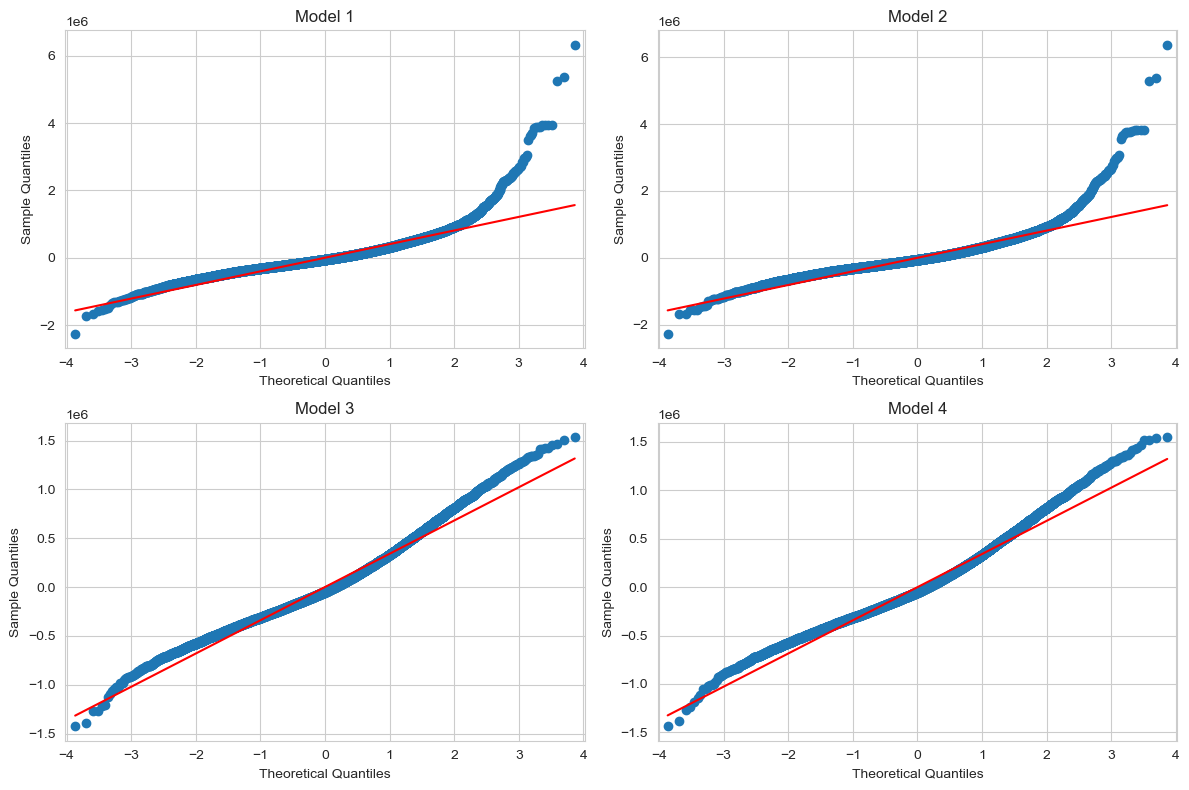

In [93]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# First Model
# Price is the target variable
target_variable = 'price'

# Create predictors
predictors = df_cleaned.drop([target_variable], axis=1)

# Create model intercept
predictors_int = sm.add_constant(predictors)

# Fit multiple linear regression model to data
model1 = sm.OLS(df_cleaned[target_variable], predictors_int).fit()

# Second Model
if 'const' not in significant_vars.index:
    significant_vars.loc['const'] = 0  

# List of significant variable names (including 'const')
significant_vars_names = significant_vars.index.tolist()

# Check if 'const' is in df_cleaned columns
if 'const' not in df_cleaned.columns:
    # If not, add 'const' to the DataFrame
    df_cleaned['const'] = 1

# Create predictors using only statistically significant variables
significant_vars_data = df_cleaned[significant_vars_names]

# Fit multiple linear regression model to data using only significant variables
model2 = sm.OLS(df_cleaned[target_variable], significant_vars_data).fit()

# Third Model
y3 = df_cleaned3['price']
X3 = sm.add_constant(df_cleaned3.drop(columns=['price']))  # Drop the dependent variable
model3 = sm.OLS(y3, X3).fit()

# Fourth Model
y4 = df_cleaned3['price']
X4 = sm.add_constant(df_cleaned3.drop(columns=['price']))  # Drop the dependent variable
model4 = sm.OLS(y4, X4).fit()
significant_vars4 = model4.pvalues[model4.pvalues < 0.05].index
X_filtered4 = X4[significant_vars4]
model4_filtered = sm.OLS(y4, X_filtered4).fit()

# Generate Q-Q plots
models = [model1, model2, model3, model4_filtered]  # Using model4_filtered as it has significant variables
model_names = ['Model 1', 'Model 2', 'Model 3', 'Model 4']

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for i, (model, name) in enumerate(zip(models, model_names)):
    row_index = i // 2
    col_index = i % 2
    
    # Calculate residuals
    residuals = model.resid
    
    # Generate Q-Q plot for the residuals of the current model
    sm.qqplot(residuals, line='s', ax=axs[row_index, col_index])
    axs[row_index, col_index].set_title(name)

plt.tight_layout()
plt.show()


## Grade's Effect on Price
A bar chart was generated to illustrate the impact of 'grade' on 'price'. The x-axis represents different grades, while the y-axis denotes 'price' (USD).

The chart distinctly reveals that only three grades yield a positive return on price ('grade_9 Better', 'grade_10 Very Good', and 'grade_11 Excellent'). This suggests that homeowners should aim to improve their homes to at least grade 9 if they seek an increase in price.

Furthermore, the chart illustrates that 'grade_5 Fair' and 'grade_6 Low Average' have the most significant negative impact on price. This implies that homeowners with grades falling within this range should consider upgrading to increase their overall price.

Overall, the chart provides valuable insights into the relationship between grade and price, highlighting opportunities for homeowners to enhance their property value.

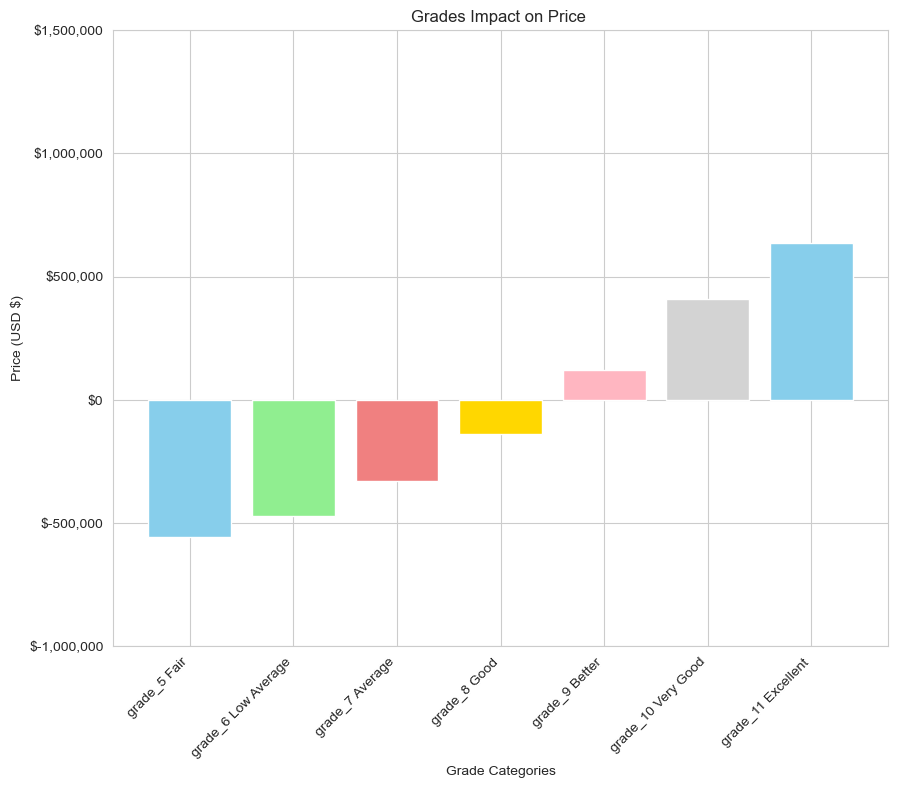

In [90]:

grade_coefficients = model4.params.loc[['grade_10 Very Good', 'grade_11 Excellent', 'grade_5 Fair', 'grade_6 Low Average', 'grade_7 Average', 'grade_8 Good', 'grade_9 Better']]

# Define the desired order of grade categories
desired_order = ['grade_5 Fair', 'grade_6 Low Average', 'grade_7 Average', 'grade_8 Good', 'grade_9 Better', 'grade_10 Very Good', 'grade_11 Excellent']

# Reorder the grade_coefficients Series based on the desired order
grade_coefficients_ordered = grade_coefficients.reindex(desired_order)

# Define the y-axis limits and ticks
y_min = -1e6
y_max = 1.5e6
y_ticks = np.arange(y_min, y_max + 500000, 500000)

# Define colors for each remaining grade category
colors = ['skyblue', 'lightgreen', 'lightcoral', 'gold', 'lightpink', 'lightgrey']

# Create a bar chart for grade coefficients
plt.figure(figsize=(10, 8))
plt.bar(grade_coefficients_ordered.index, grade_coefficients_ordered, color=colors[:len(grade_coefficients_ordered)])
plt.xlabel('Grade Categories')
plt.ylabel('Price (USD $)')
plt.title('Grades Impact on Price ')
plt.yticks(y_ticks, ['${:,.0f}'.format(tick) for tick in y_ticks])  # Format y-tick labels as USD
plt.ylim(y_min, y_max)
plt.xticks(rotation=45, ha='right')
plt.show()



## 'Bathrooms' Effect on Price
A bar chart was generated to illustrate the impact of 'bathroom' on 'price'. The x-axis represents different numbers of bathrooms, while the y-axis denotes 'price' (USD).

The chart distinctly reveals that as the homeowner adds additional 'bathrooms', the 'price' of the house increases. It is important to note that, according to the data from Model 4, the maximum number of bathrooms is 3.5. All homes with 'bathrooms' greater than this were removed as outliers.

According to this chart and the data from Model 4, a homeowner should increase the number of bathrooms in their home if they wish to increase the price of their home. There is a strong correlation between increased 'bathrooms' and increased 'price'.

Overall, the chart provides valuable insights into the relationship between 'bathrooms' and 'price', highlighting opportunities for homeowners to enhance their property value.

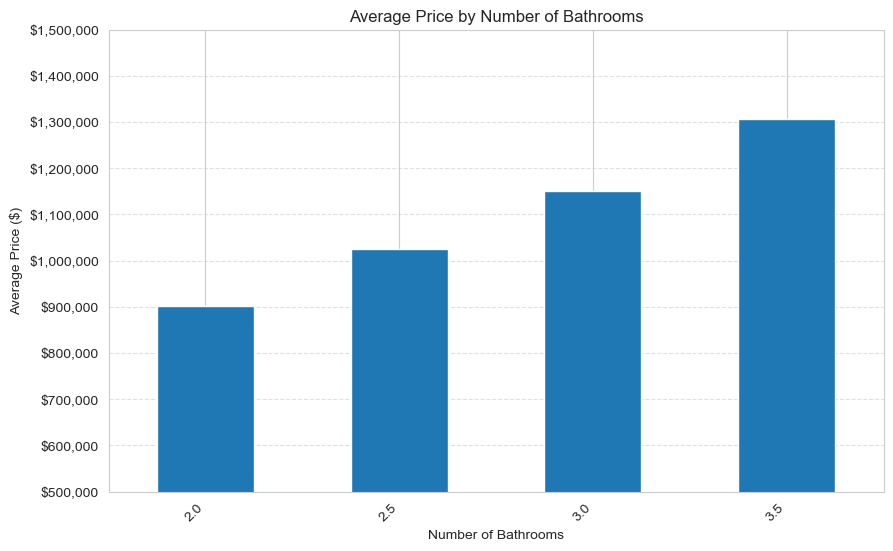

In [94]:
import matplotlib.pyplot as plt

avg_price_by_bathrooms = df_cleaned3.groupby('bathrooms')['price'].mean()

# Plot the average price by number of bathrooms
plt.figure(figsize=(10, 6))
avg_price_by_bathrooms.plot(kind='bar')
plt.title('Average Price by Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Average Price ($)')
plt.ylim(500000, 1500000)  # Set y-axis limits
plt.yticks(range(500000, 1600000, 100000), ['${:,.0f}'.format(i) for i in range(500000, 1600000, 100000)])  # Format y-tick labels as dollars with 100k increments
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)  # Add grid lines for better readability
plt.show()

## Final Recommendations for Homeowners Based on Model 4's Analysis

1. Homeowners should look to increase their house grade to atleast 'grade_9 Better'
2. To optomize increased home 'price' the optimal grade should be 'grade_11 Excellent'
3. Homeowners should increase the number of bathrooms in their home. The optimal number of bathrooms is 3.5

## Contact Info
Jessica Guzzo

Student

JGuzzo522@gmail.com 